1. Rerun the last regression where, only including oecd countries in the subset. A list of OECD countries is provided. You will need to find the 3 letter ISO code associated with each country. (Hint: Reimport the dataframe we saved early in the lesson)


In [34]:
#statsmodelsOLS.py
import pandas as pd
import statsmodels.api as sm
import numpy as np

data = pd.read_csv("fraserDataWithRGDPPC.csv", 
                   index_col = [0,1], 
                   parse_dates = True)
data

EFW  Size of Government  \
ISO_Code Year                                       
ALB      2017-01-01  7.673511            7.528167   
         2016-01-01  7.637742            7.875862   
         2015-01-01  7.639666            7.904257   
         2014-01-01  7.586769            7.882037   
         2013-01-01  7.389525            7.807904   
...                       ...                 ...   
ZWE      2000-01-01  4.299839            5.365058   
         1995-01-01  5.518614            6.418859   
         1990-01-01  4.516140            5.108843   
         1985-01-01  4.226841            5.026250   
         1980-01-01  4.054740            6.322625   

                     Legal System & Property Rights  Sound Money  \
ISO_Code Year                                                      
ALB      2017-01-01                        5.064907     9.648271   
         2016-01-01                        5.071814     9.553657   
         2015-01-01                        5.003489     9.585625   
         2014-01-01                        4.666740     9.629320   
         2013-01-01                        4.543782     9.690942   
...                                             ...          ...   
ZWE      2000-01-01                        4.662445     2.891166   
         1995-01-01                        5.138131     4.915293   
         1990-01-01                        3.439437     5.664840   
         1985-01-01                        2.633492     6.305850   
         1980-01-01                        1.379602     6.343342   

                     Freedom to trade internationally  Regulation  \
ISO_Code Year                                                       
ALB      2017-01-01                          8.343863    7.782349   
         2016-01-01                          8.214900    7.472476   
         2015-01-01                          8.109118    7.595838   
         2014-01-01                          8.208630    7.547119   
         2013-01-01                          7.705771    7.199224   
...                                               ...         ...   
ZWE      2000-01-01                          3.224735    5.355792   
         1995-01-01                          5.839664    5.423290   
         1990-01-01                          4.689623    3.953668   
         1985-01-01                          3.161743    4.207229   
         1980-01-01                          3.277015    3.280637   

                     RGDP Per Capita  
ISO_Code Year                         
ALB      2017-01-01              NaN  
         2016-01-01          10342.0  
         2015-01-01          10032.0  
         2014-01-01           9808.0  
         2013-01-01           9660.0  
...                              ...  
ZWE      2000-01-01           2249.0  
         1995-01-01           2156.0  
         1990-01-01           2232.0  
         1985-01-01           2198.0  
         1980-01-01           2133.0  

[3030 rows x 7 columns]

In [35]:
oecd_countries = ["AUS", "AUT", "BEL", "CAN", "CHL", "COL", "CRI", "CZE", "DNK", "EST", "FIN", "FRA",
                  "DEU", "GRC", "HUN", "ISL", "IRL", "ISR", "ITA", "JPN", "LVA", "LTU", "LUX", "MEX",
                  "NLD", "NZL", "NOR", "POL", "PRT", "SVK", "SVN", "KOR", "ESP", "SWE", "CHE", "TUR",
                  "GBR", "USA"]

years = np.array(sorted(list(set(data.index.get_level_values("Year")))))
years = pd.date_range(years[0], years[-2], freq = "AS")
countries = sorted(list(set(data.index.get_level_values("ISO_Code"))))
index_names = list(data.index.names)
multi_index = pd.MultiIndex.from_product(
    [countries, years[:-1]], names = data.index.names)
data = data.reindex(multi_index)
data = data.loc[oecd_countries]


data

EFW  Size of Government  \
ISO_Code Year                                       
AUS      1970-01-01  6.819914            5.808662   
         1971-01-01       NaN                 NaN   
         1972-01-01       NaN                 NaN   
         1973-01-01       NaN                 NaN   
         1974-01-01       NaN                 NaN   
...                       ...                 ...   
USA      2011-01-01  7.906265            7.260760   
         2012-01-01  8.012288            7.565472   
         2013-01-01  7.900998            7.097752   
         2014-01-01  7.969703            7.126057   
         2015-01-01  8.085664            7.121655   

                     Legal System & Property Rights  Sound Money  \
ISO_Code Year                                                      
AUS      1970-01-01                        7.211956     9.612888   
         1971-01-01                             NaN          NaN   
         1972-01-01                             NaN          NaN   
         1973-01-01                             NaN          NaN   
         1974-01-01                             NaN          NaN   
...                                             ...          ...   
USA      2011-01-01                        6.957723     9.305630   
         2012-01-01                        7.016540     9.323542   
         2013-01-01                        6.974508     9.420297   
         2014-01-01                        7.099625     9.389649   
         2015-01-01                        7.226306     9.761051   

                     Freedom to trade internationally  Regulation  \
ISO_Code Year                                                       
AUS      1970-01-01                          5.569961    5.959298   
         1971-01-01                               NaN         NaN   
         1972-01-01                               NaN         NaN   
         1973-01-01                               NaN         NaN   
         1974-01-01                               NaN         NaN   
...                                               ...         ...   
USA      2011-01-01                          7.711284    8.295927   
         2012-01-01                          7.699527    8.456360   
         2013-01-01                          7.374713    8.637721   
         2014-01-01                          7.573566    8.659619   
         2015-01-01                          7.535949    8.783357   

                     RGDP Per Capita  
ISO_Code Year                         
AUS      1970-01-01          21845.0  
         1971-01-01              NaN  
         1972-01-01              NaN  
         1973-01-01              NaN  
         1974-01-01              NaN  
...                              ...  
USA      2011-01-01          49675.0  
         2012-01-01          50394.0  
         2013-01-01          50863.0  
         2014-01-01          51664.0  
         2015-01-01          52591.0  

[1748 rows x 7 columns]

In [36]:
data["RGDP Per Capita Lag"] = data.groupby("ISO_Code")["RGDP Per Capita"].shift()

In [37]:
data = data.dropna(axis=0)


In [38]:
y_var = ["RGDP Per Capita"]
x_vars = ["Size of Government", 
          "Legal System & Property Rights", 
          "Sound Money",
          "Freedom to trade internationally",
          "Regulation"]
reg_vars = y_var + x_vars
reg_data = data[reg_vars]
reg_data.corr().round(2)

,RGDP Per Capita,Size of Government,Legal System & Property Rights,Sound Money,Freedom to trade internationally,Regulation
RGDP Per Capita,1.00,-0.32,0.75,0.35,0.12,0.45
Size of Government,-0.32,1.00,-0.33,-0.28,-0.26,-0.00
Legal System & Property Rights,0.75,-0.33,1.00,0.37,0.37,0.56
Sound Money,0.35,-0.28,0.37,1.00,0.43,0.38
Freedom to trade internationally,0.12,-0.26,0.37,0.43,1.00,0.19
Regulation,0.45,-0.00,0.56,0.38,0.19,1.00


In [39]:
y = reg_data[y_var]
X = reg_data[x_vars]
X["Constant"] = 1
results = sm.OLS(y, X).fit()

In [40]:
predictor = results.predict()
reg_data[y_var[0] + " Predictor"] = predictor
reg_data

C:\Users\adamp\AppData\Local\Temp\ipykernel_2112\734817014.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reg_data[y_var[0] + " Predictor"] = predictor


RGDP Per Capita  Size of Government  \
ISO_Code Year                                              
AUS      2001-01-01          39673.0            6.742636   
         2002-01-01          40792.0            6.782763   
         2003-01-01          41544.0            6.775541   
         2004-01-01          42711.0            6.749928   
         2005-01-01          43501.0            6.940642   
...                              ...                 ...   
USA      2011-01-01          49675.0            7.260760   
         2012-01-01          50394.0            7.565472   
         2013-01-01          50863.0            7.097752   
         2014-01-01          51664.0            7.126057   
         2015-01-01          52591.0            7.121655   

                     Legal System & Property Rights  Sound Money  \
ISO_Code Year                                                      
AUS      2001-01-01                        8.419298     9.332072   
         2002-01-01                        8.380055     9.208949   
         2003-01-01                        8.276520     9.275518   
         2004-01-01                        8.137131     9.355160   
         2005-01-01                        8.479582     9.440071   
...                                             ...          ...   
USA      2011-01-01                        6.957723     9.305630   
         2012-01-01                        7.016540     9.323542   
         2013-01-01                        6.974508     9.420297   
         2014-01-01                        7.099625     9.389649   
         2015-01-01                        7.226306     9.761051   

                     Freedom to trade internationally  Regulation  \
ISO_Code Year                                                       
AUS      2001-01-01                          7.802368    7.825365   
         2002-01-01                          7.591834    8.227544   
         2003-01-01                          7.622919    8.340436   
         2004-01-01                          7.489206    8.398208   
         2005-01-01                          7.481926    8.601310   
...                                               ...         ...   
USA      2011-01-01                          7.711284    8.295927   
         2012-01-01                          7.699527    8.456360   
         2013-01-01                          7.374713    8.637721   
         2014-01-01                          7.573566    8.659619   
         2015-01-01                          7.535949    8.783357   

                     RGDP Per Capita Predictor  
ISO_Code Year                                   
AUS      2001-01-01               45764.990113  
         2002-01-01               46579.915506  
         2003-01-01               45733.016303  
         2004-01-01               45724.840815  
         2005-01-01               48793.074149  
...                                        ...  
USA      2011-01-01               33122.414914  
         2012-01-01               33389.212020  
         2013-01-01               36244.303737  
         2014-01-01               35867.470642  
         2015-01-01               38379.303100  

[570 rows x 7 columns]

In [41]:
y_hat = reg_data[y_var[0] + " Predictor"]
y_mean = reg_data[y_var[0]].mean()
y = reg_data[y_var[0]]
reg_data["Residuals"] = (y.sub(y_hat))
reg_data["Squared Explained"] = y_hat.sub(y_mean) ** 2
reg_data["Squared Residuals"] = (y.sub(y_hat)) ** 2
reg_data["Squared Totals"] = (y.sub(y_mean)) ** 2
reg_data

RGDP Per Capita  Size of Government  \
ISO_Code Year                                              
AUS      2001-01-01          39673.0            6.742636   
         2002-01-01          40792.0            6.782763   
         2003-01-01          41544.0            6.775541   
         2004-01-01          42711.0            6.749928   
         2005-01-01          43501.0            6.940642   
...                              ...                 ...   
USA      2011-01-01          49675.0            7.260760   
         2012-01-01          50394.0            7.565472   
         2013-01-01          50863.0            7.097752   
         2014-01-01          51664.0            7.126057   
         2015-01-01          52591.0            7.121655   

                     Legal System & Property Rights  Sound Money  \
ISO_Code Year                                                      
AUS      2001-01-01                        8.419298     9.332072   
         2002-01-01                        8.380055     9.208949   
         2003-01-01                        8.276520     9.275518   
         2004-01-01                        8.137131     9.355160   
         2005-01-01                        8.479582     9.440071   
...                                             ...          ...   
USA      2011-01-01                        6.957723     9.305630   
         2012-01-01                        7.016540     9.323542   
         2013-01-01                        6.974508     9.420297   
         2014-01-01                        7.099625     9.389649   
         2015-01-01                        7.226306     9.761051   

                     Freedom to trade internationally  Regulation  \
ISO_Code Year                                                       
AUS      2001-01-01                          7.802368    7.825365   
         2002-01-01                          7.591834    8.227544   
         2003-01-01                          7.622919    8.340436   
         2004-01-01                          7.489206    8.398208   
         2005-01-01                          7.481926    8.601310   
...                                               ...         ...   
USA      2011-01-01                          7.711284    8.295927   
         2012-01-01                          7.699527    8.456360   
         2013-01-01                          7.374713    8.637721   
         2014-01-01                          7.573566    8.659619   
         2015-01-01                          7.535949    8.783357   

                     RGDP Per Capita Predictor     Residuals  \
ISO_Code Year                                                  
AUS      2001-01-01               45764.990113  -6091.990113   
         2002-01-01               46579.915506  -5787.915506   
         2003-01-01               45733.016303  -4189.016303   
         2004-01-01               45724.840815  -3013.840815   
         2005-01-01               48793.074149  -5292.074149   
...                                        ...           ...   
USA      2011-01-01               33122.414914  16552.585086   
         2012-01-01               33389.212020  17004.787980   
         2013-01-01               36244.303737  14618.696263   
         2014-01-01               35867.470642  15796.529358   
         2015-01-01               38379.303100  14211.696900   

                     Squared Explained  Squared Residuals  Squared Totals  
ISO_Code Year                                                              
AUS      2001-01-01       1.687143e+08       3.711234e+07    4.756885e+07  
         2002-01-01       1.905486e+08       3.349997e+07    6.425654e+07  
         2003-01-01       1.678847e+08       1.754786e+07    7.687813e+07  
         2004-01-01       1.676729e+08       9.083236e+06    9.870457e+07  
         2005-01-01       2.565472e+08       2.800605e+07    1.150260e+08  
...                                ...                ...             ...  
USA      2011-01

In [42]:
SSR = reg_data["Squared Explained"].sum()
SSE = reg_data["Squared Residuals"].sum()
SST = reg_data["Squared Totals"].sum()
SSR,SSE,SST

(72999453941.63242, 45769037070.19236, 118768491011.82457)

In [43]:
n = results.nobs
k = len(results.params)
estimator_variance = SSE / (n - k)
n, k, estimator_variance

(570.0, 6, 81150774.94714957)

In [44]:
cov_matrix = results.cov_params()
cov_matrix

,Size of Government,Legal System & Property Rights,Sound Money,Freedom to trade internationally,Regulation,Constant
Size of Government,1.862952e+05,58000.756735,5.143699e+04,2.877936e+04,-71501.834850,-1.743240e+06
Legal System & Property Rights,5.800076e+04,172881.320775,-2.953185e+03,-8.068430e+04,-138966.824494,1.249670e+05
Sound Money,5.143699e+04,-2953.185122,3.586181e+05,-1.617622e+05,-105668.811151,-1.524147e+06
Freedom to trade internationally,2.877936e+04,-80684.295991,-1.617622e+05,6.678941e+05,44938.735878,-3.825232e+06
Regulation,-7.150183e+04,-138966.824494,-1.056688e+05,4.493874e+04,380094.568168,-7.787221e+05
Constant,-1.743240e+06,124966.980723,-1.524147e+06,-3.825232e+06,-778722.146852,6.073506e+07


In [45]:
results.params

Size of Government                 -1443.566562
Legal System & Property Rights      8635.685933
Sound Money                         2982.990344
Freedom to trade internationally   -6708.959232
Regulation                           414.115046
Constant                            4059.707613
dtype: float64

In [46]:
parameters = {}
for x_var in x_vars:
    parameters[x_var] = {}
    parameters[x_var]["Beta"] = results.params[x_var]
    parameters[x_var]["Standard Error"] = cov_matrix.loc[x_var, x_var] ** (1/2)
    parameters[x_var]["t-stats"] = parameters[x_var]["Beta"] / parameters[x_var]["Standard Error"] 
parameters = pd.DataFrame(parameters).T
parameters

,Beta,Standard Error,t-stats
Size of Government,-1443.566562,431.619277,-3.344537
Legal System & Property Rights,8635.685933,415.789996,20.769345
Sound Money,2982.990344,598.847333,4.981220
Freedom to trade internationally,-6708.959232,817.247897,-8.209210
Regulation,414.115046,616.518100,0.671700


In [47]:
r2 = SSR/SST
r2

0.6146365363382835

In [48]:
r2_adjusted = 1 - (SSE / (n - k)) / (SST / (n - 1))
r2_adjusted

0.6112201935753233

In [49]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        RGDP Per Capita   R-squared:                       0.615
Model:                            OLS   Adj. R-squared:                  0.611
Method:                 Least Squares   F-statistic:                     179.9
Date:                Sun, 23 Apr 2023   Prob (F-statistic):          2.85e-114
Time:                        21:56:32   Log-Likelihood:                -5996.1
No. Observations:                 570   AIC:                         1.200e+04
Df Residuals:                     564   BIC:                         1.203e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Size of Government               -1443.5666    431.619     -3.345      0.001   -2291.344    -595.789
Legal System & Property Rights    8635.6859    415.790     20.769      0.000    7819.000    9452.372
Sound Money                       2982.9903    598.847      4.981      0.000    1806.747    4159.234
Freedom to trade internationally -6708.9592    817.248     -8.209      0.000   -8314.180   -5103.738
Regulation                         414.1150    616.518      0.672      0.502    -796.837    1625.067
Constant                          4059.7076   7793.270      0.521      0.603   -1.12e+04    1.94e+04
==============================================================================
Omnibus:                      120.537   Durbin-Watson:                   0.219
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              235.339
Skew:                           1.184   Prob(JB):                     7.88e-52
Kurtosis:                       5.073   Cond. No.                         356.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

2. Plot the residuals in a histogram. Explain why the shape of the distribution of these residuals are distinct from the shape of the residuals plotted in the first regressions from this lesson.


(array([-20000., -10000.,      0.,  10000.,  20000.,  30000.,  40000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

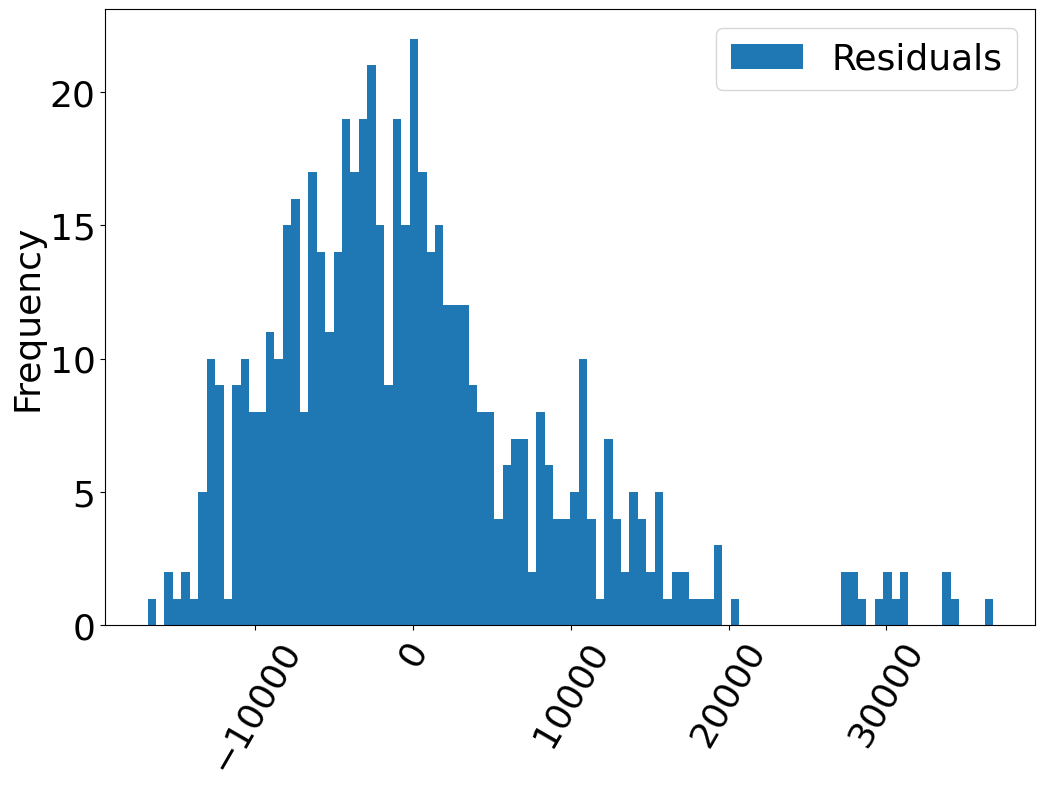

In [50]:
import matplotlib.pyplot as plt
plt.rcParams.update({"font.size":26})
fig, ax = plt.subplots(figsize = (12,8))
reg_data[["Residuals"]].plot.hist(bins = 100, ax = ax)
plt.xticks(rotation=60)

The shape is distinct because the range of the residuals is a lot less. This could mean that developed nations have a much more predictable outcome than less developed nations. The distribution also seems to be wider, not normal distribution. There also seems to be more negative residuals than positive, which suggests that the predictions often were lower than real outcomes. 

3. Plot seperate scatter plots for each variable (x-axis) against the predictor (y-axis). ThenPlot seperate scatter plots for each variable (x-axis) against the predictor (y-axis). Do we observe bias in the resdiuals when controlling for each variable? Why does this matter?

In [56]:
y_var = ["RGDP Per Capita"]
x_vars = ["Size of Government", 
          "Legal System & Property Rights", 
          "Sound Money",
          "Freedom to trade internationally",
          "Regulation"]
#           "RGDP Per Capita Lag"]

y = reg_data[y_var]
X = reg_data[x_vars]
# X["Constant"] = 1
results = sm.OLS(y, X).fit()
reg_data["Predictor"] = results.predict()

In [57]:
betaEstimates = results.params
tStats = results.tvalues
pValues = results.pvalues
stdErrors = results.bse

resultsDict = {"Beta Estimates" : betaEstimates,
              "t-stats":tStats,
              "p-values":pValues,
              "Standard Errors":stdErrors}
resultsDF = pd.DataFrame(resultsDict)
resultsDF.round(3)

,Beta Estimates,t-stats,p-values,Standard Errors
Size of Government,-1327.043,-3.597,0.000,368.896
Legal System & Property Rights,8627.333,20.778,0.000,415.213
Sound Money,3084.869,5.454,0.000,565.647
Freedom to trade internationally,-6453.270,-9.882,0.000,653.010
Regulation,466.167,0.767,0.444,607.974


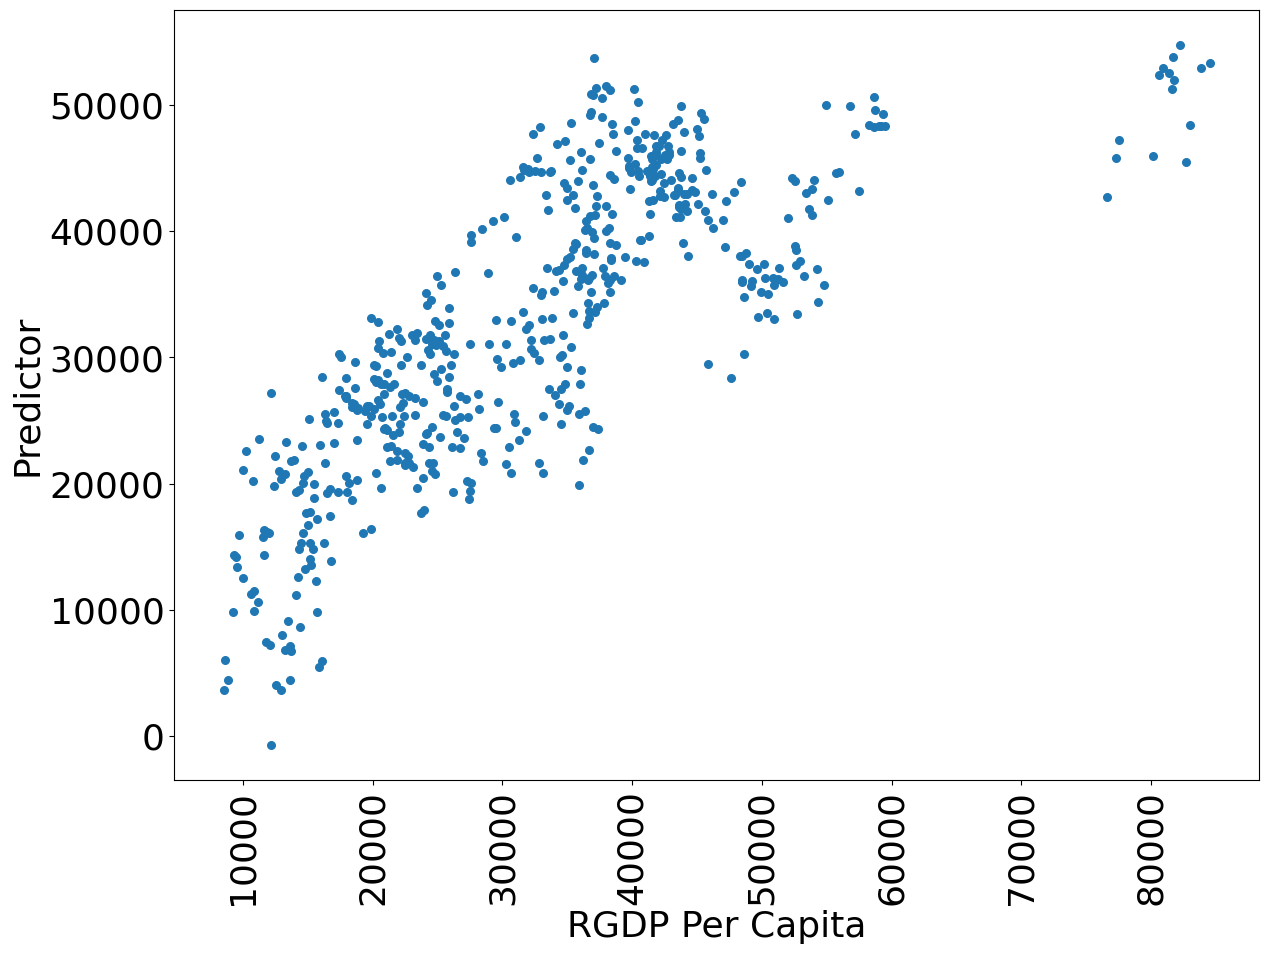

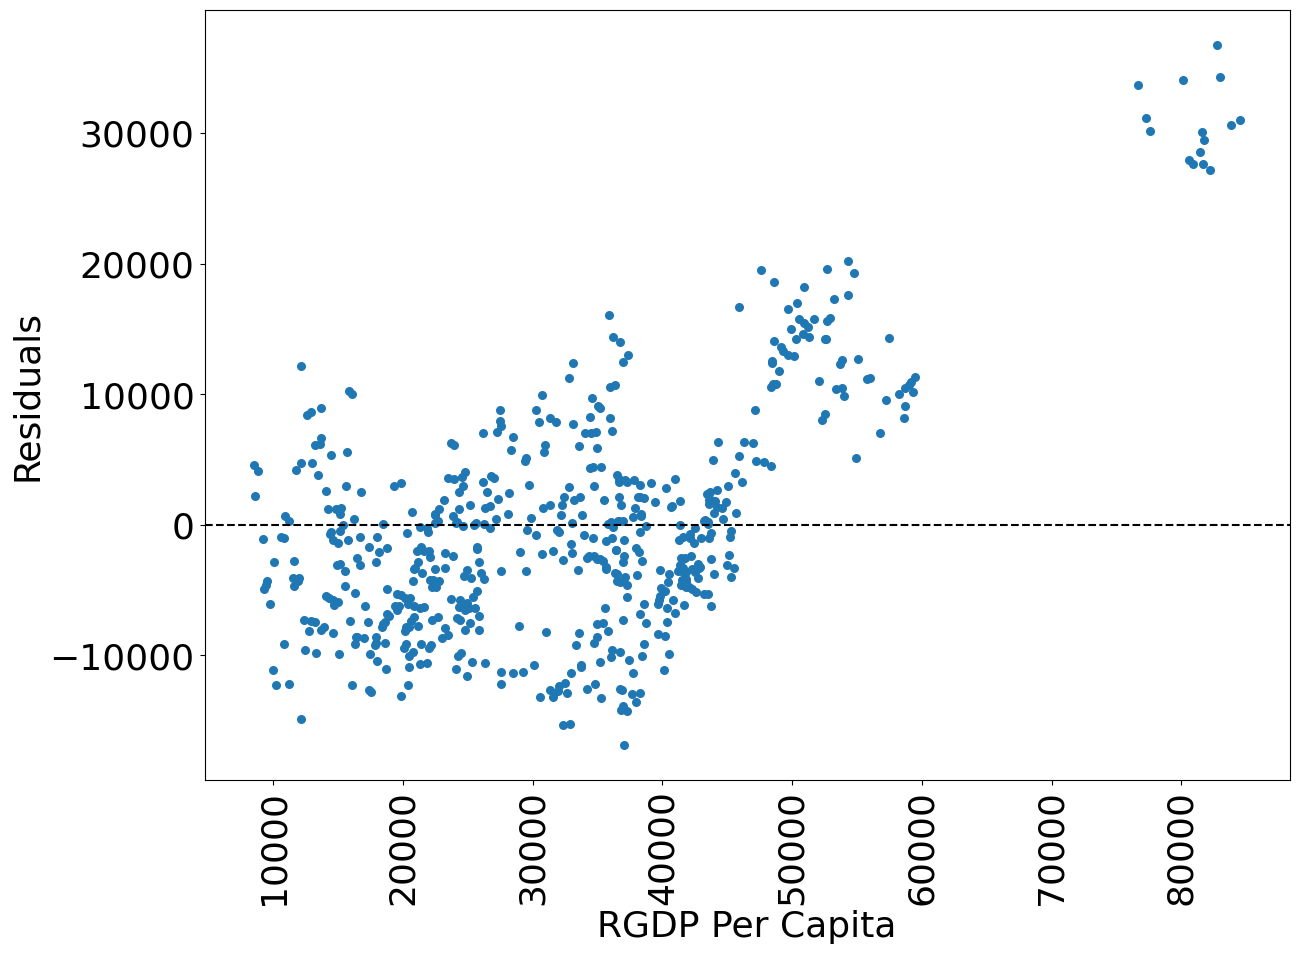

In [58]:
fig, ax = plt.subplots(figsize = (14,10))
reg_data.plot.scatter(x = y_var[0],
                 y = "Predictor", 
                  s = 30, ax = ax)
plt.xticks(rotation=90)
plt.show()
plt.close()

fig, ax = plt.subplots(figsize = (14,10))
reg_data.plot.scatter(x = y_var[0],
                 y = "Residuals", 
                  s = 30, ax = ax)
ax.axhline(0, ls = "--", color = "k")
plt.xticks(rotation=90)
plt.show()
plt.close()

4. Plot the observed and predicted values of RGDP Per Capita for each individual country.

In [59]:
countries = reg_data.groupby("ISO_Code").mean().index
plot_data = reg_data[y_var + ["Predictor"]]
for key in plot_data:
    plot_data[key] = plot_data[key] + 1

plot_data

C:\Users\adamp\AppData\Local\Temp\ipykernel_2112\2487526735.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_data[key] = plot_data[key] + 1


RGDP Per Capita     Predictor
ISO_Code Year                                     
AUS      2001-01-01          39674.0  45774.675534
         2002-01-01          40793.0  46549.163577
         2003-01-01          41545.0  45722.894215
         2004-01-01          42712.0  45689.830456
         2005-01-01          43502.0  48794.786767
...                              ...           ...
USA      2011-01-01          49676.0  33203.193078
         2012-01-01          50395.0  33512.174645
         2013-01-01          50864.0  36249.363200
         2014-01-01          51665.0  35923.645192
         2015-01-01          52592.0  38468.566890

[570 rows x 2 columns]

C:\Users\adamp\AppData\Local\Temp\ipykernel_2112\799958213.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize = (12,8))


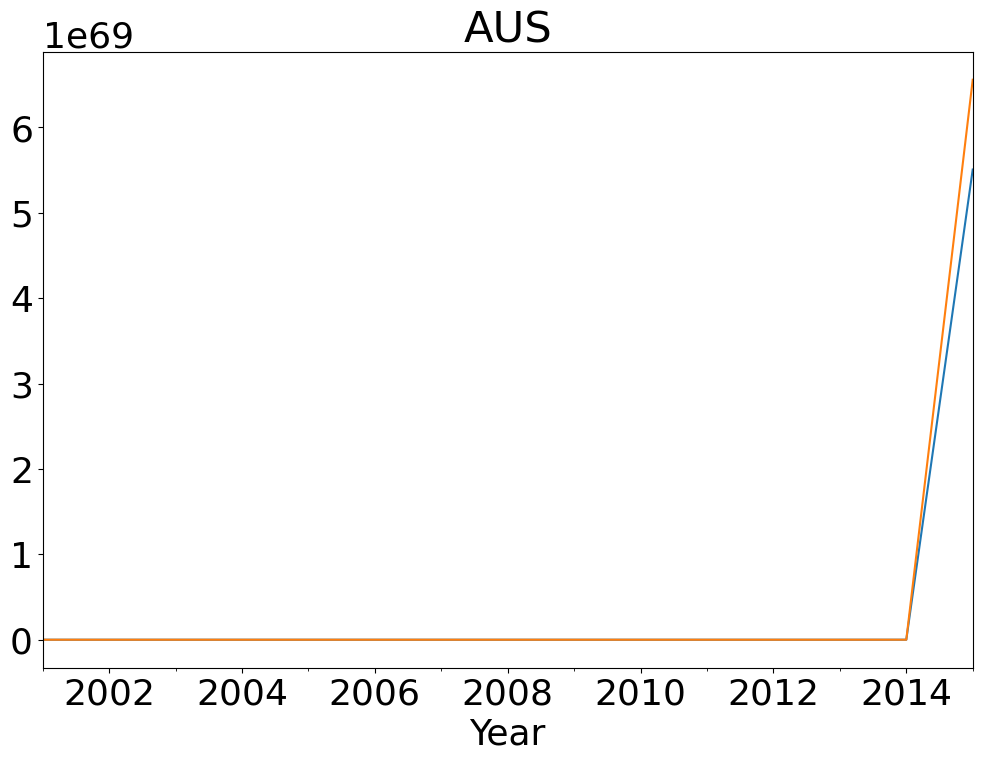

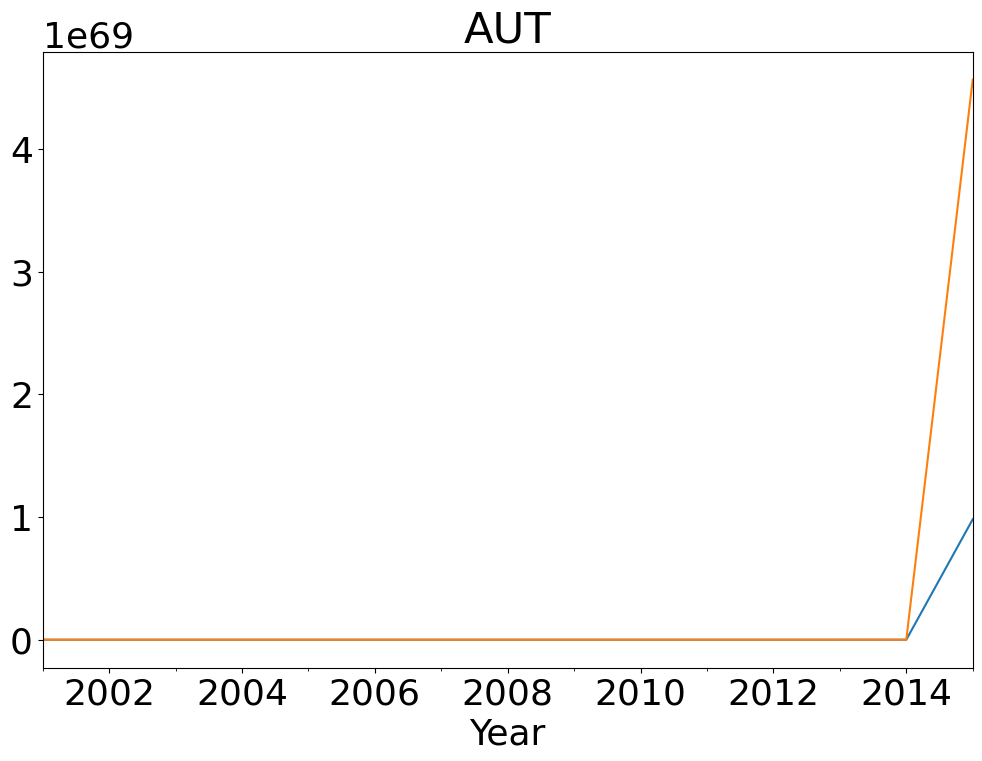

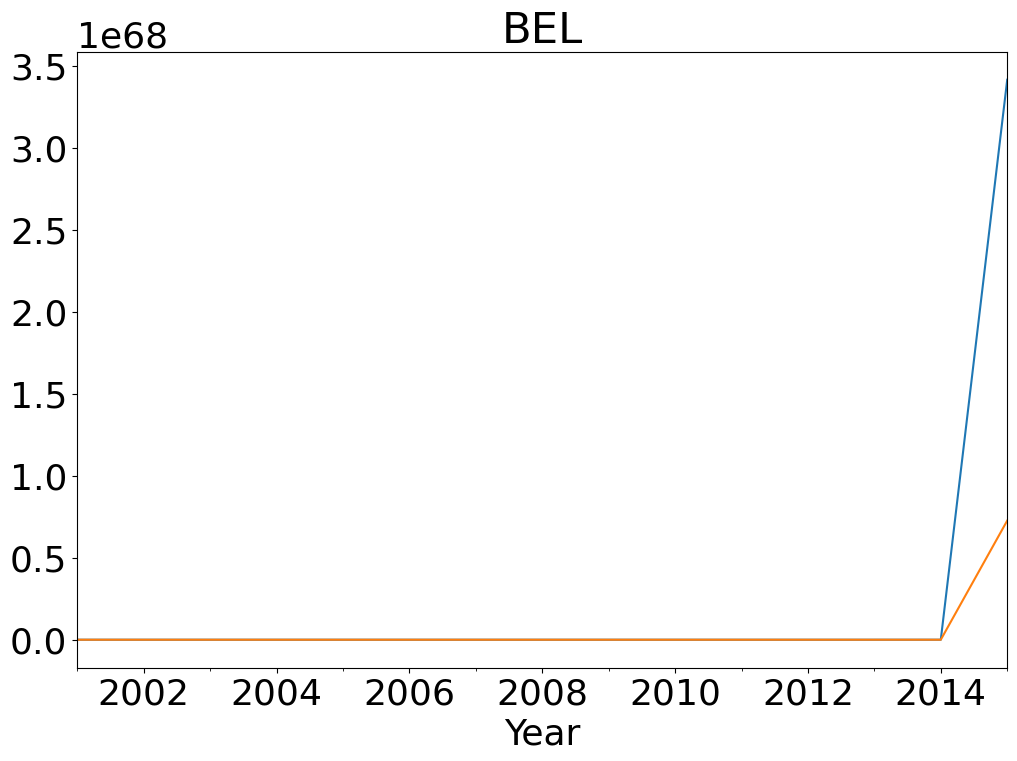

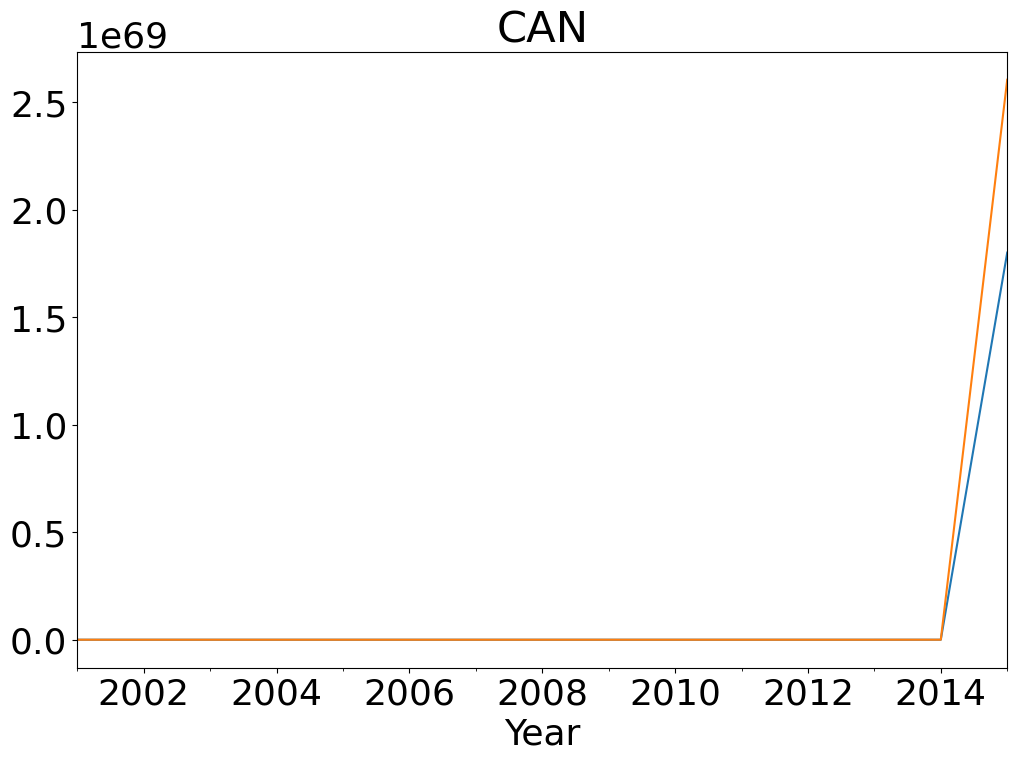

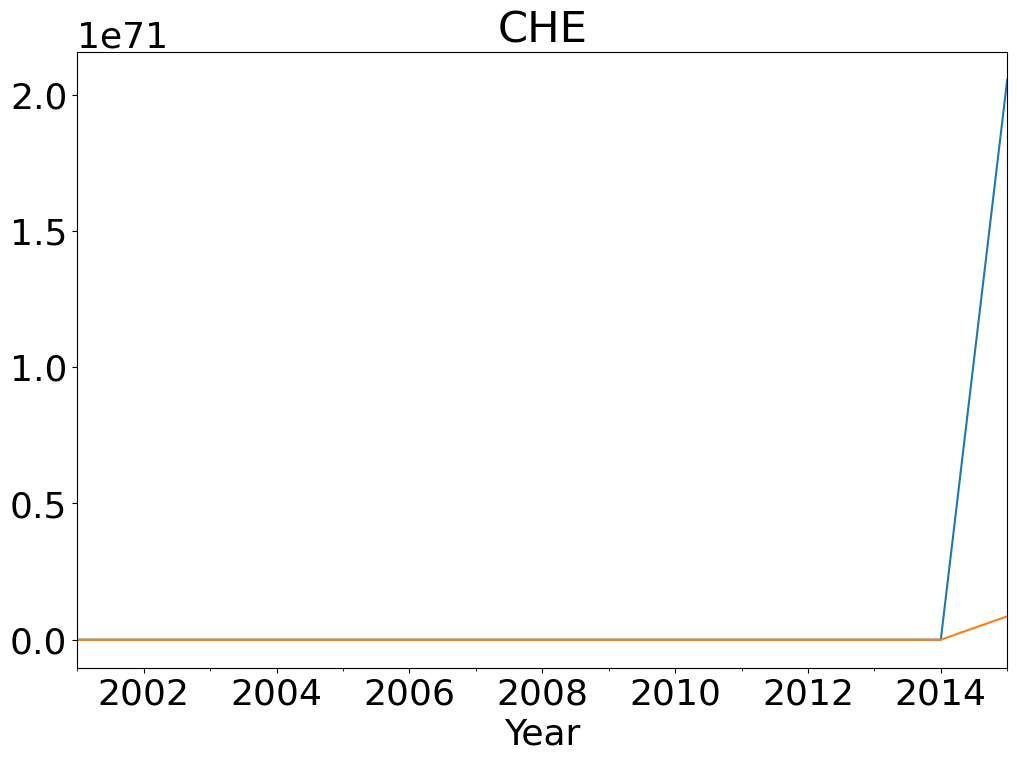

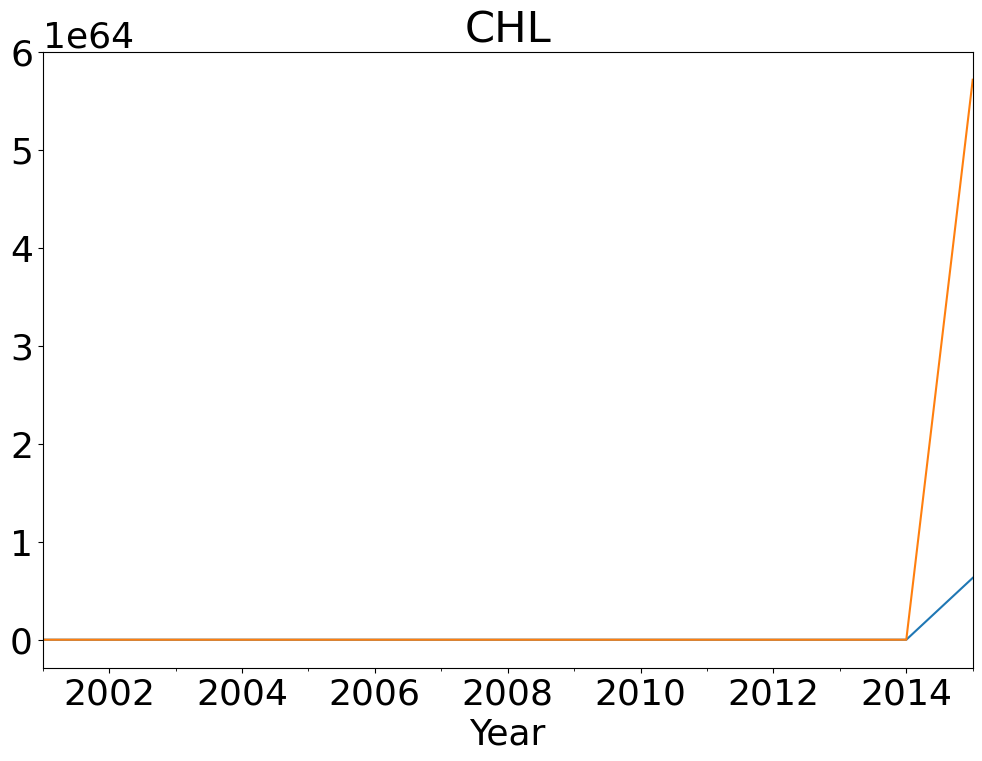

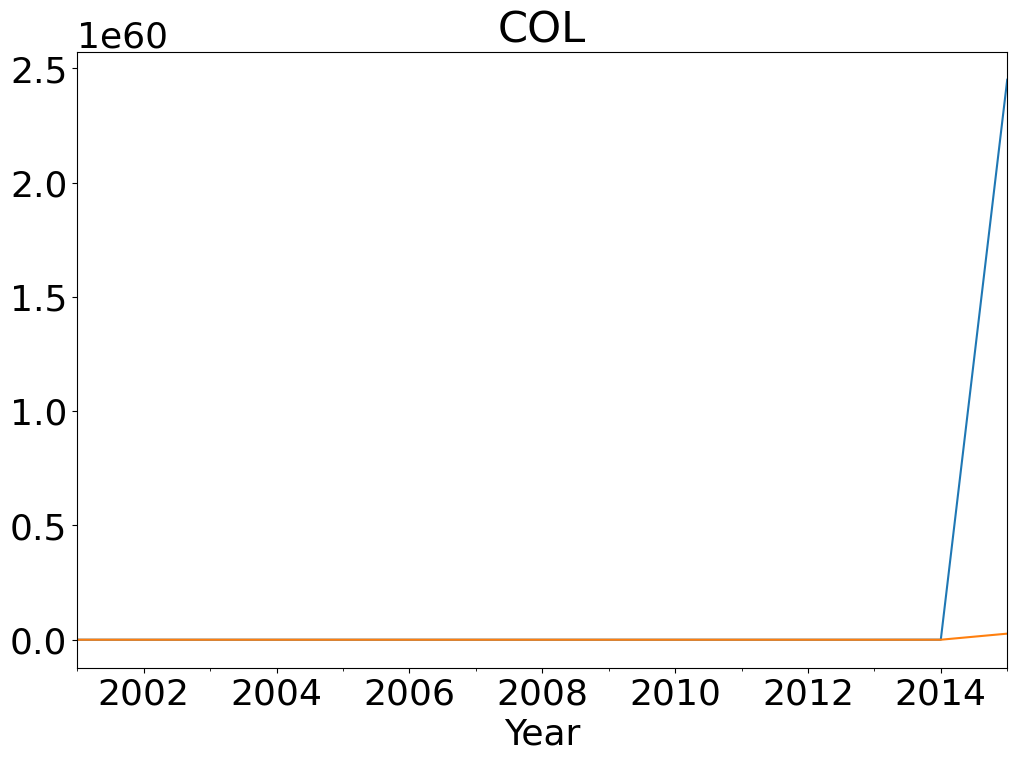

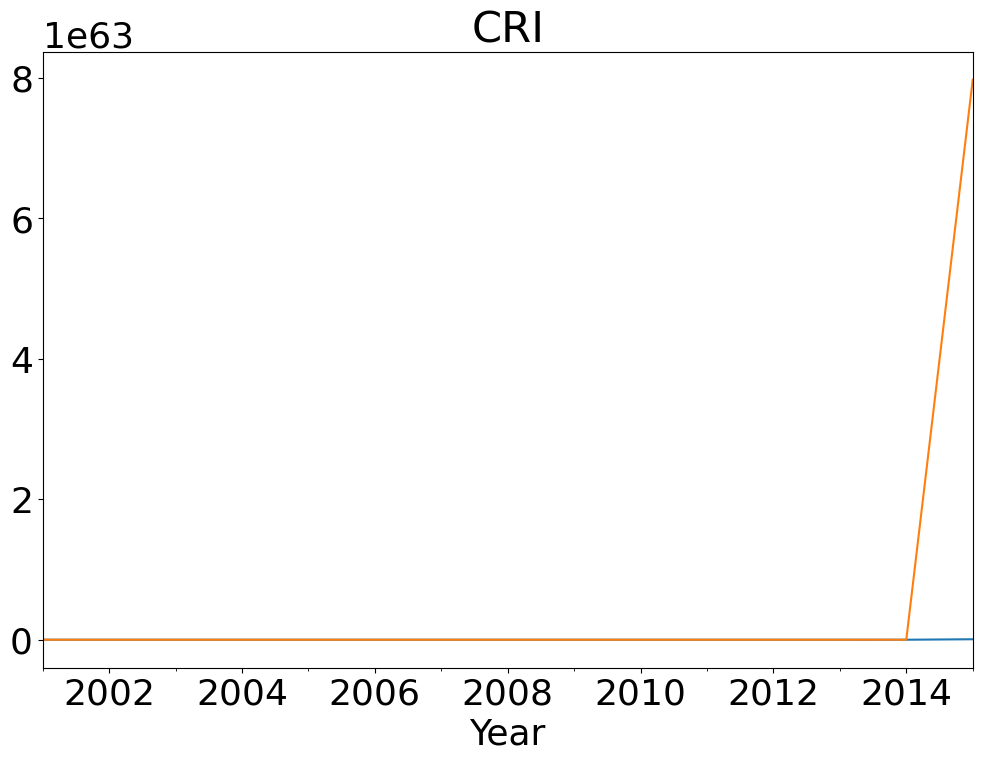

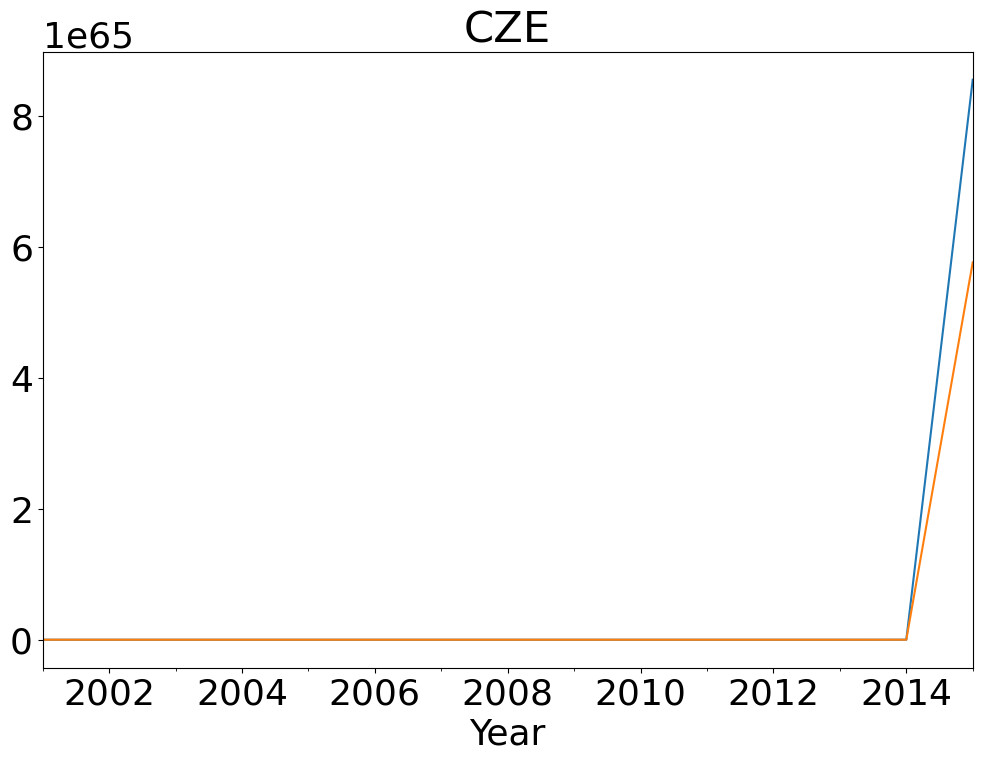

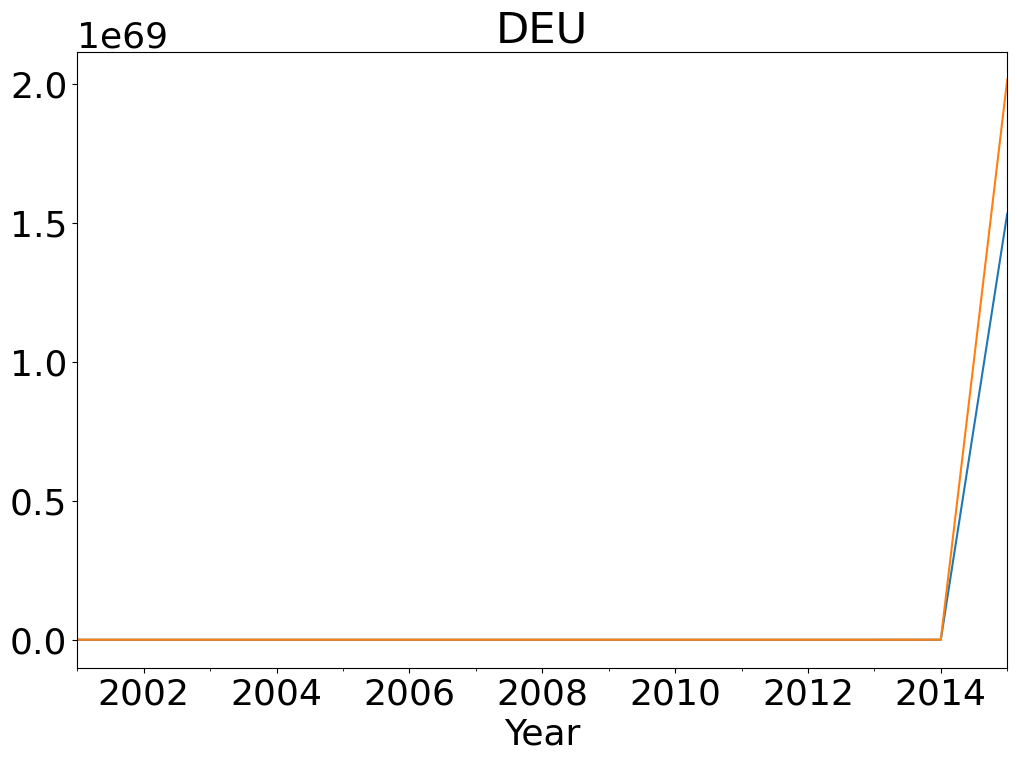

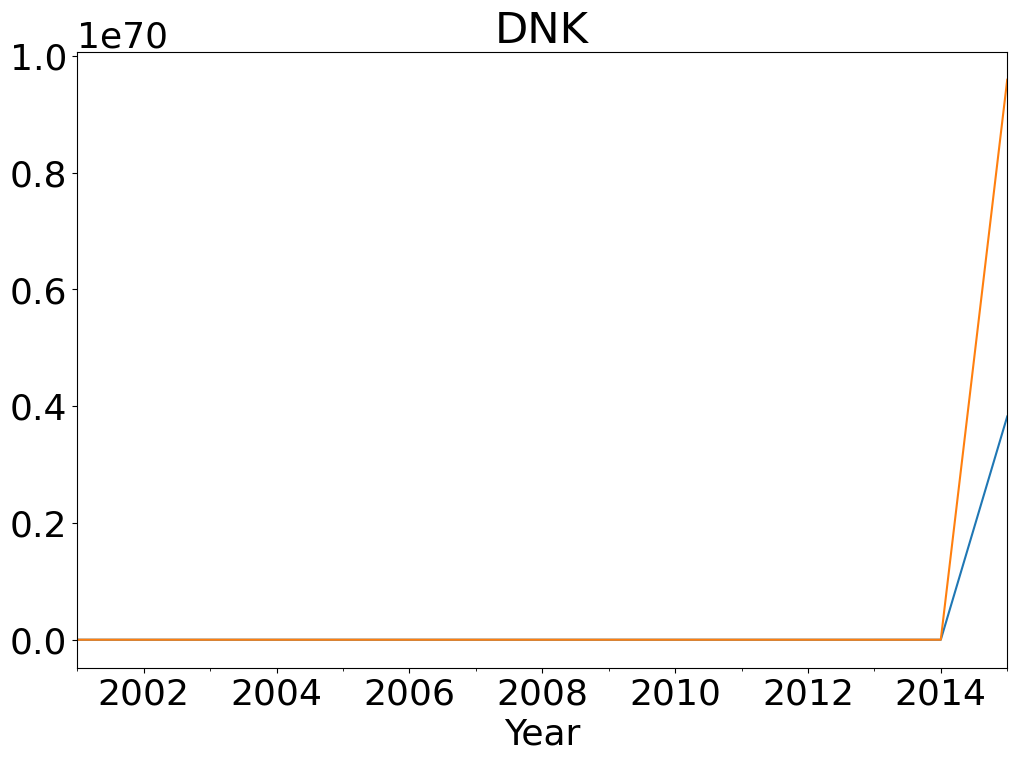

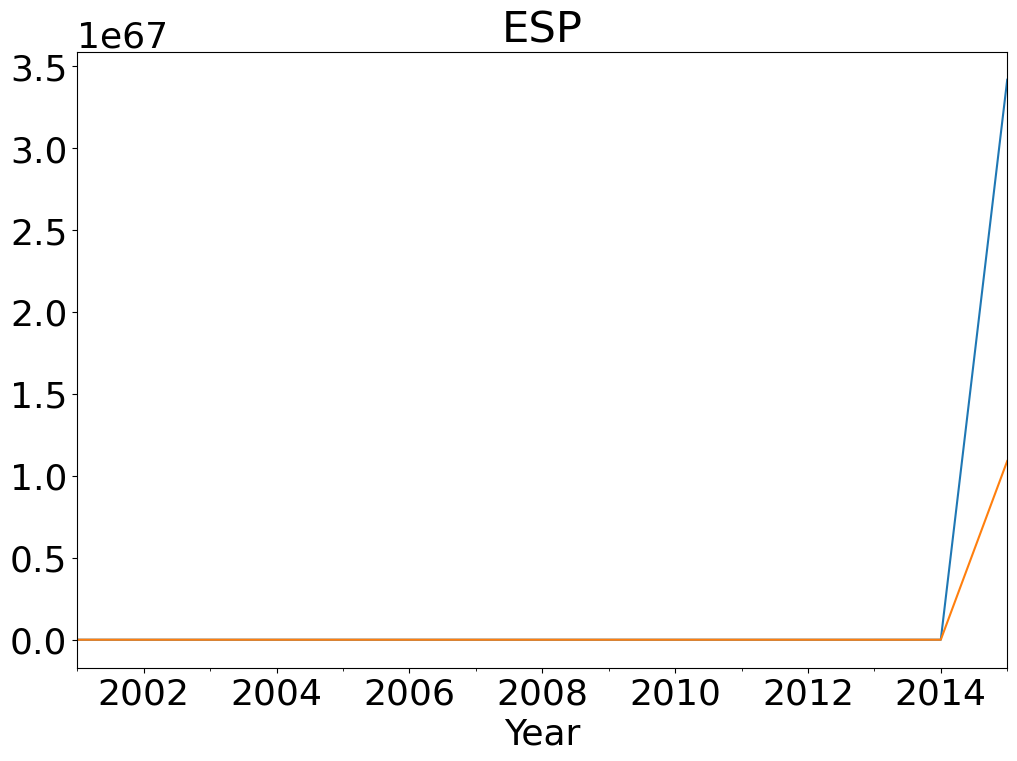

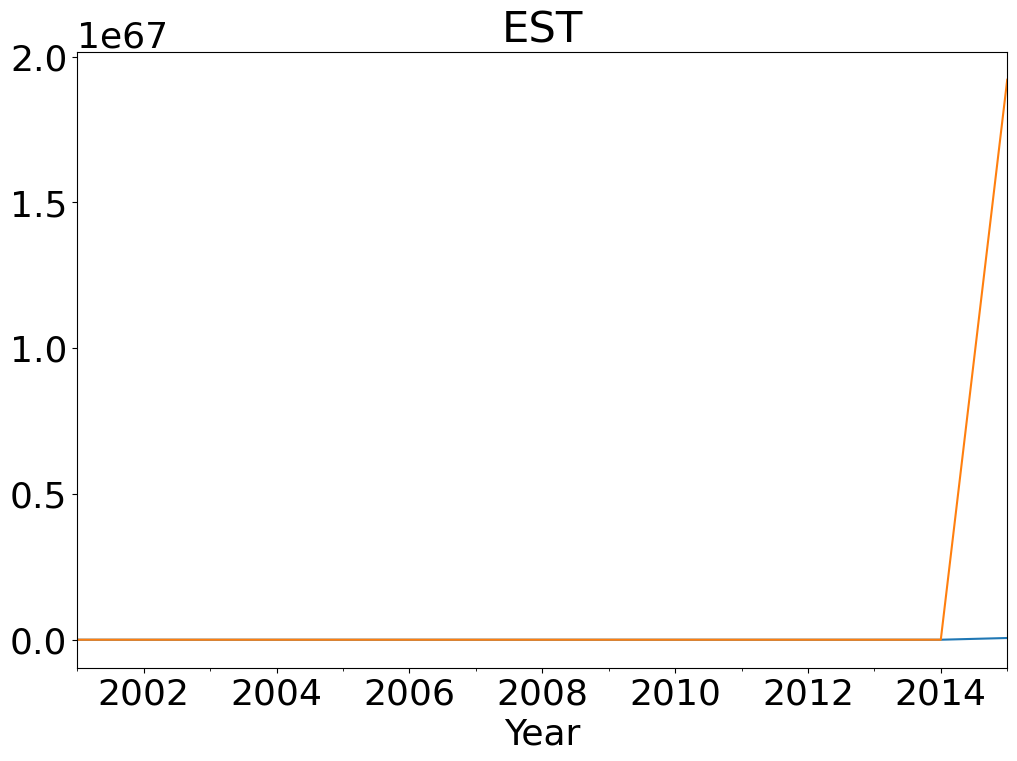

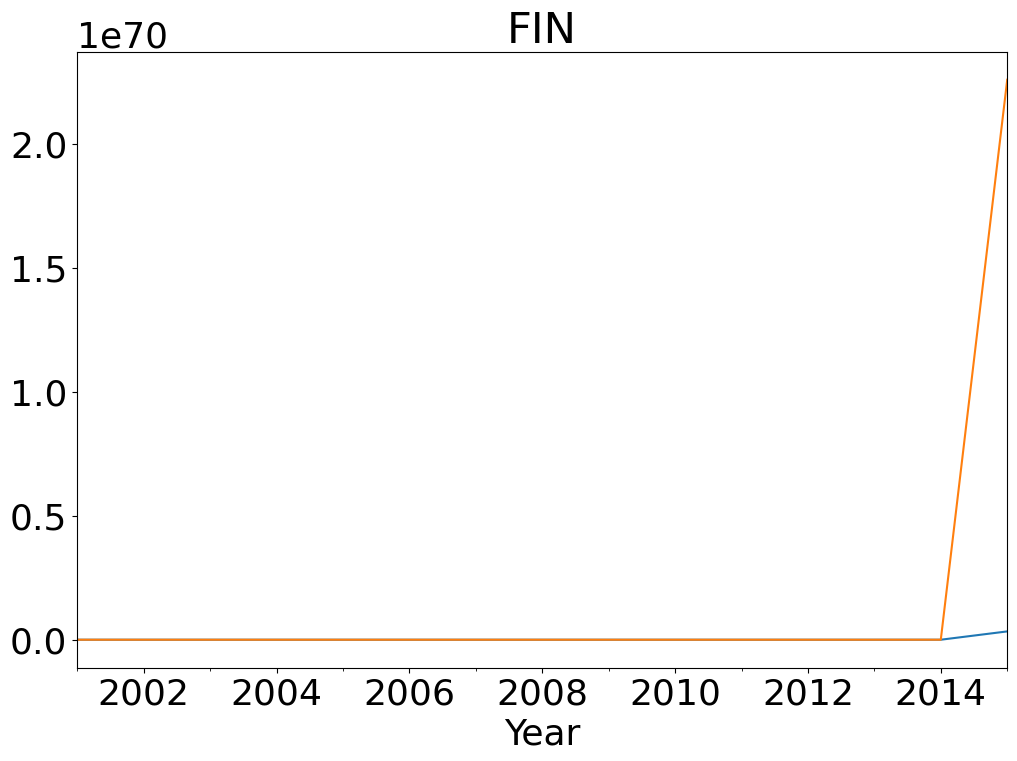

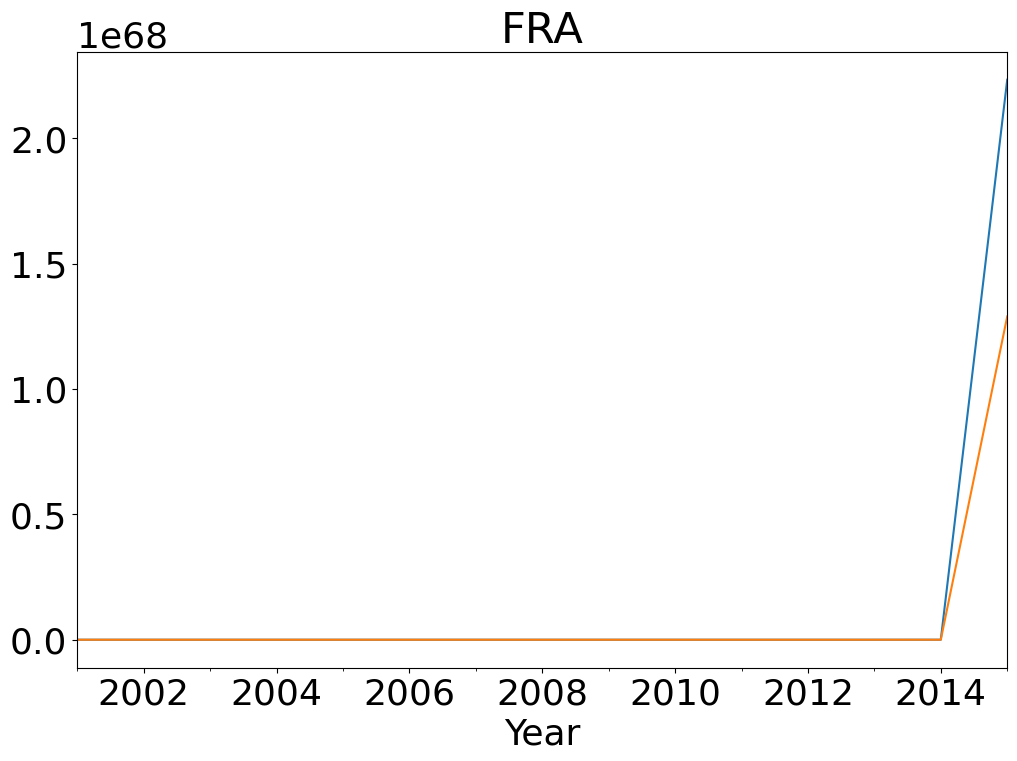

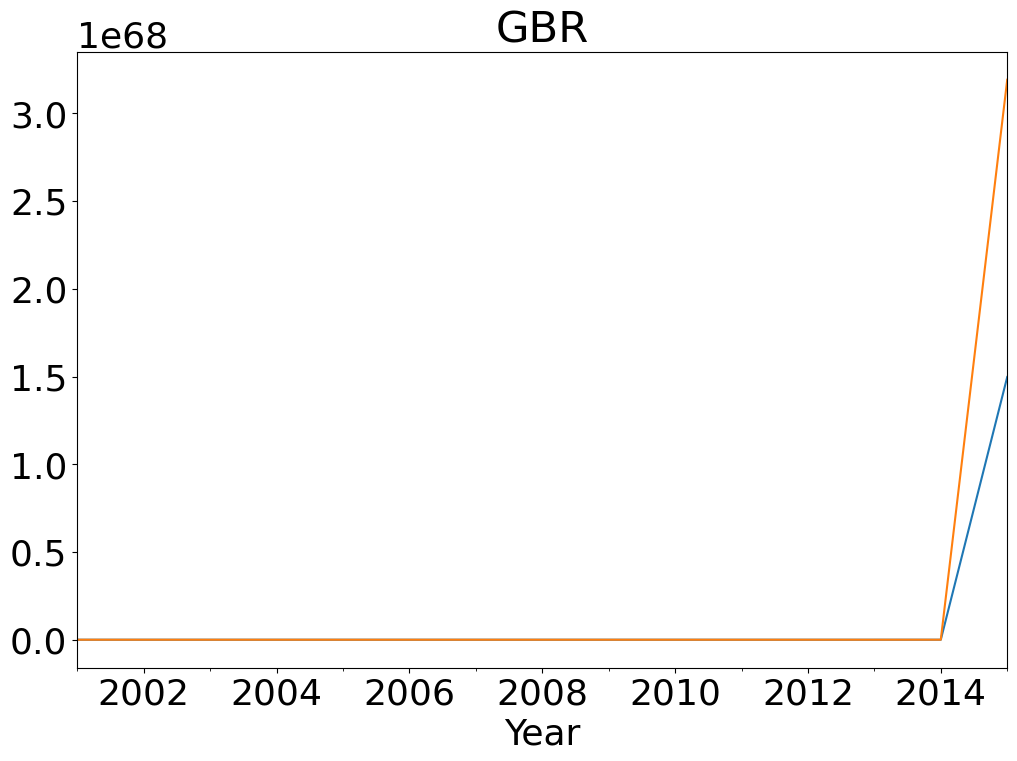

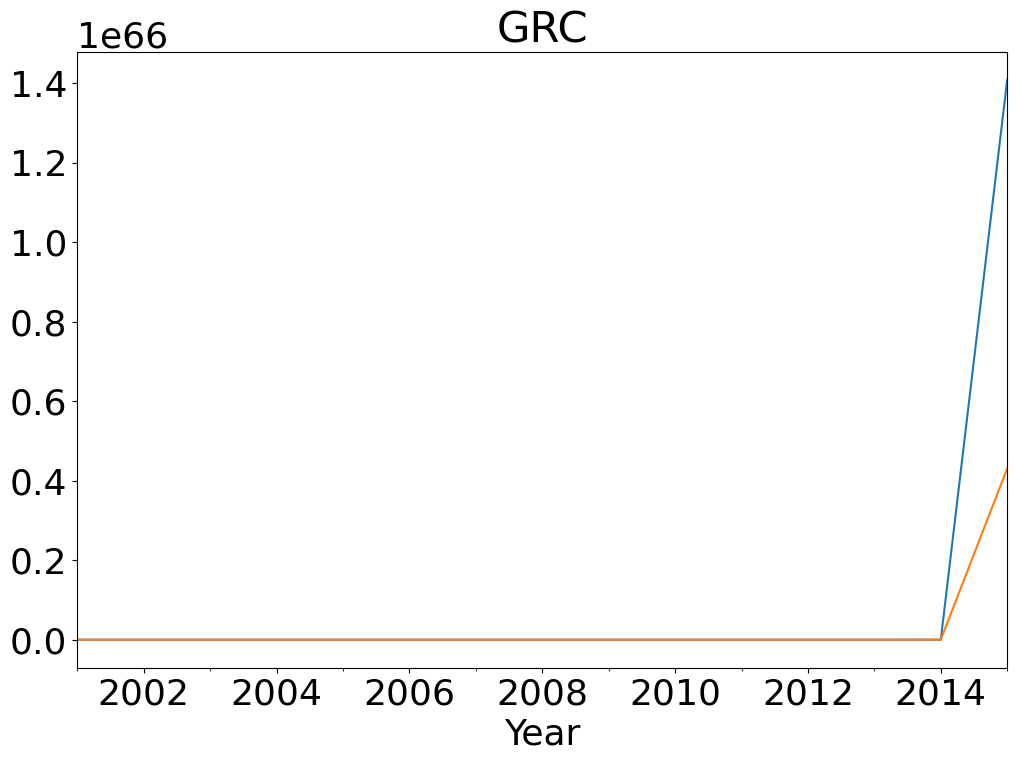

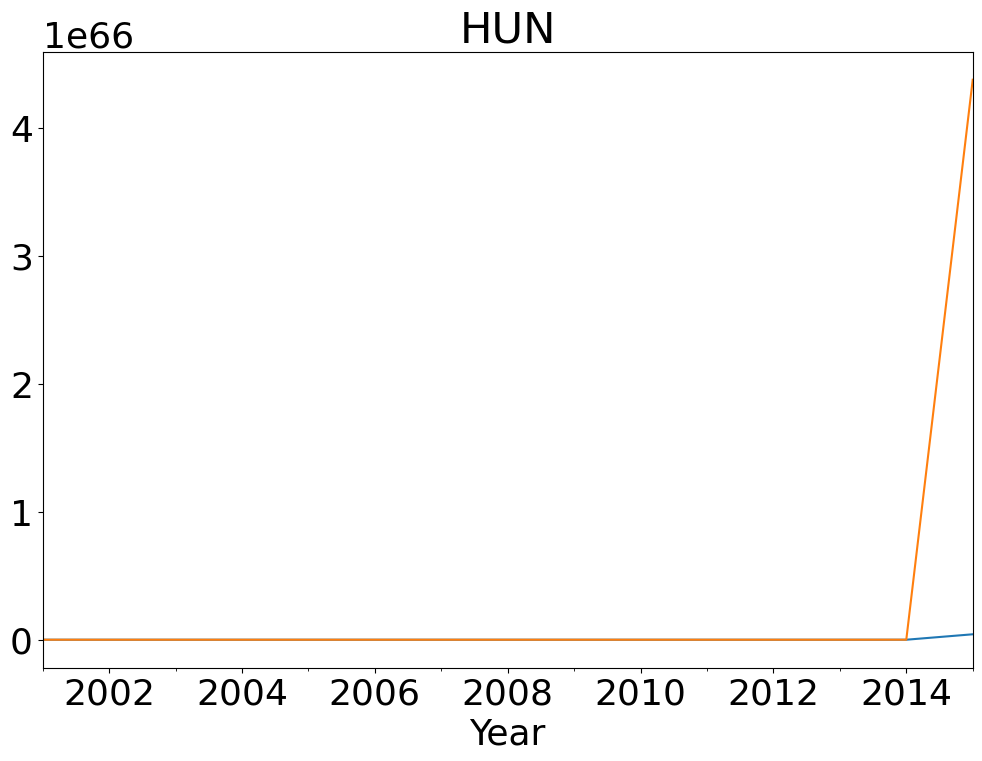

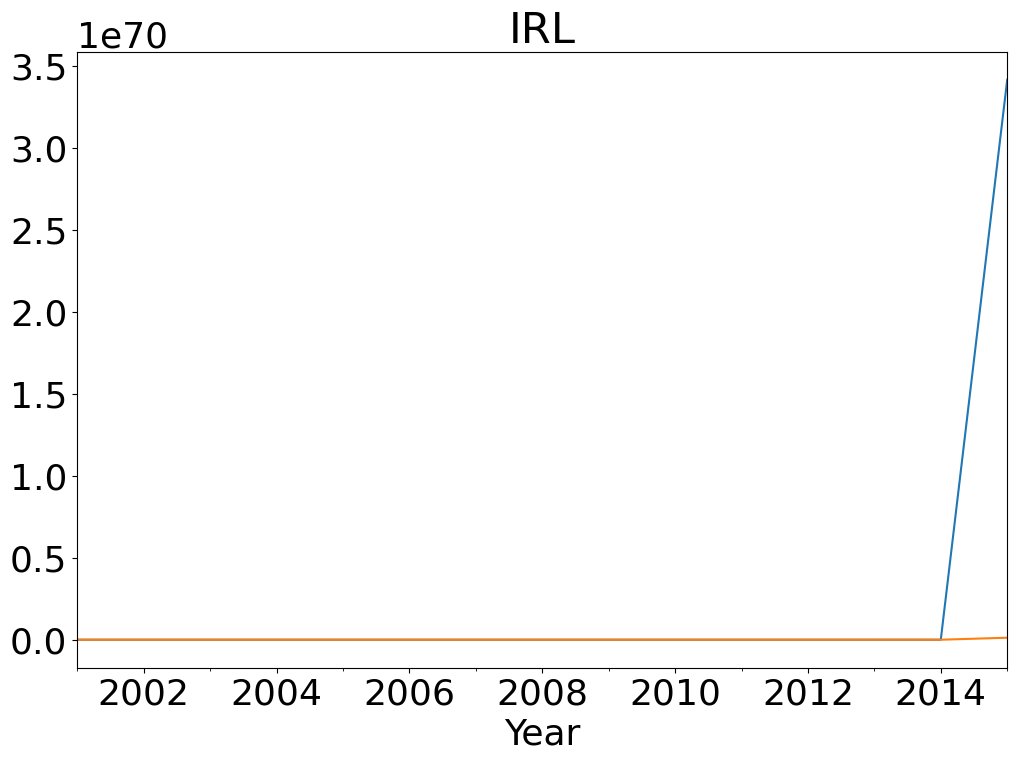

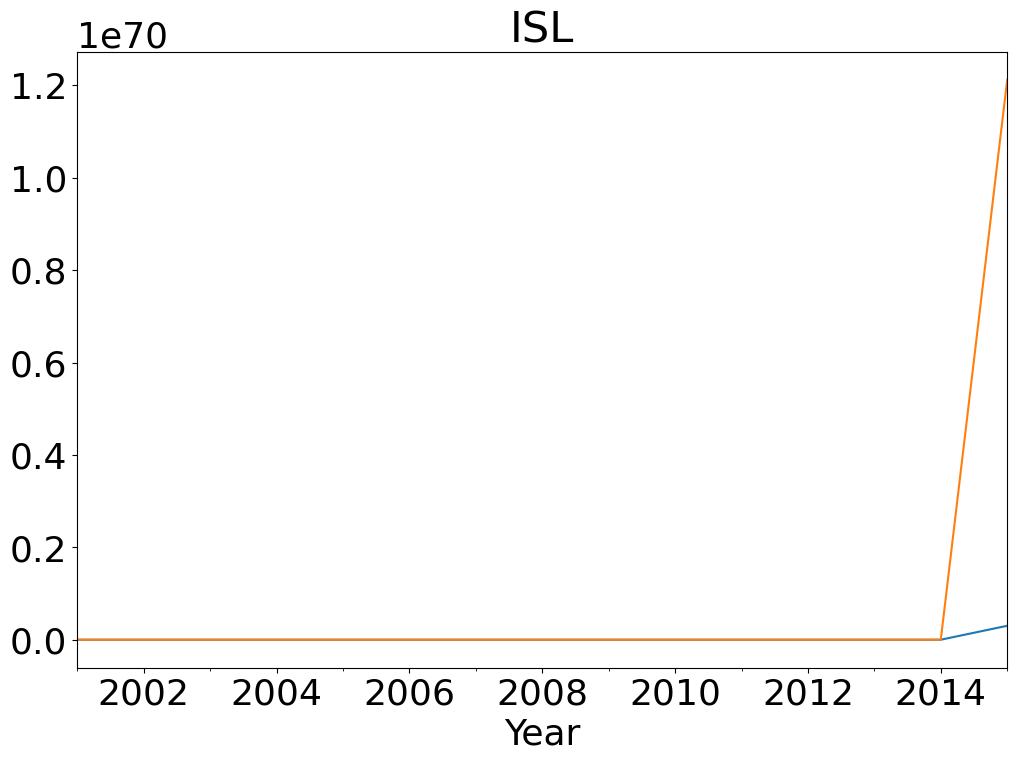

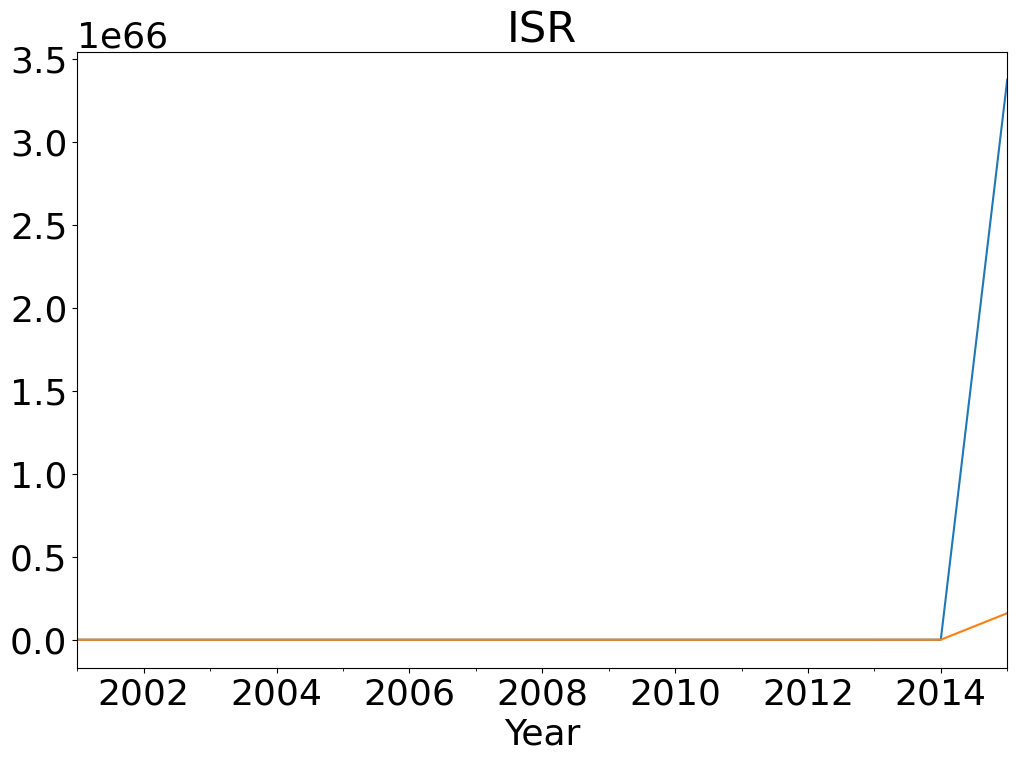

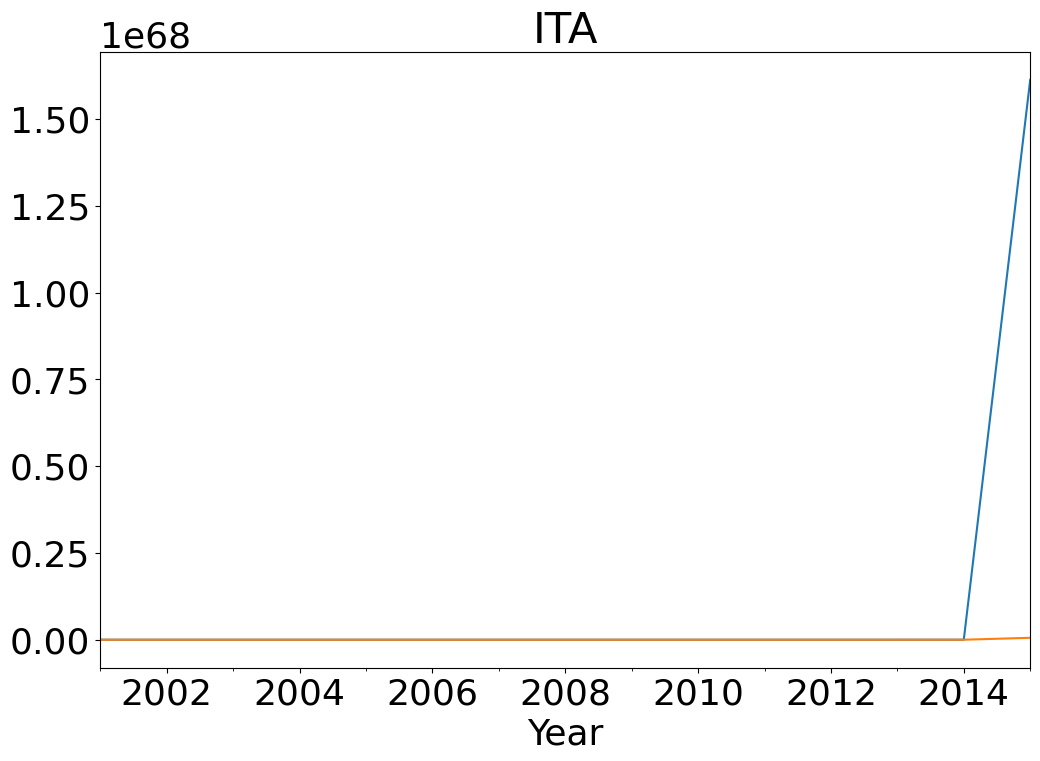

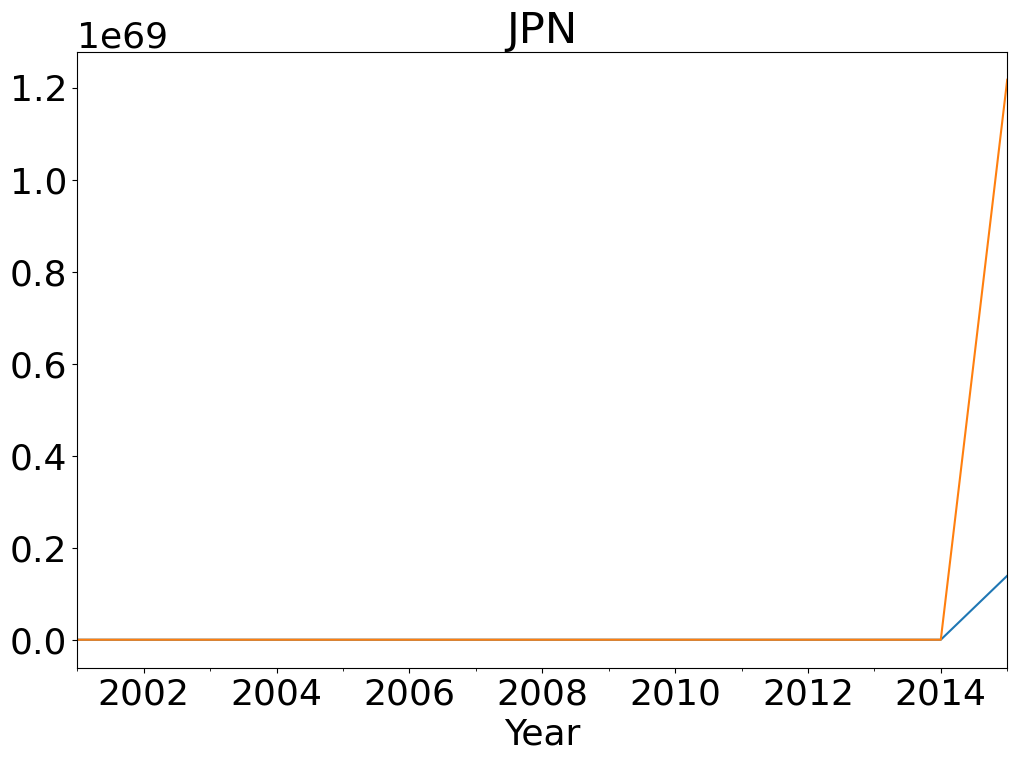

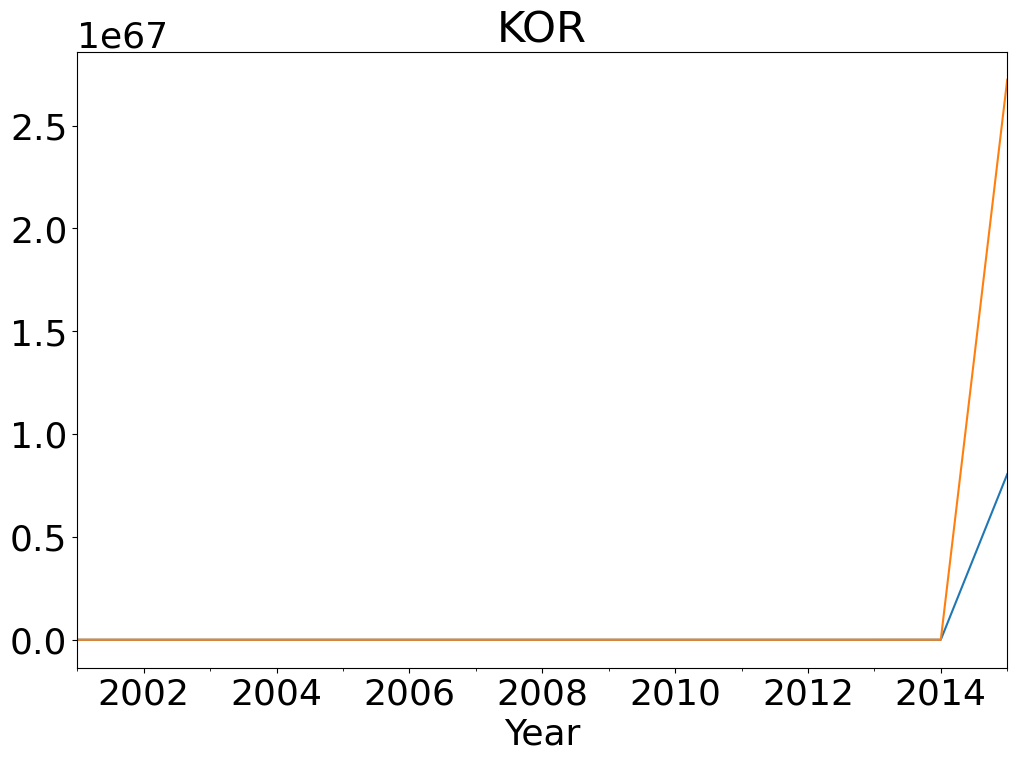

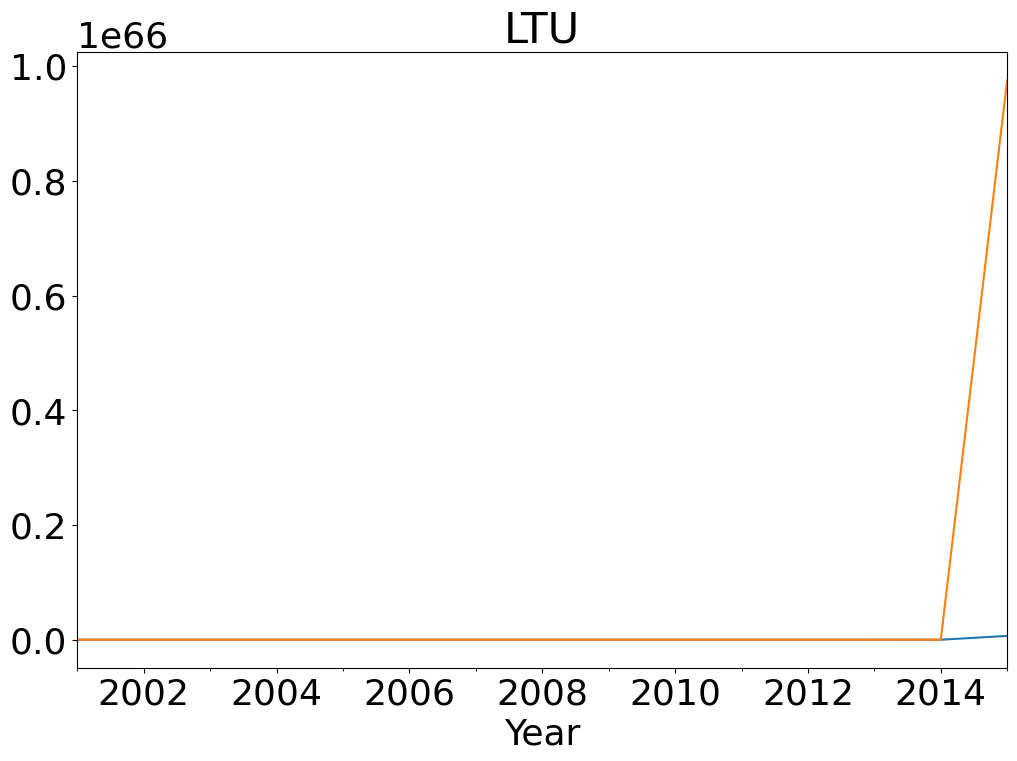

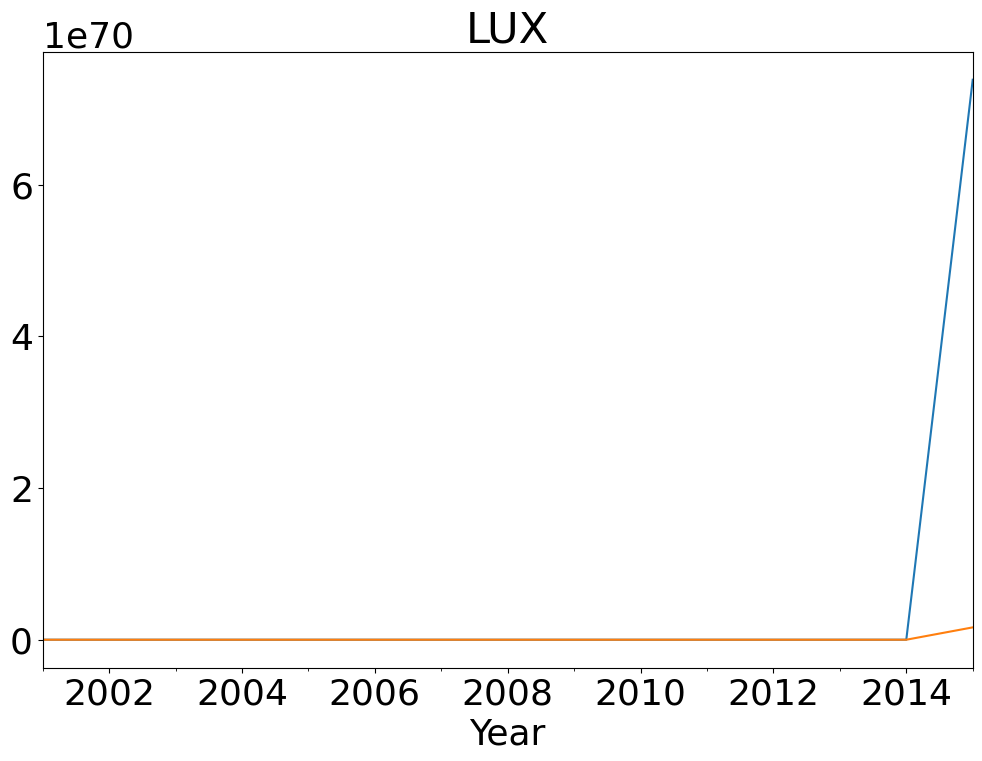

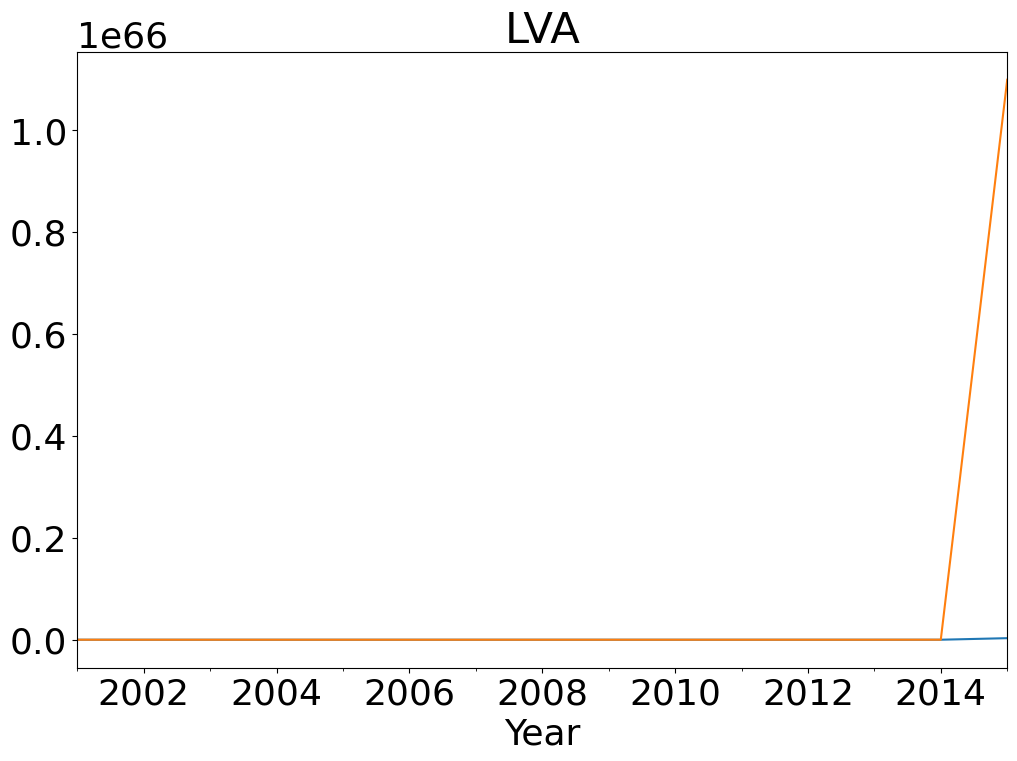

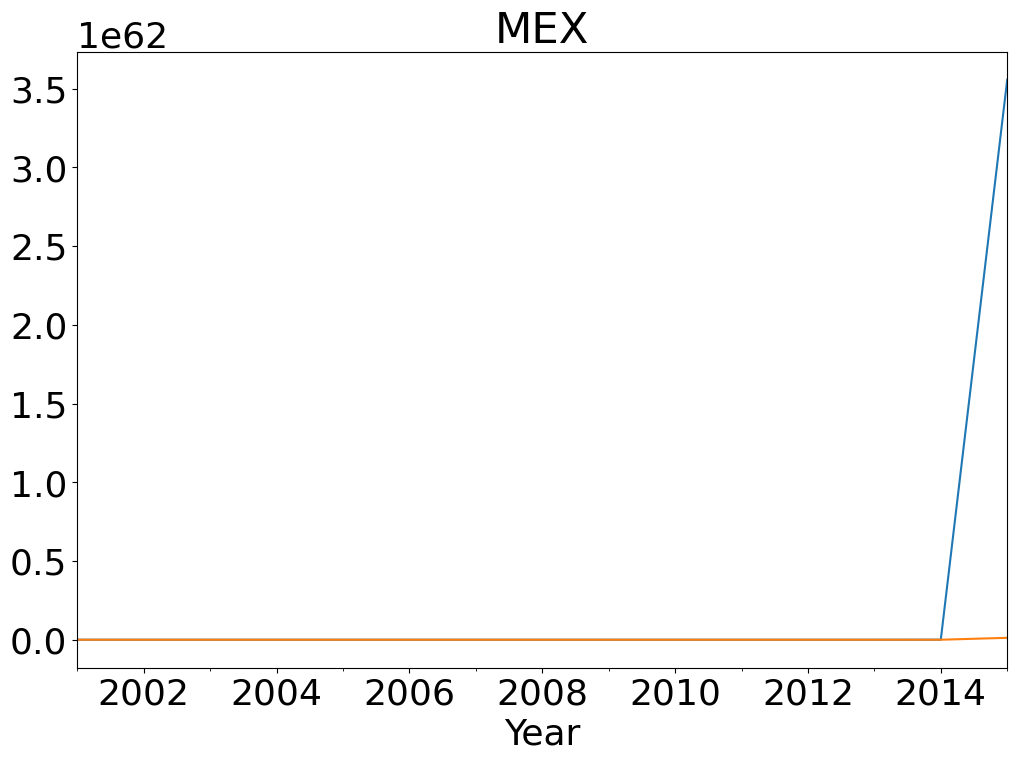

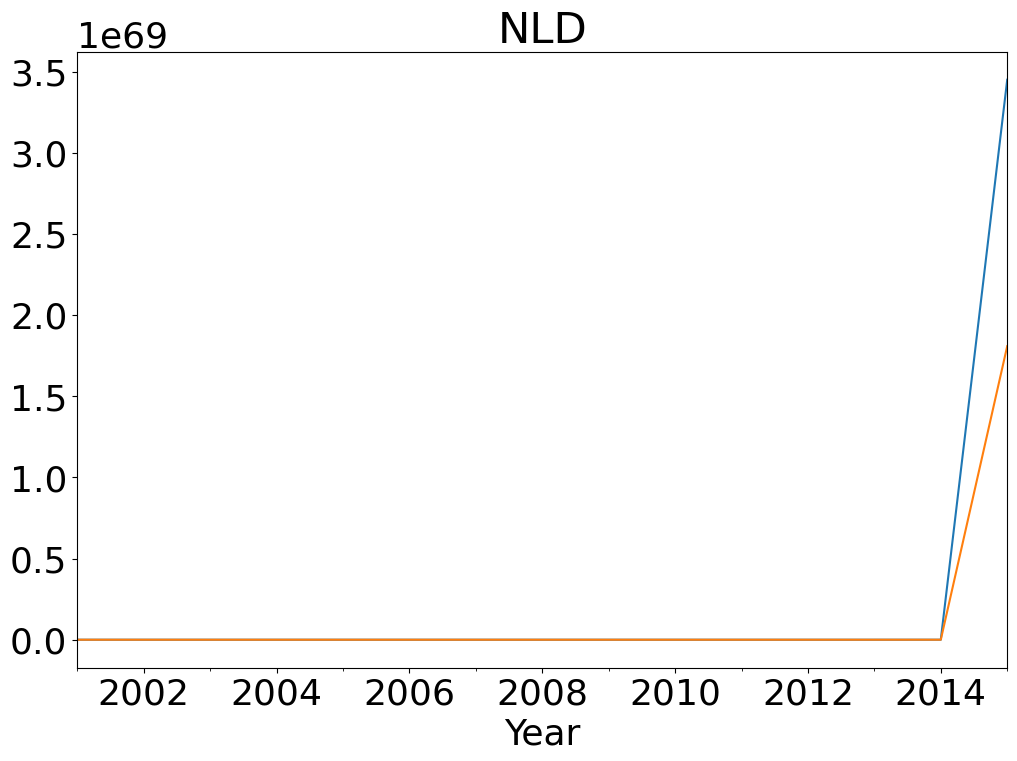

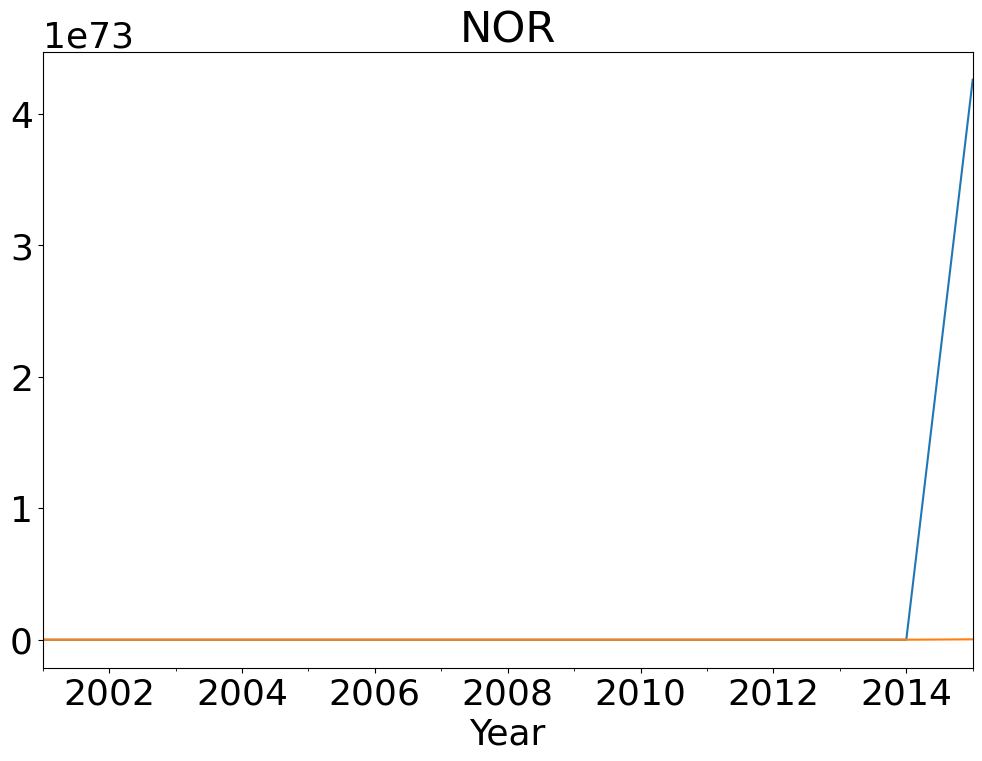

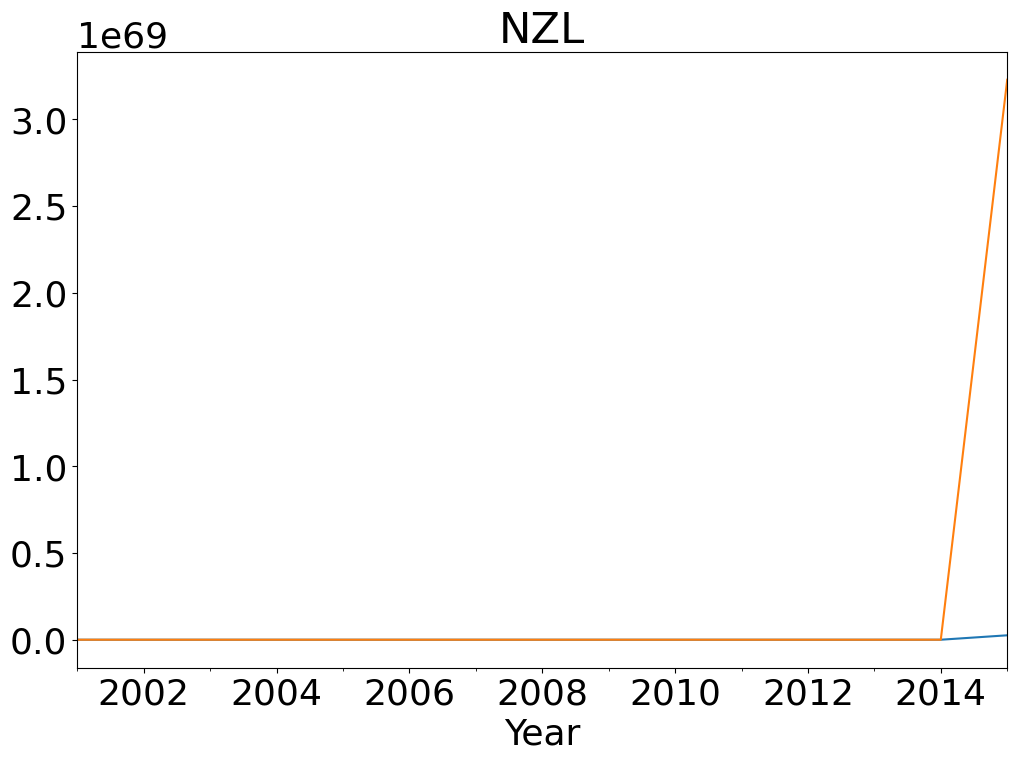

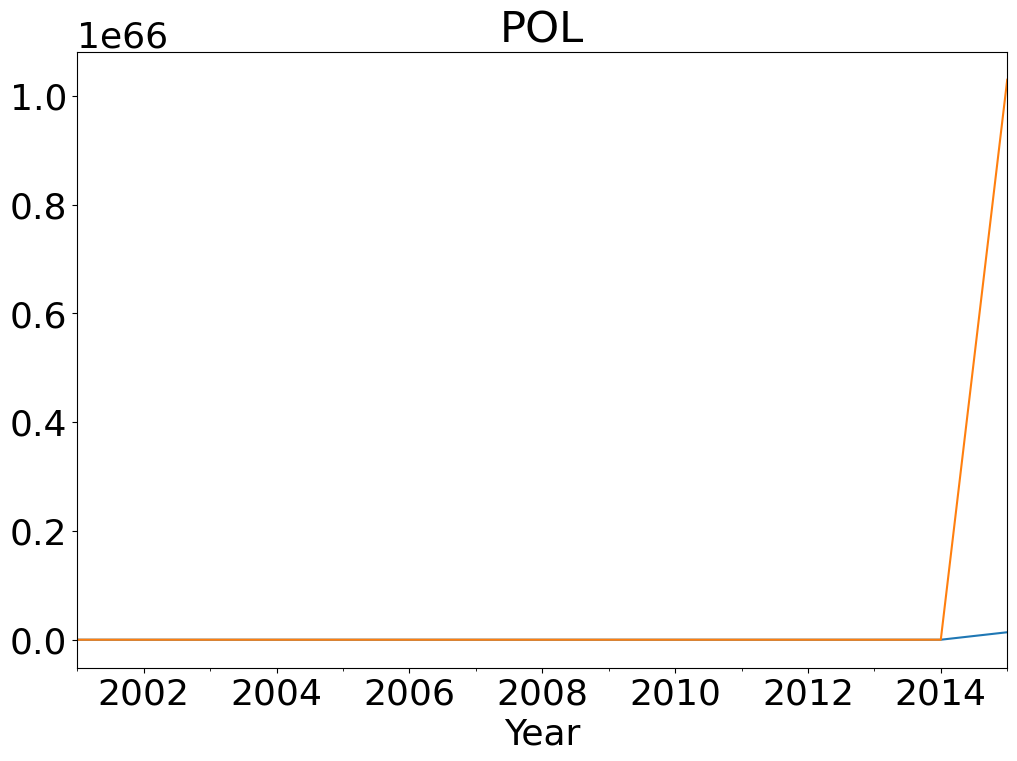

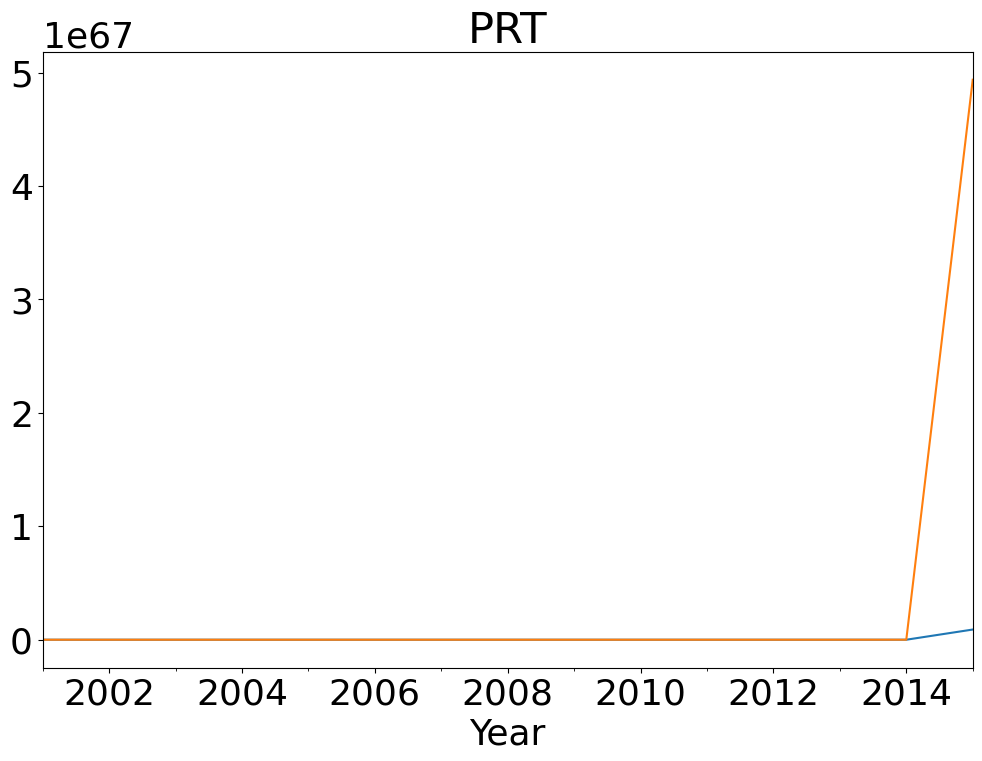

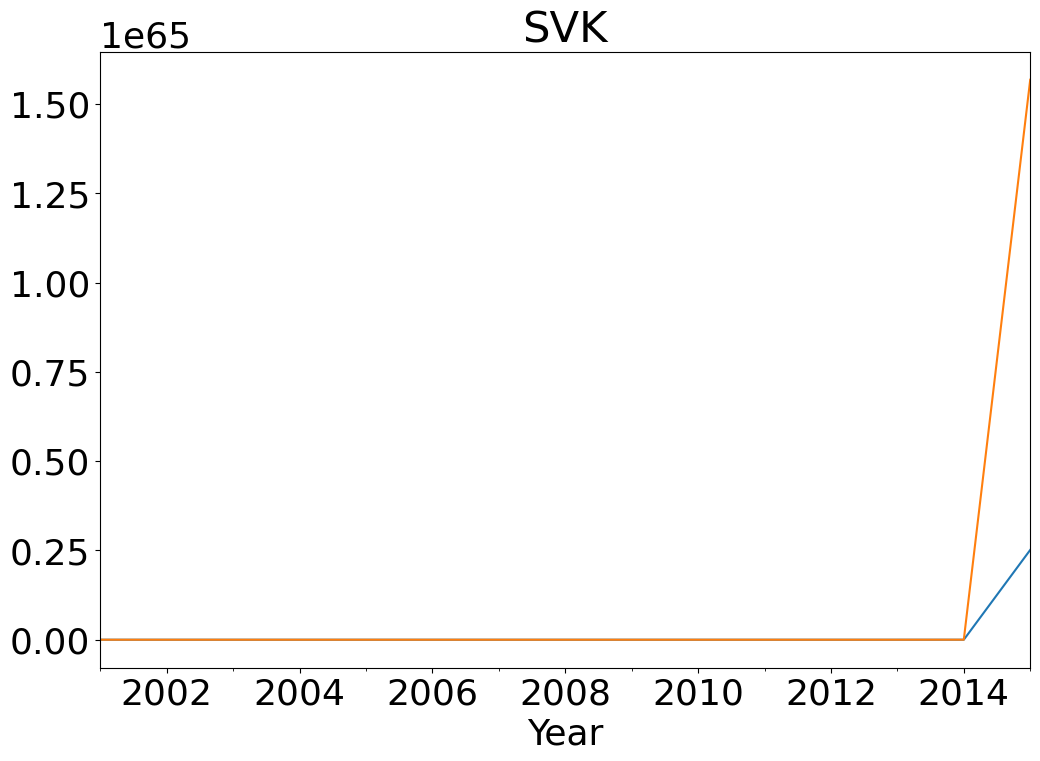

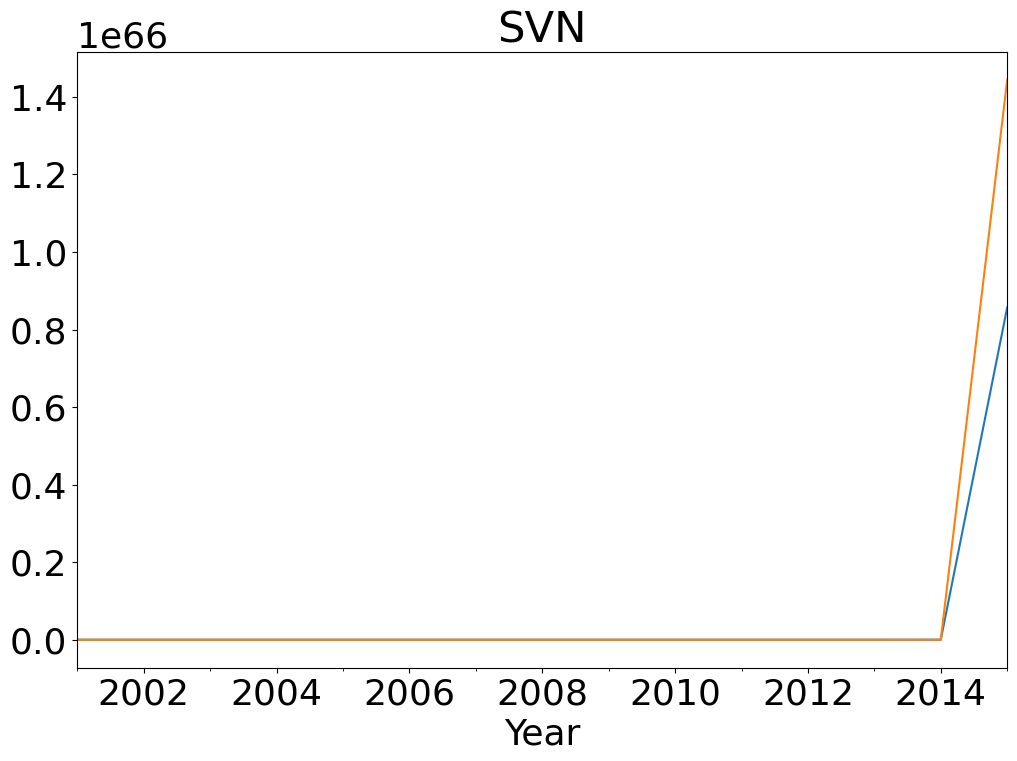

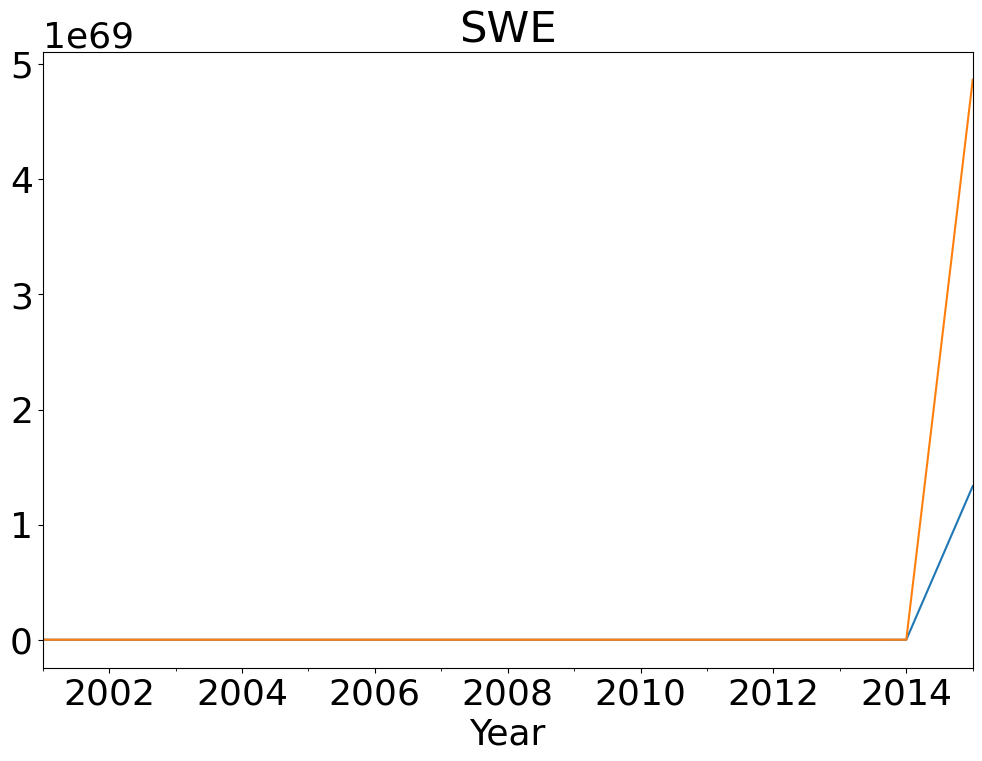

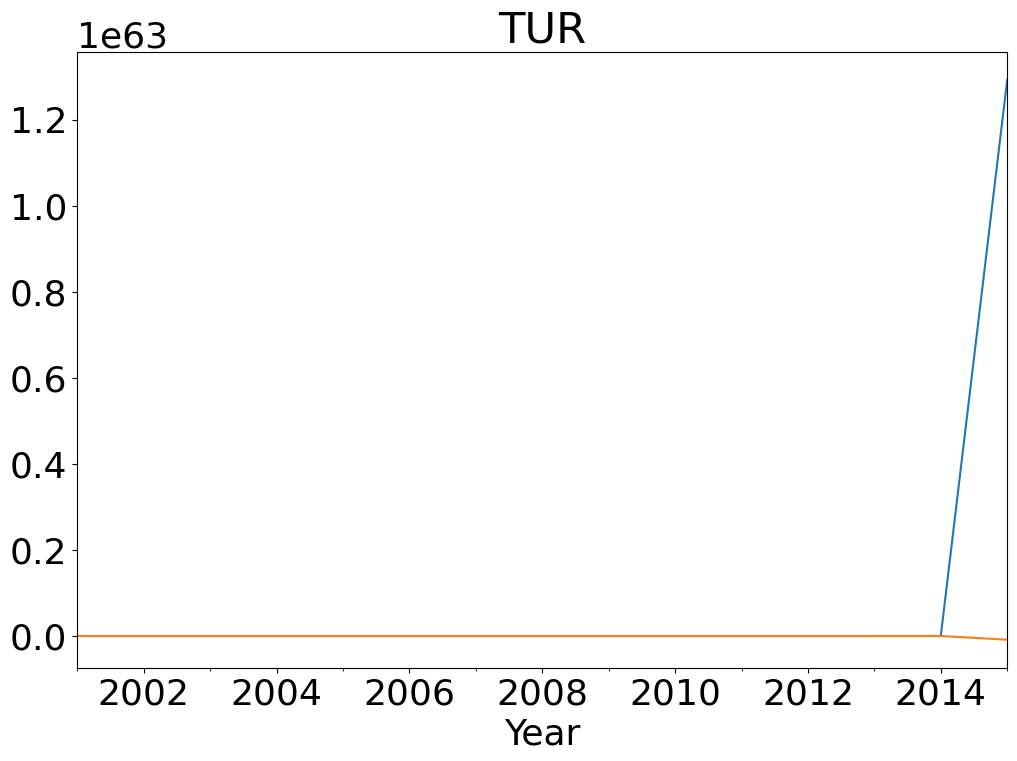

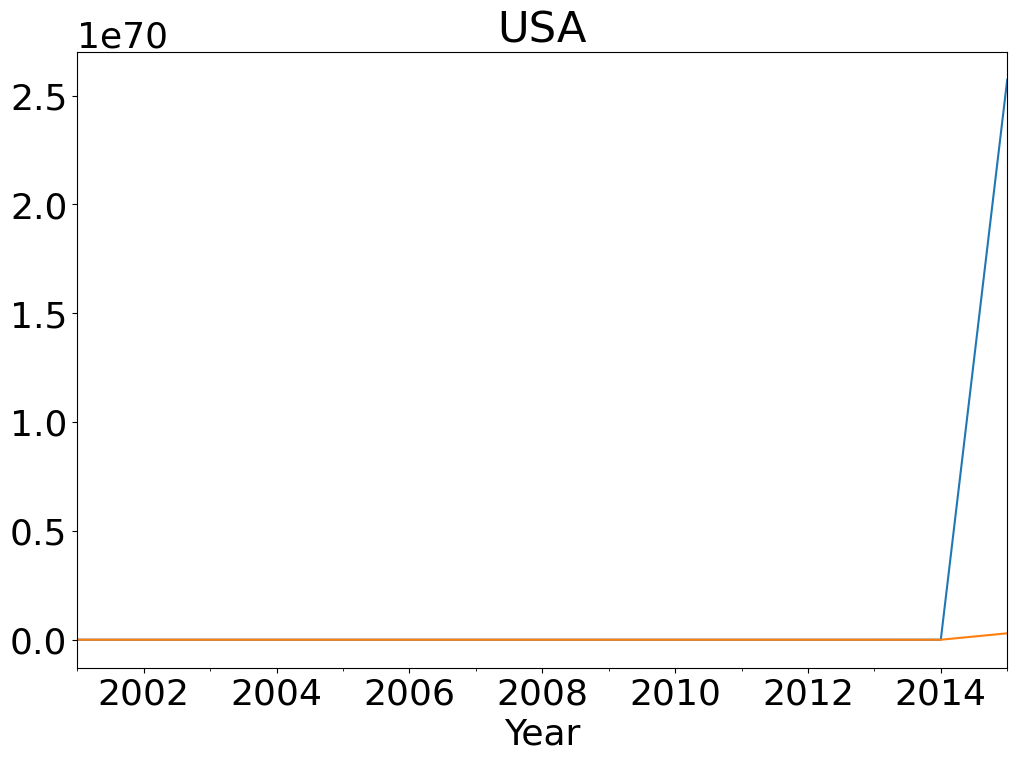

In [60]:
for country in countries:
    fig, ax = plt.subplots(figsize = (12,8))

    plot_data[y_var + ["Predictor"]].loc[country].cumprod().plot.line(ax = ax, legend = False)
    
    ax.set_title(country)
    plt.plot()


5. Repeat questions 1 through 4 using 2 year lags and differences instead of 5 year lags and differences.

In [99]:
oecd_countries = ["AUS", "AUT", "BEL", "CAN", "CHL", "COL", "CRI", "CZE", "DNK", "EST", "FIN", "FRA",
                  "DEU", "GRC", "HUN", "ISL", "IRL", "ISR", "ITA", "JPN", "LVA", "LTU", "LUX", "MEX",
                  "NLD", "NZL", "NOR", "POL", "PRT", "SVK", "SVN", "KOR", "ESP", "SWE", "CHE", "TUR",
                  "GBR", "USA"]

years = np.array(sorted(list(set(data.index.get_level_values("Year")))))
years = pd.date_range(years[0], years[-2], freq = "AS")
countries = sorted(list(set(data.index.get_level_values("ISO_Code"))))
index_names = list(data.index.names)
multi_index = pd.MultiIndex.from_product(
    [countries, years[:-1]], names = data.index.names)
data = data.reindex(multi_index)
data = data.loc[oecd_countries]


data

EFW  Size of Government  \
ISO_Code Year                                       
AUS      2002-01-01  8.038229            6.782763   
         2003-01-01  8.058187            6.775541   
         2004-01-01  8.025927            6.749928   
         2005-01-01  8.188706            6.940642   
         2006-01-01  8.250717            7.250945   
...                       ...                 ...   
USA      2009-01-01  7.965853            7.147290   
         2010-01-01  7.972577            7.108888   
         2011-01-01  7.906265            7.260760   
         2012-01-01  8.012288            7.565472   
         2013-01-01  7.900998            7.097752   

                     Legal System & Property Rights  Sound Money  \
ISO_Code Year                                                      
AUS      2002-01-01                        8.380055     9.208949   
         2003-01-01                        8.276520     9.275518   
         2004-01-01                        8.137131     9.355160   
         2005-01-01                        8.479582     9.440071   
         2006-01-01                        8.426544     9.462993   
...                                             ...          ...   
USA      2009-01-01                        7.188374     9.604751   
         2010-01-01                        7.143095     9.678239   
         2011-01-01                        6.957723     9.305630   
         2012-01-01                        7.016540     9.323542   
         2013-01-01                        6.974508     9.420297   

                     Freedom to trade internationally  Regulation  \
ISO_Code Year                                                       
AUS      2002-01-01                          7.591834    8.227544   
         2003-01-01                          7.622919    8.340436   
         2004-01-01                          7.489206    8.398208   
         2005-01-01                          7.481926    8.601310   
         2006-01-01                          7.504991    8.608115   
...                                               ...         ...   
USA      2009-01-01                          7.723552    8.165299   
         2010-01-01                          7.720760    8.211905   
         2011-01-01                          7.711284    8.295927   
         2012-01-01                          7.699527    8.456360   
         2013-01-01                          7.374713    8.637721   

                     RGDP Per Capita  RGDP Per Capita Lag  
ISO_Code Year                                              
AUS      2002-01-01          40792.0              39673.0  
         2003-01-01          41544.0              40792.0  
         2004-01-01          42711.0              41544.0  
         2005-01-01          43501.0              42711.0  
         2006-01-01          44001.0              43501.0  
...                              ...                  ...  
USA      2009-01-01          48453.0              50276.0  
         2010-01-01          49267.0              48453.0  
         2011-01-01          49675.0              49267.0  
         2012-01-01          50394.0              49675.0  
         2013-01-01          50863.0              50394.0  

[456 rows x 8 columns]

In [106]:
data["RGDP Per Capita Lag"] = data.groupby("ISO_Code")["RGDP Per Capita"].shift(2)

In [107]:
data = data.dropna(axis=0)
data

EFW  Size of Government  \
ISO_Code Year                                       
AUS      2005-01-01  8.188706            6.940642   
         2006-01-01  8.250717            7.250945   
         2007-01-01  8.283626            7.319103   
         2008-01-01  8.191143            7.276482   
         2009-01-01  8.089433            6.736643   
...                       ...                 ...   
USA      2009-01-01  7.965853            7.147290   
         2010-01-01  7.972577            7.108888   
         2011-01-01  7.906265            7.260760   
         2012-01-01  8.012288            7.565472   
         2013-01-01  7.900998            7.097752   

                     Legal System & Property Rights  Sound Money  \
ISO_Code Year                                                      
AUS      2005-01-01                        8.479582     9.440071   
         2006-01-01                        8.426544     9.462993   
         2007-01-01                        8.410772     9.501964   
         2008-01-01                        8.177173     9.425733   
         2009-01-01                        8.108773     9.623726   
...                                             ...          ...   
USA      2009-01-01                        7.188374     9.604751   
         2010-01-01                        7.143095     9.678239   
         2011-01-01                        6.957723     9.305630   
         2012-01-01                        7.016540     9.323542   
         2013-01-01                        6.974508     9.420297   

                     Freedom to trade internationally  Regulation  \
ISO_Code Year                                                       
AUS      2005-01-01                          7.481926    8.601310   
         2006-01-01                          7.504991    8.608115   
         2007-01-01                          7.542793    8.643500   
         2008-01-01                          7.472368    8.603961   
         2009-01-01                          7.514360    8.463662   
...                                               ...         ...   
USA      2009-01-01                          7.723552    8.165299   
         2010-01-01                          7.720760    8.211905   
         2011-01-01                          7.711284    8.295927   
         2012-01-01                          7.699527    8.456360   
         2013-01-01                          7.374713    8.637721   

                     RGDP Per Capita  RGDP Per Capita Lag  
ISO_Code Year                                              
AUS      2005-01-01          43501.0              41544.0  
         2006-01-01          44001.0              42711.0  
         2007-01-01          45145.0              43501.0  
         2008-01-01          45260.0              44001.0  
         2009-01-01          45247.0              45145.0  
...                              ...                  ...  
USA      2009-01-01          48453.0              50902.0  
         2010-01-01          49267.0              50276.0  
         2011-01-01          49675.0              48453.0  
         2012-01-01          50394.0              49267.0  
         2013-01-01          50863.0              49675.0  

[342 rows x 8 columns]

In [108]:
y_var = ["RGDP Per Capita"]
x_vars = ["Size of Government", 
          "Legal System & Property Rights", 
          "Sound Money",
          "Freedom to trade internationally",
          "Regulation"]
reg_vars = y_var + x_vars
reg_data = data[reg_vars]
reg_data.corr().round(2)

,RGDP Per Capita,Size of Government,Legal System & Property Rights,Sound Money,Freedom to trade internationally,Regulation
RGDP Per Capita,1.00,-0.31,0.75,0.35,0.08,0.40
Size of Government,-0.31,1.00,-0.32,-0.30,-0.25,0.00
Legal System & Property Rights,0.75,-0.32,1.00,0.30,0.34,0.54
Sound Money,0.35,-0.30,0.30,1.00,0.43,0.31
Freedom to trade internationally,0.08,-0.25,0.34,0.43,1.00,0.23
Regulation,0.40,0.00,0.54,0.31,0.23,1.00


In [109]:
y = reg_data[y_var]
X = reg_data[x_vars]
X["Constant"] = 1
results = sm.OLS(y, X).fit()

In [110]:
predictor = results.predict()
reg_data[y_var[0] + " Predictor"] = predictor
reg_data

C:\Users\adamp\AppData\Local\Temp\ipykernel_2112\734817014.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reg_data[y_var[0] + " Predictor"] = predictor


RGDP Per Capita  Size of Government  \
ISO_Code Year                                              
AUS      2005-01-01          43501.0            6.940642   
         2006-01-01          44001.0            7.250945   
         2007-01-01          45145.0            7.319103   
         2008-01-01          45260.0            7.276482   
         2009-01-01          45247.0            6.736643   
...                              ...                 ...   
USA      2009-01-01          48453.0            7.147290   
         2010-01-01          49267.0            7.108888   
         2011-01-01          49675.0            7.260760   
         2012-01-01          50394.0            7.565472   
         2013-01-01          50863.0            7.097752   

                     Legal System & Property Rights  Sound Money  \
ISO_Code Year                                                      
AUS      2005-01-01                        8.479582     9.440071   
         2006-01-01                        8.426544     9.462993   
         2007-01-01                        8.410772     9.501964   
         2008-01-01                        8.177173     9.425733   
         2009-01-01                        8.108773     9.623726   
...                                             ...          ...   
USA      2009-01-01                        7.188374     9.604751   
         2010-01-01                        7.143095     9.678239   
         2011-01-01                        6.957723     9.305630   
         2012-01-01                        7.016540     9.323542   
         2013-01-01                        6.974508     9.420297   

                     Freedom to trade internationally  Regulation  \
ISO_Code Year                                                       
AUS      2005-01-01                          7.481926    8.601310   
         2006-01-01                          7.504991    8.608115   
         2007-01-01                          7.542793    8.643500   
         2008-01-01                          7.472368    8.603961   
         2009-01-01                          7.514360    8.463662   
...                                               ...         ...   
USA      2009-01-01                          7.723552    8.165299   
         2010-01-01                          7.720760    8.211905   
         2011-01-01                          7.711284    8.295927   
         2012-01-01                          7.699527    8.456360   
         2013-01-01                          7.374713    8.637721   

                     RGDP Per Capita Predictor  
ISO_Code Year                                   
AUS      2005-01-01               49344.616799  
         2006-01-01               48465.297727  
         2007-01-01               48109.510226  
         2008-01-01               46272.265048  
         2009-01-01               46813.596152  
...                                        ...  
USA      2009-01-01               36235.514088  
         2010-01-01               36225.939338  
         2011-01-01               32661.990145  
         2012-01-01               33039.121266  
         2013-01-01               36308.398323  

[342 rows x 7 columns]

In [111]:
y_hat = reg_data[y_var[0] + " Predictor"]
y_mean = reg_data[y_var[0]].mean()
y = reg_data[y_var[0]]
reg_data["Residuals"] = (y.sub(y_hat))
reg_data["Squared Explained"] = y_hat.sub(y_mean) ** 2
reg_data["Squared Residuals"] = (y.sub(y_hat)) ** 2
reg_data["Squared Totals"] = (y.sub(y_mean)) ** 2
reg_data

RGDP Per Capita  Size of Government  \
ISO_Code Year                                              
AUS      2005-01-01          43501.0            6.940642   
         2006-01-01          44001.0            7.250945   
         2007-01-01          45145.0            7.319103   
         2008-01-01          45260.0            7.276482   
         2009-01-01          45247.0            6.736643   
...                              ...                 ...   
USA      2009-01-01          48453.0            7.147290   
         2010-01-01          49267.0            7.108888   
         2011-01-01          49675.0            7.260760   
         2012-01-01          50394.0            7.565472   
         2013-01-01          50863.0            7.097752   

                     Legal System & Property Rights  Sound Money  \
ISO_Code Year                                                      
AUS      2005-01-01                        8.479582     9.440071   
         2006-01-01                        8.426544     9.462993   
         2007-01-01                        8.410772     9.501964   
         2008-01-01                        8.177173     9.425733   
         2009-01-01                        8.108773     9.623726   
...                                             ...          ...   
USA      2009-01-01                        7.188374     9.604751   
         2010-01-01                        7.143095     9.678239   
         2011-01-01                        6.957723     9.305630   
         2012-01-01                        7.016540     9.323542   
         2013-01-01                        6.974508     9.420297   

                     Freedom to trade internationally  Regulation  \
ISO_Code Year                                                       
AUS      2005-01-01                          7.481926    8.601310   
         2006-01-01                          7.504991    8.608115   
         2007-01-01                          7.542793    8.643500   
         2008-01-01                          7.472368    8.603961   
         2009-01-01                          7.514360    8.463662   
...                                               ...         ...   
USA      2009-01-01                          7.723552    8.165299   
         2010-01-01                          7.720760    8.211905   
         2011-01-01                          7.711284    8.295927   
         2012-01-01                          7.699527    8.456360   
         2013-01-01                          7.374713    8.637721   

                     RGDP Per Capita Predictor     Residuals  \
ISO_Code Year                                                  
AUS      2005-01-01               49344.616799  -5843.616799   
         2006-01-01               48465.297727  -4464.297727   
         2007-01-01               48109.510226  -2964.510226   
         2008-01-01               46272.265048  -1012.265048   
         2009-01-01               46813.596152  -1566.596152   
...                                        ...           ...   
USA      2009-01-01               36235.514088  12217.485912   
         2010-01-01               36225.939338  13041.060662   
         2011-01-01               32661.990145  17013.009855   
         2012-01-01               33039.121266  17354.878734   
         2013-01-01               36308.398323  14554.601677   

                     Squared Explained  Squared Residuals  Squared Totals  
ISO_Code Year                                                              
AUS      2005-01-01       2.517981e+08       3.414786e+07    1.004912e+08  
         2006-01-01       2.246649e+08       1.992995e+07    1.107657e+08  
         2007-01-01       2.141258e+08       8.788321e+06    1.361546e+08  
         2008-01-01       1.637324e+08       1.024681e+06    1.388516e+08  
         2009-01-01       1.778789e+08       2.454224e+06    1.385454e+08  
...                                ...                ...             ...  
USA      2009-01

In [112]:
SSR = reg_data["Squared Explained"].sum()
SSE = reg_data["Squared Residuals"].sum()
SST = reg_data["Squared Totals"].sum()
SSR,SSE,SST

(44919154038.141235, 25621835817.066433, 70540989855.2076)

In [113]:
n = results.nobs
k = len(results.params)
estimator_variance = SSE / (n - k)
n, k, estimator_variance

(342.0, 6, 76255463.74126914)

In [114]:
cov_matrix = results.cov_params()
cov_matrix

,Size of Government,Legal System & Property Rights,Sound Money,Freedom to trade internationally,Regulation,Constant
Size of Government,2.980410e+05,91138.398688,1.082611e+05,5.072254e+04,-114742.700118,-3.055373e+06
Legal System & Property Rights,9.113840e+04,262153.097119,3.639039e+03,-1.027989e+05,-208696.313076,-9.942734e+04
Sound Money,1.082611e+05,3639.039297,6.986259e+05,-3.079551e+05,-146695.191936,-3.639859e+06
Freedom to trade internationally,5.072254e+04,-102798.922924,-3.079551e+05,1.248916e+06,-15346.661865,-6.487855e+06
Regulation,-1.147427e+05,-208696.313076,-1.466952e+05,-1.534666e+04,602210.512305,-8.111377e+05
Constant,-3.055373e+06,-99427.335405,-3.639859e+06,-6.487855e+06,-811137.667339,1.109906e+08


In [115]:
results.params

Size of Government                  -993.705361
Legal System & Property Rights      9095.982730
Sound Money                         4793.559345
Freedom to trade internationally   -8526.667701
Regulation                          -256.684237
Constant                            -136.386894
dtype: float64

In [116]:
parameters = {}
for x_var in x_vars:
    parameters[x_var] = {}
    parameters[x_var]["Beta"] = results.params[x_var]
    parameters[x_var]["Standard Error"] = cov_matrix.loc[x_var, x_var] ** (1/2)
    parameters[x_var]["t-stats"] = parameters[x_var]["Beta"] / parameters[x_var]["Standard Error"] 
parameters = pd.DataFrame(parameters).T
parameters

,Beta,Standard Error,t-stats
Size of Government,-993.705361,545.931275,-1.820202
Legal System & Property Rights,9095.982730,512.008884,17.765283
Sound Money,4793.559345,835.838419,5.735031
Freedom to trade internationally,-8526.667701,1117.549083,-7.629793
Regulation,-256.684237,776.022237,-0.330769


In [117]:
r2 = SSR/SST
r2

0.636780886266868

In [118]:
r2_adjusted = 1 - (SSE / (n - k)) / (SST / (n - 1))
r2_adjusted

0.6313758399315526

In [119]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        RGDP Per Capita   R-squared:                       0.637
Model:                            OLS   Adj. R-squared:                  0.631
Method:                 Least Squares   F-statistic:                     117.8
Date:                Sun, 23 Apr 2023   Prob (F-statistic):           1.09e-71
Time:                        22:28:36   Log-Likelihood:                -3585.8
No. Observations:                 342   AIC:                             7184.
Df Residuals:                     336   BIC:                             7207.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Size of Government                -993.7054    545.931     -1.820      0.070   -2067.579      80.168
Legal System & Property Rights    9095.9827    512.009     17.765      0.000    8088.836    1.01e+04
Sound Money                       4793.5593    835.838      5.735      0.000    3149.424    6437.695
Freedom to trade internationally -8526.6677   1117.549     -7.630      0.000   -1.07e+04   -6328.393
Regulation                        -256.6842    776.022     -0.331      0.741   -1783.158    1269.790
Constant                          -136.3869   1.05e+04     -0.013      0.990   -2.09e+04    2.06e+04
==============================================================================
Omnibus:                       69.646   Durbin-Watson:                   0.322
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              121.064
Skew:                           1.148   Prob(JB):                     5.14e-27
Kurtosis:                       4.796   Cond. No.                         384.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

(array([-20000., -10000.,      0.,  10000.,  20000.,  30000.,  40000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

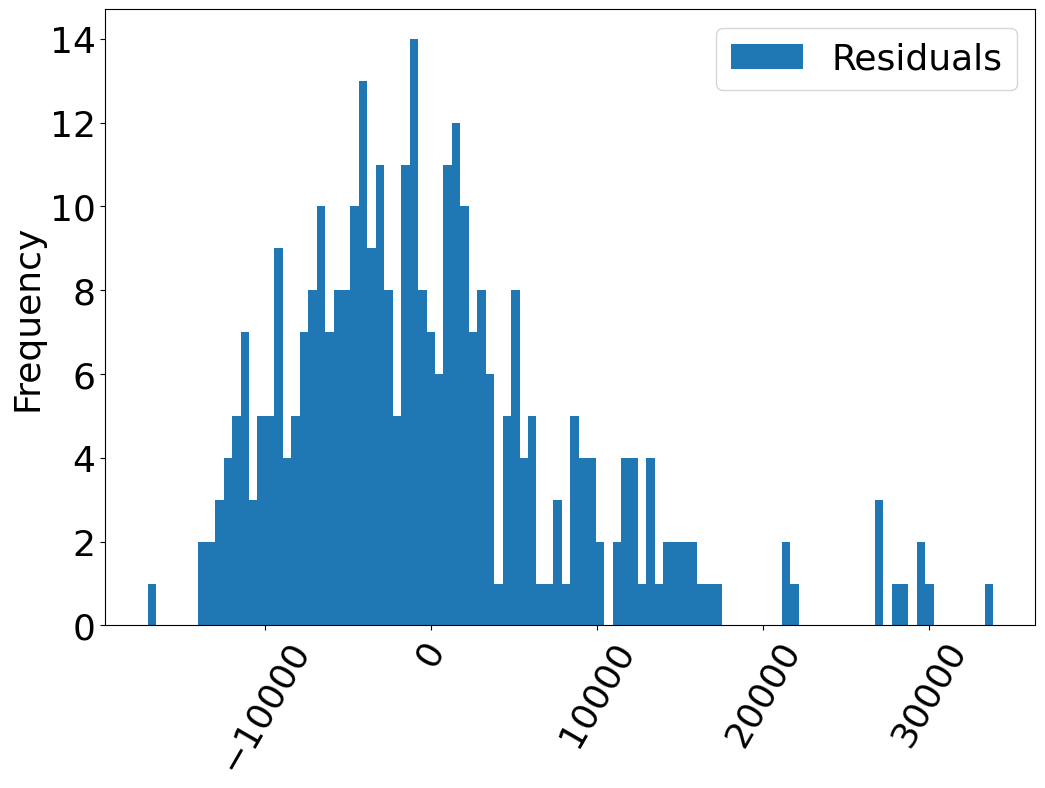

In [120]:
import matplotlib.pyplot as plt
plt.rcParams.update({"font.size":26})
fig, ax = plt.subplots(figsize = (12,8))
reg_data[["Residuals"]].plot.hist(bins = 100, ax = ax)
plt.xticks(rotation=60)

This chart of the residuals is very similar to the 5 year lag chart. The range of the 2 year lag is a bit smaller. This suggests that the range may have been a bit more accurate.

In [121]:
y_var = ["RGDP Per Capita"]
x_vars = ["Size of Government", 
          "Legal System & Property Rights", 
          "Sound Money",
          "Freedom to trade internationally",
          "Regulation"]
#           "RGDP Per Capita Lag"]

y = reg_data[y_var]
X = reg_data[x_vars]
# X["Constant"] = 1
results = sm.OLS(y, X).fit()
reg_data["Predictor"] = results.predict()

In [122]:
betaEstimates = results.params
tStats = results.tvalues
pValues = results.pvalues
stdErrors = results.bse

resultsDict = {"Beta Estimates" : betaEstimates,
              "t-stats":tStats,
              "p-values":pValues,
              "Standard Errors":stdErrors}
resultsDF = pd.DataFrame(resultsDict)
resultsDF.round(3)

,Beta Estimates,t-stats,p-values,Standard Errors
Size of Government,-997.460,-2.160,0.031,461.841
Legal System & Property Rights,9095.861,17.794,0.000,511.162
Sound Money,4789.087,6.302,0.000,759.961
Freedom to trade internationally,-8534.640,-9.165,0.000,931.179
Regulation,-257.681,-0.334,0.738,771.047


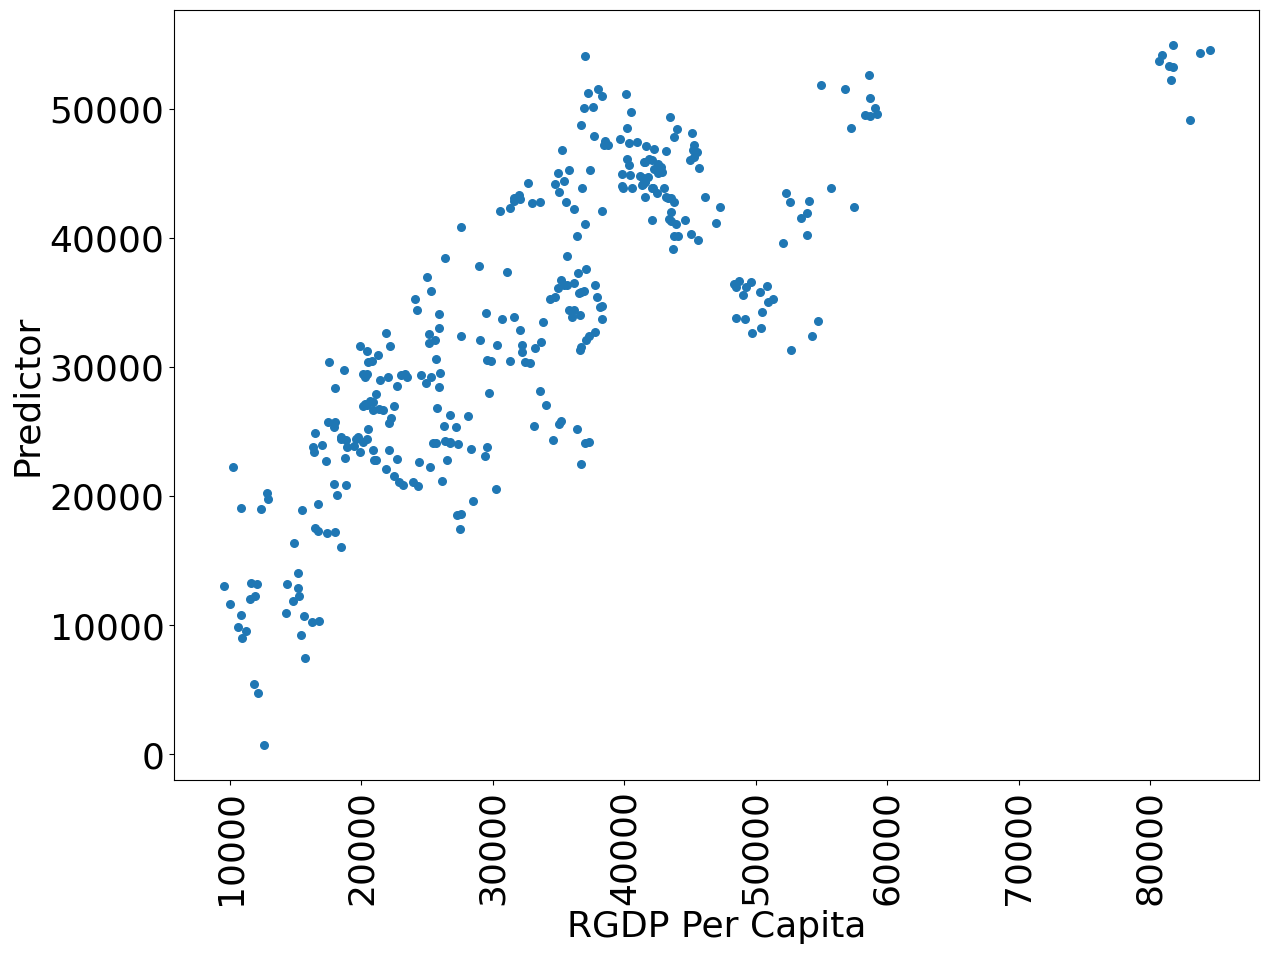

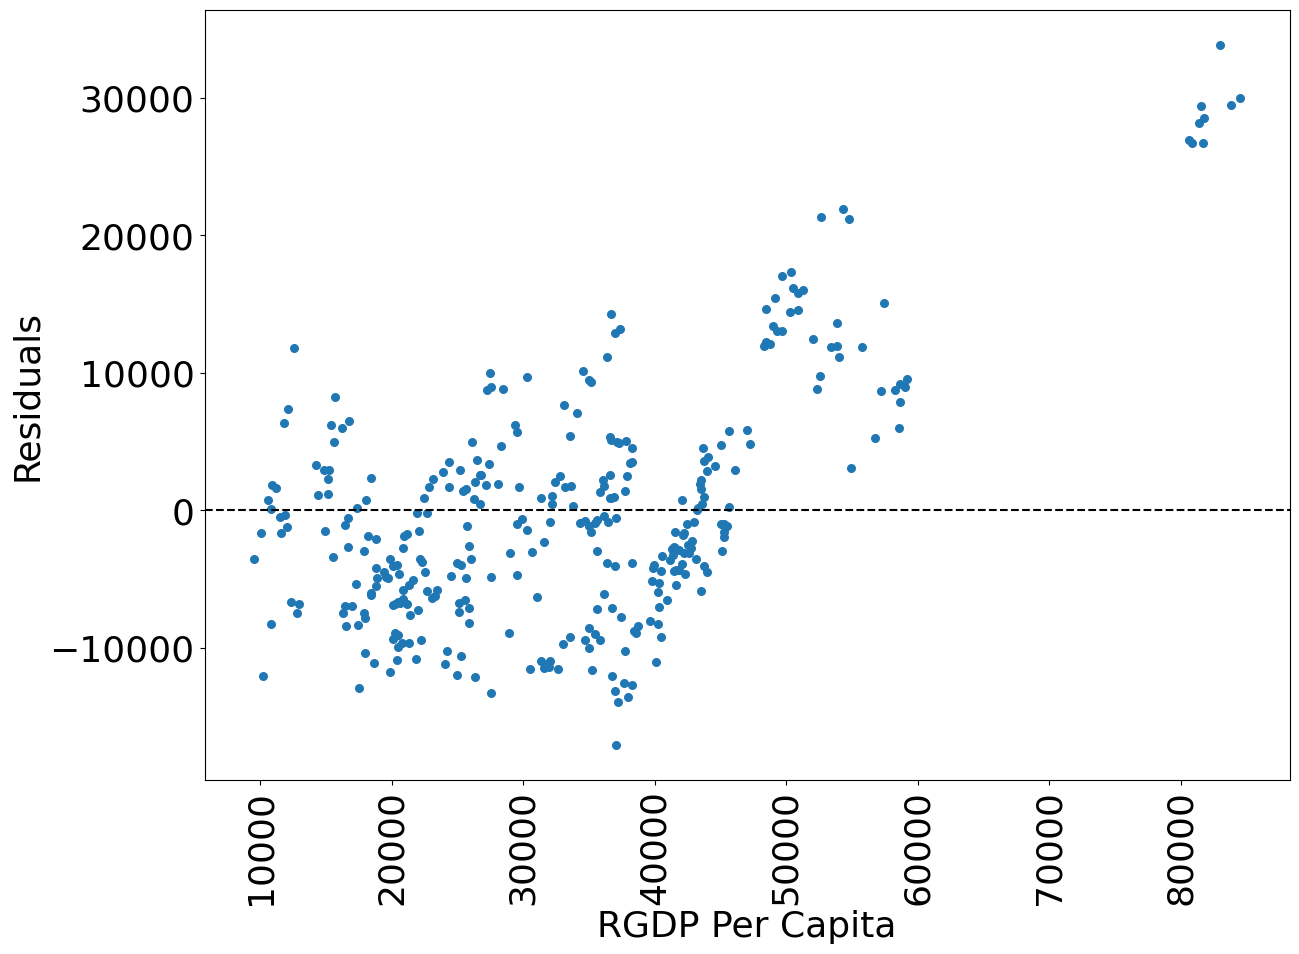

In [123]:
fig, ax = plt.subplots(figsize = (14,10))
reg_data.plot.scatter(x = y_var[0],
                 y = "Predictor", 
                  s = 30, ax = ax)
plt.xticks(rotation=90)
plt.show()
plt.close()

fig, ax = plt.subplots(figsize = (14,10))
reg_data.plot.scatter(x = y_var[0],
                 y = "Residuals", 
                  s = 30, ax = ax)
ax.axhline(0, ls = "--", color = "k")
plt.xticks(rotation=90)
plt.show()
plt.close()

In [124]:
countries = reg_data.groupby("ISO_Code").mean().index
plot_data = reg_data[y_var + ["Predictor"]]
for key in plot_data:
    plot_data[key] = plot_data[key] + 1

plot_data

C:\Users\adamp\AppData\Local\Temp\ipykernel_2112\2487526735.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_data[key] = plot_data[key] + 1


RGDP Per Capita     Predictor
ISO_Code Year                                     
AUS      2005-01-01          43502.0  49344.464472
         2006-01-01          44002.0  48463.693661
         2007-01-01          45146.0  48107.141245
         2008-01-01          45261.0  46271.026444
         2009-01-01          45248.0  46813.312230
...                              ...           ...
USA      2009-01-01          48454.0  36232.515347
         2010-01-01          49268.0  36222.737427
         2011-01-01          49676.0  32659.899051
         2012-01-01          50395.0  33035.732649
         2013-01-01          50864.0  36308.746899

[342 rows x 2 columns]

C:\Users\adamp\AppData\Local\Temp\ipykernel_2112\799958213.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize = (12,8))


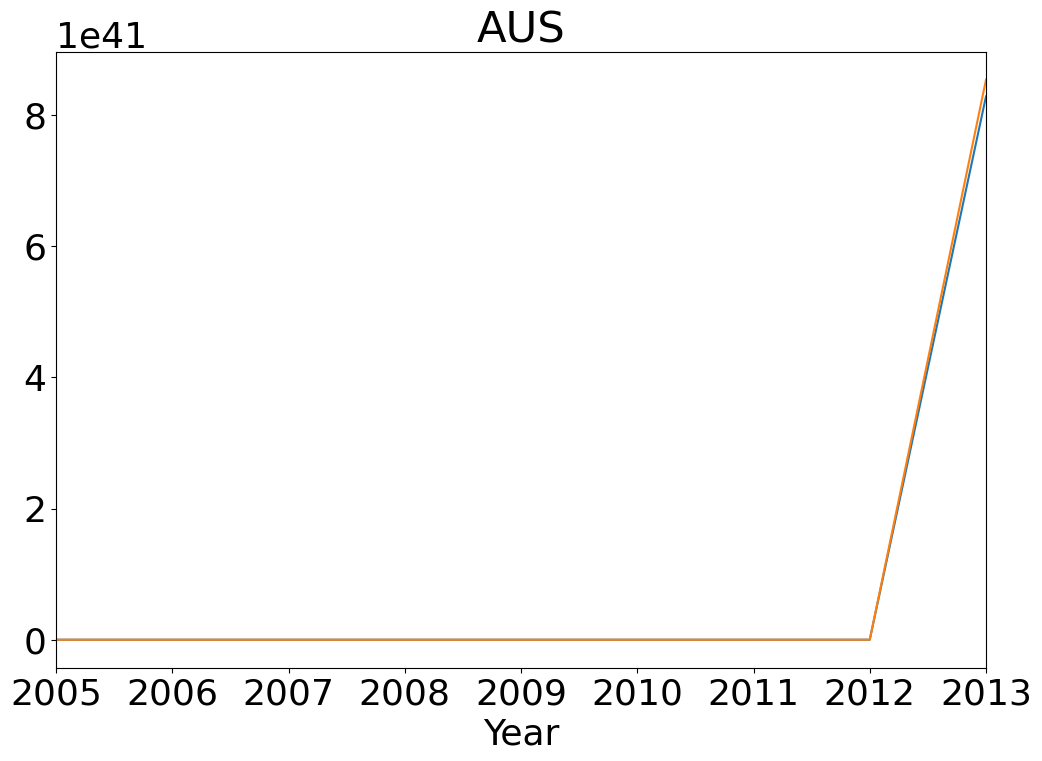

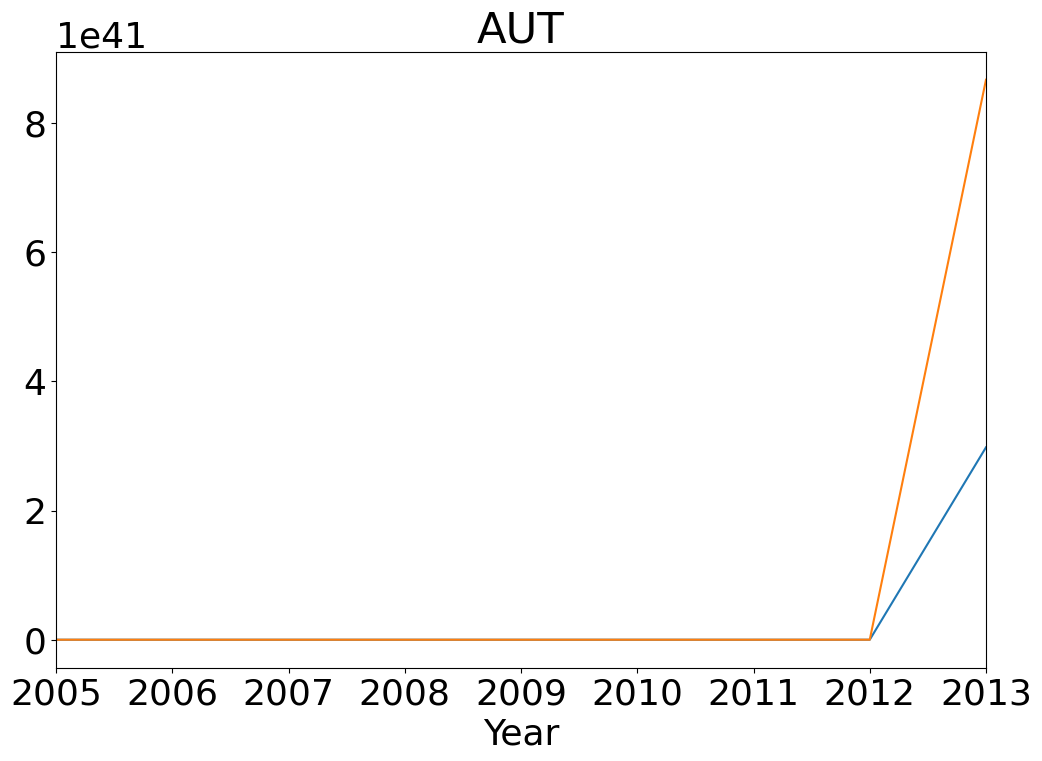

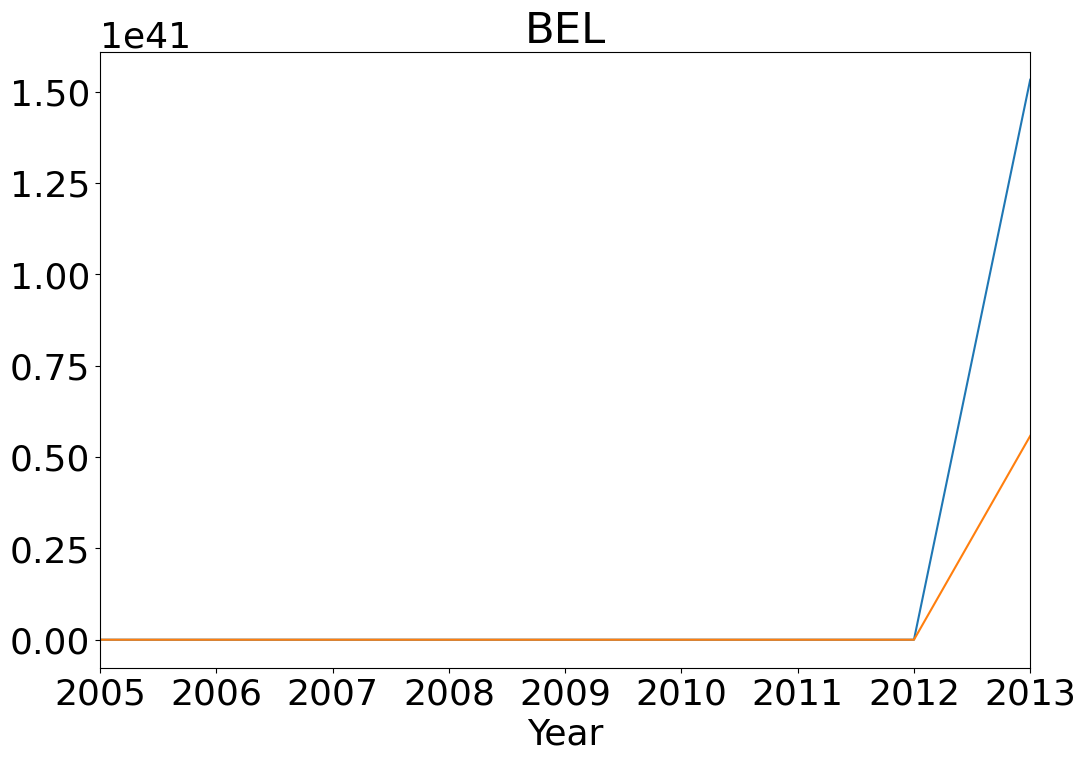

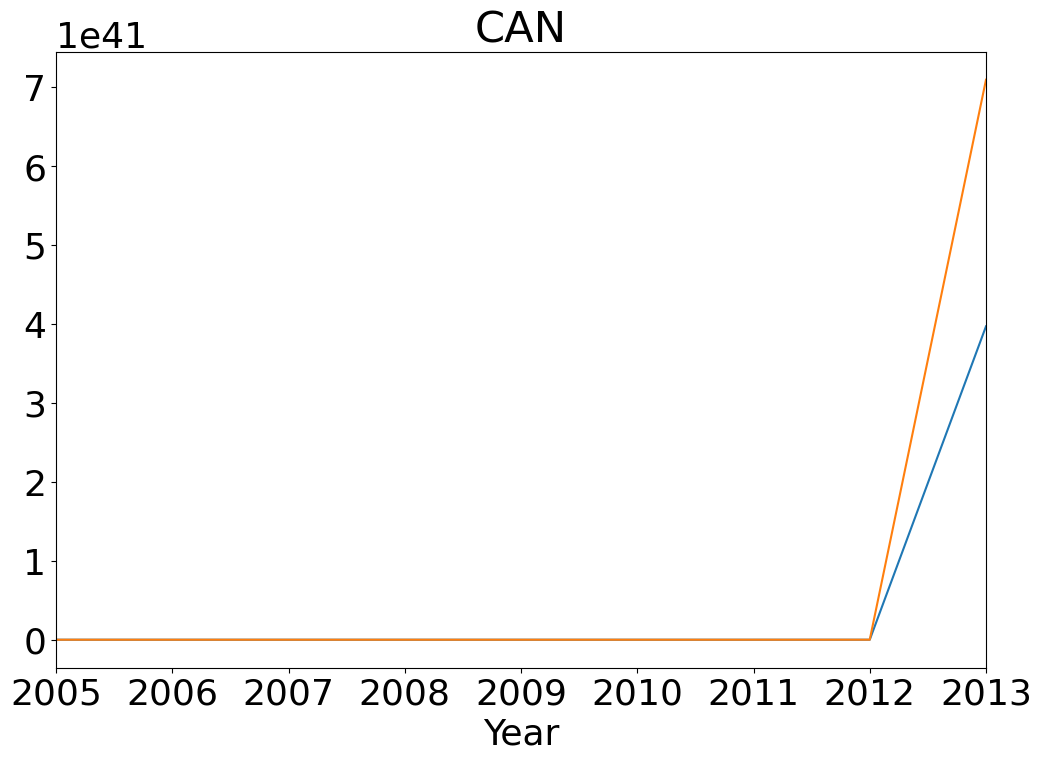

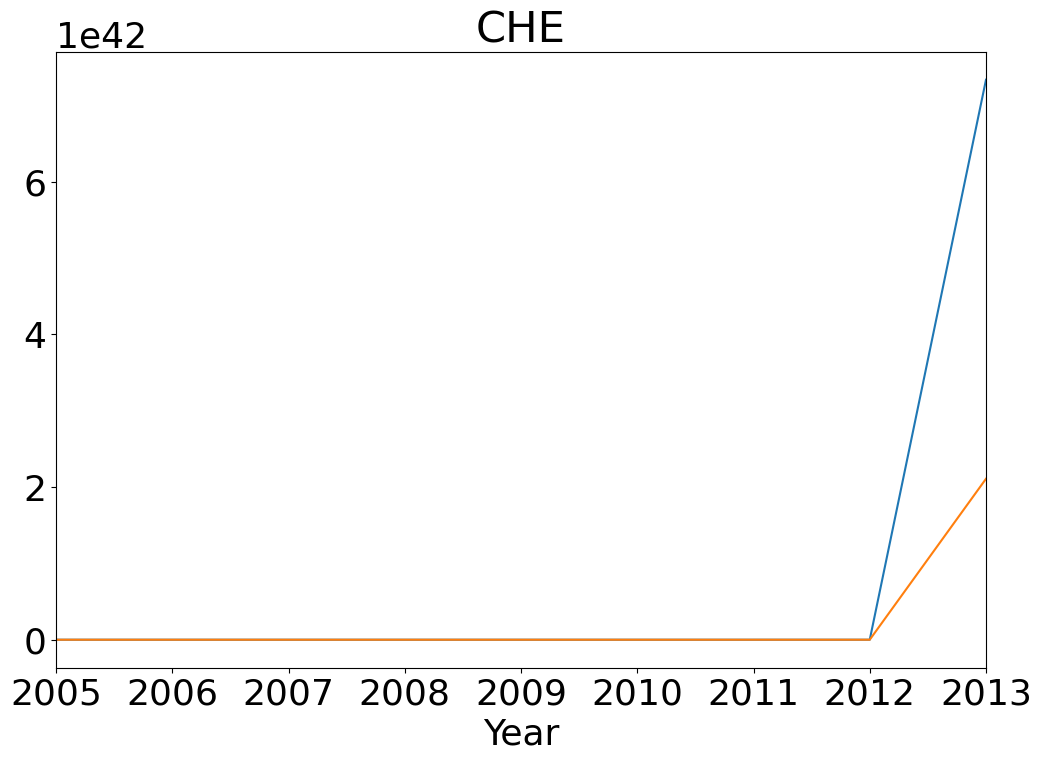

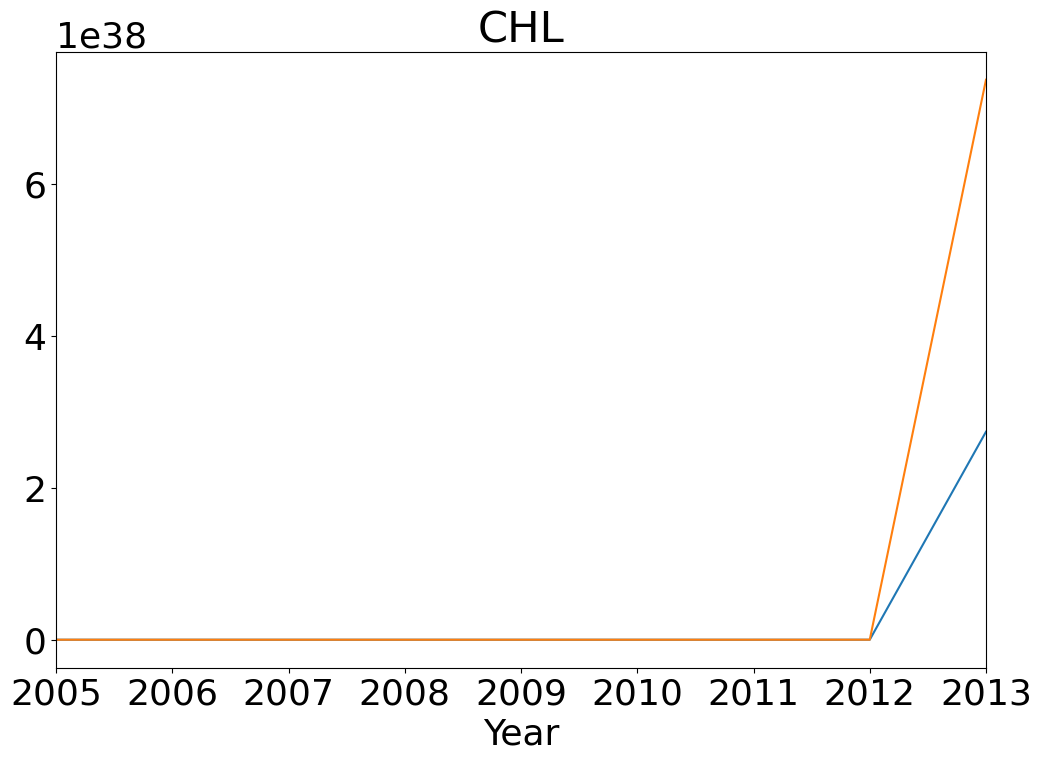

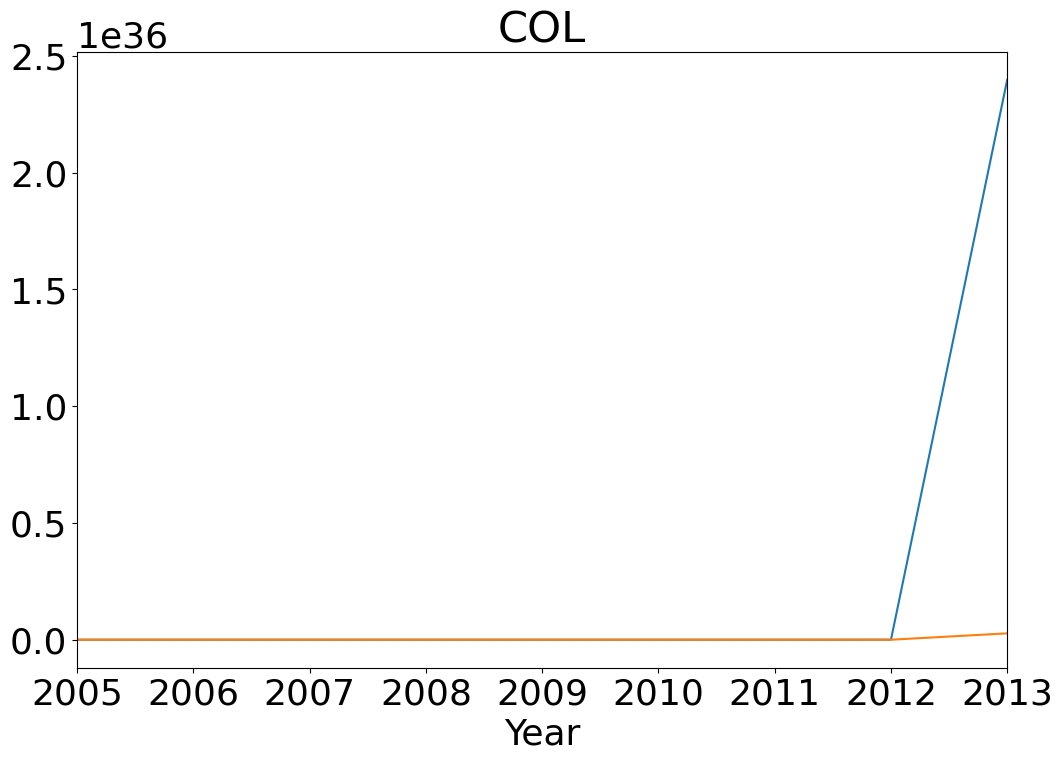

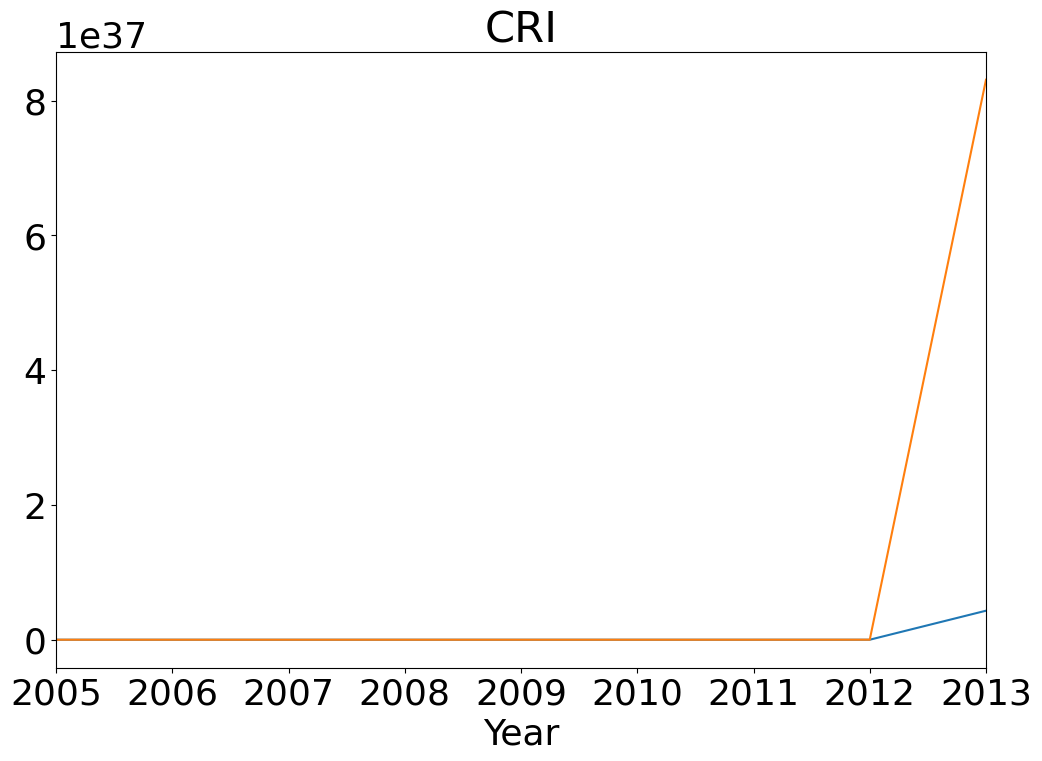

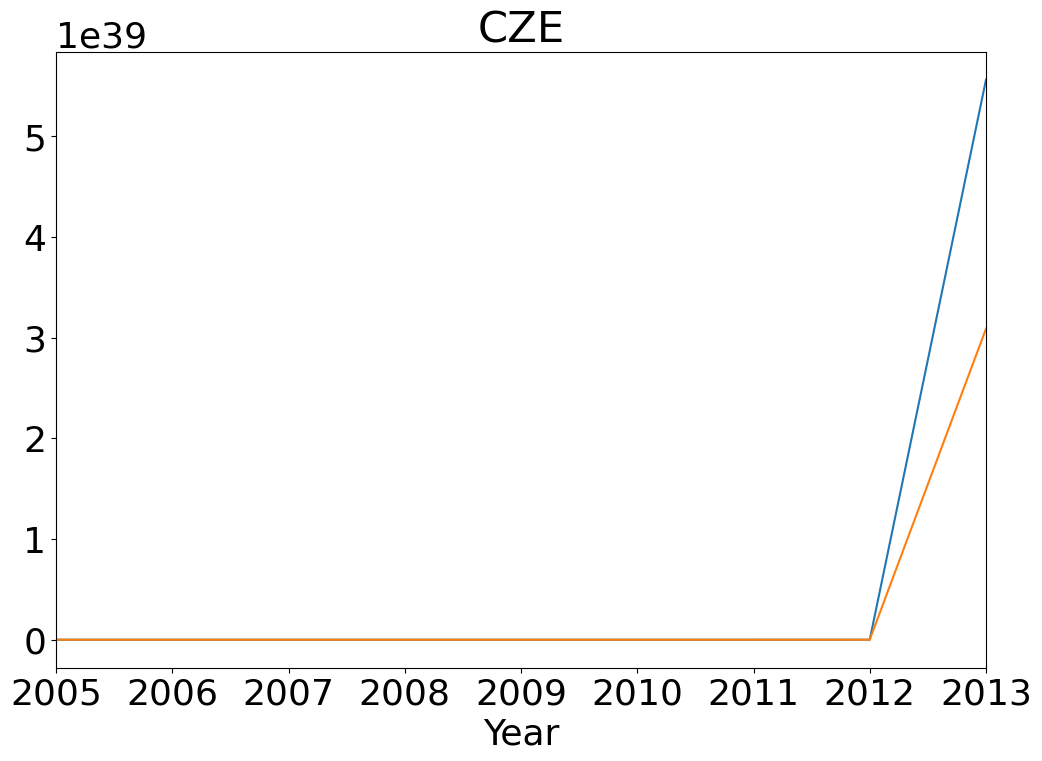

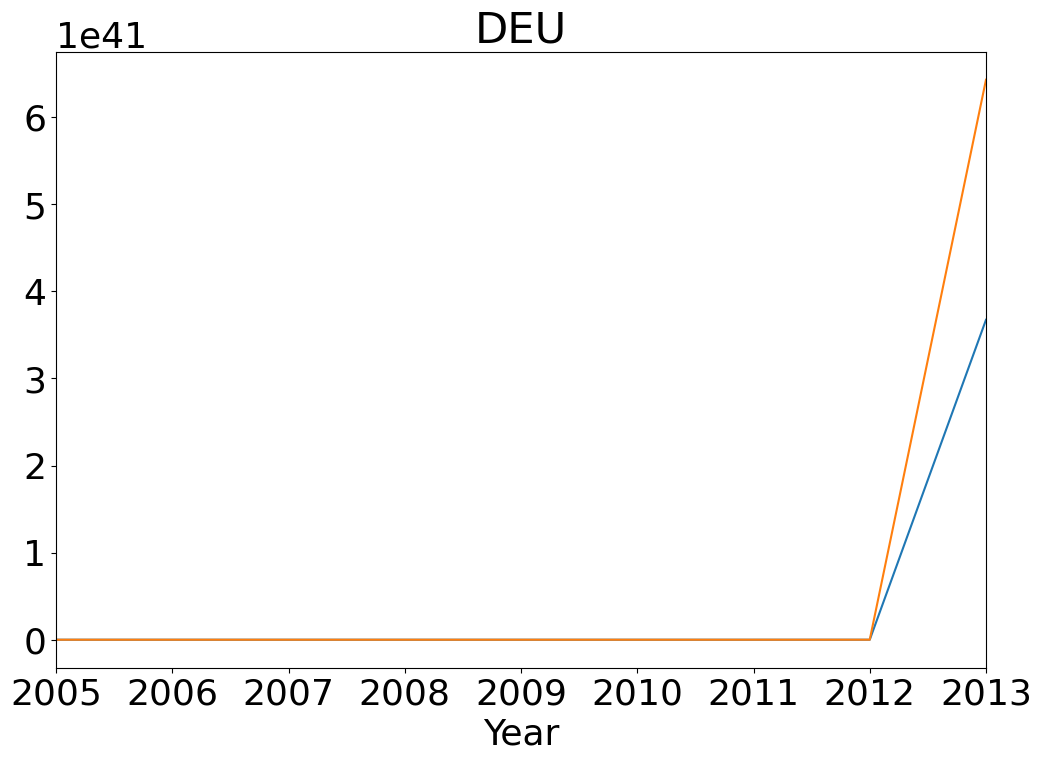

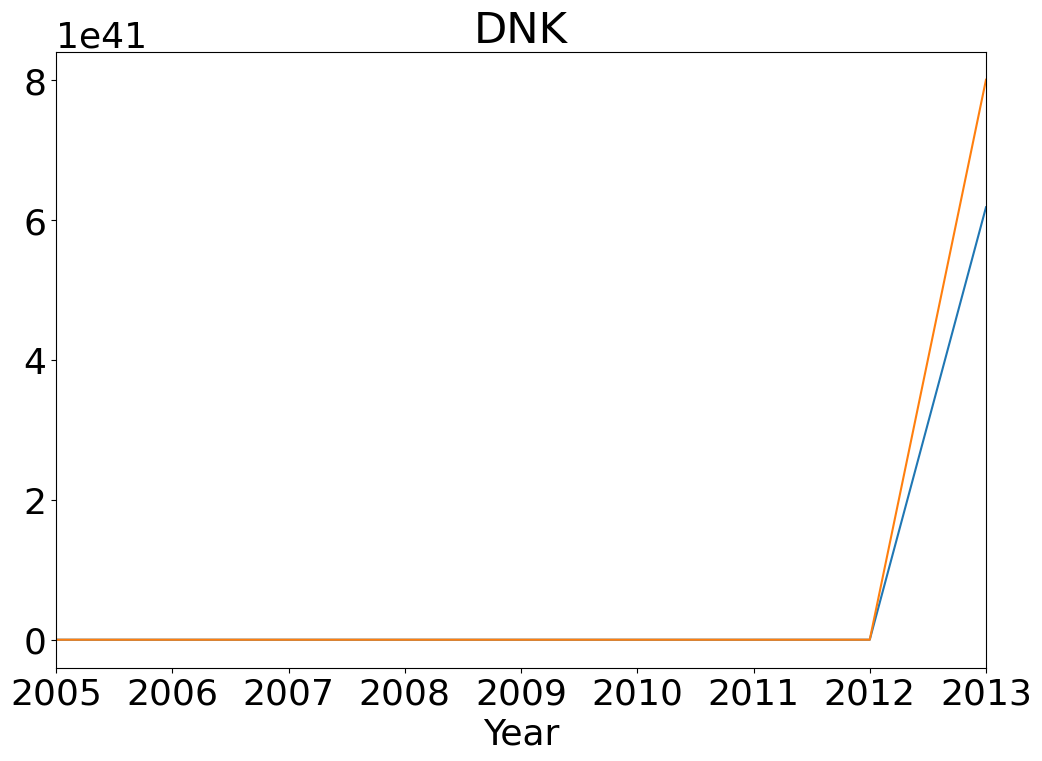

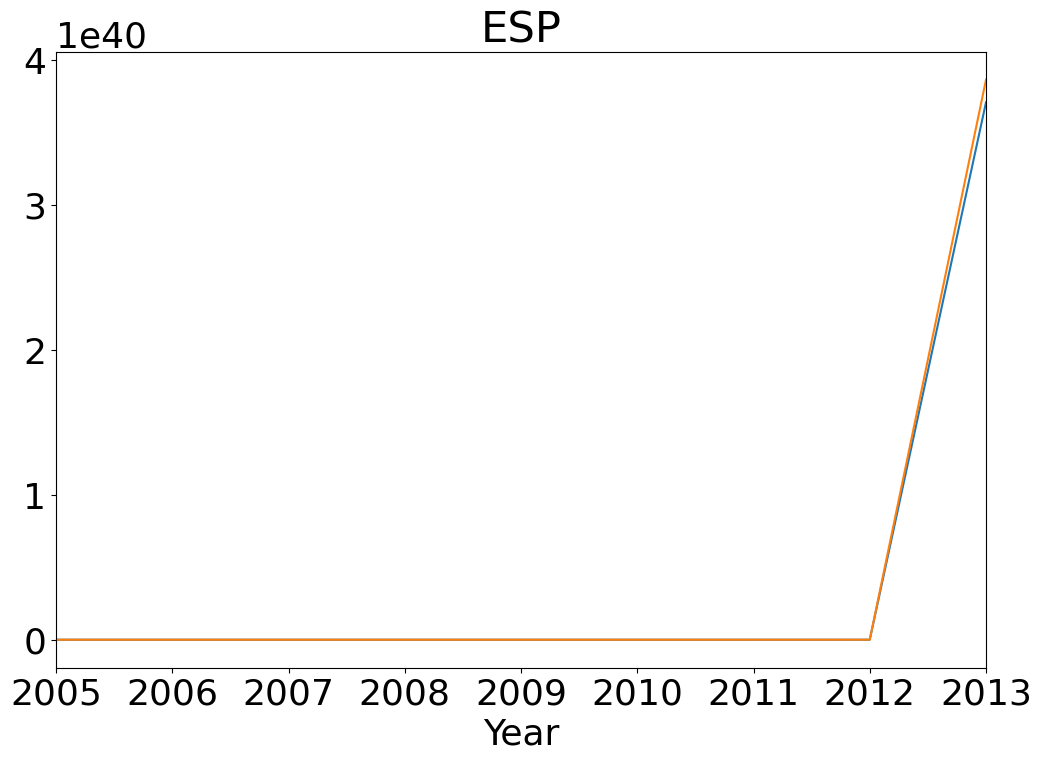

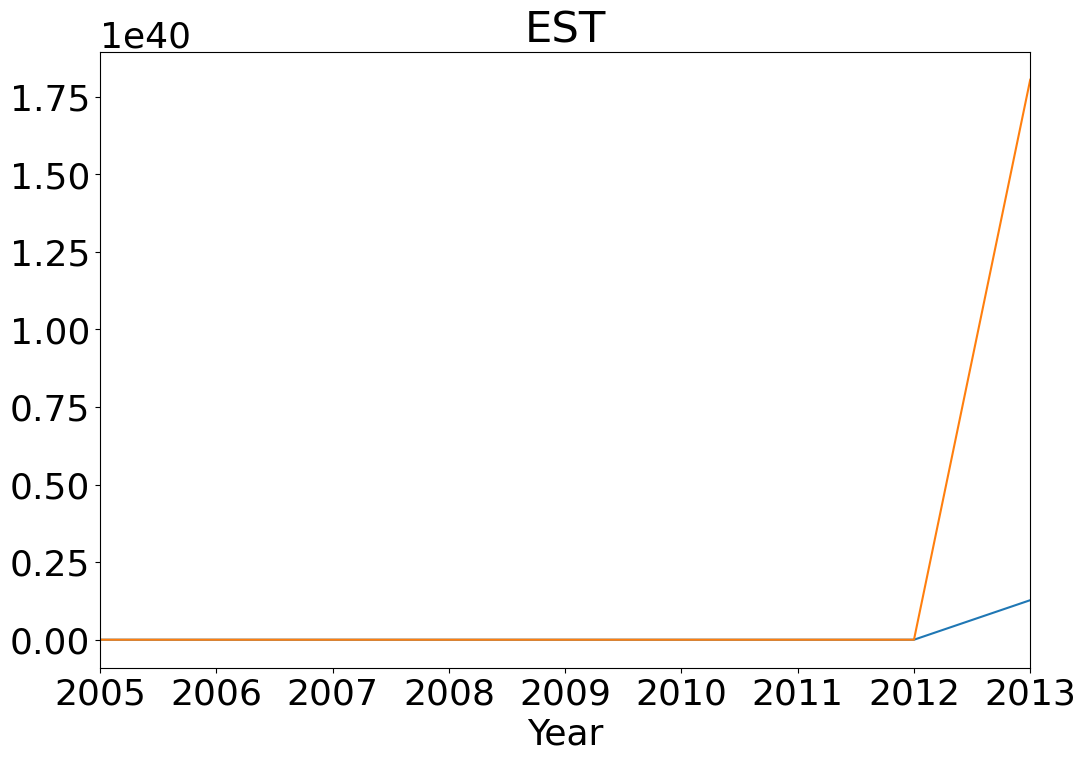

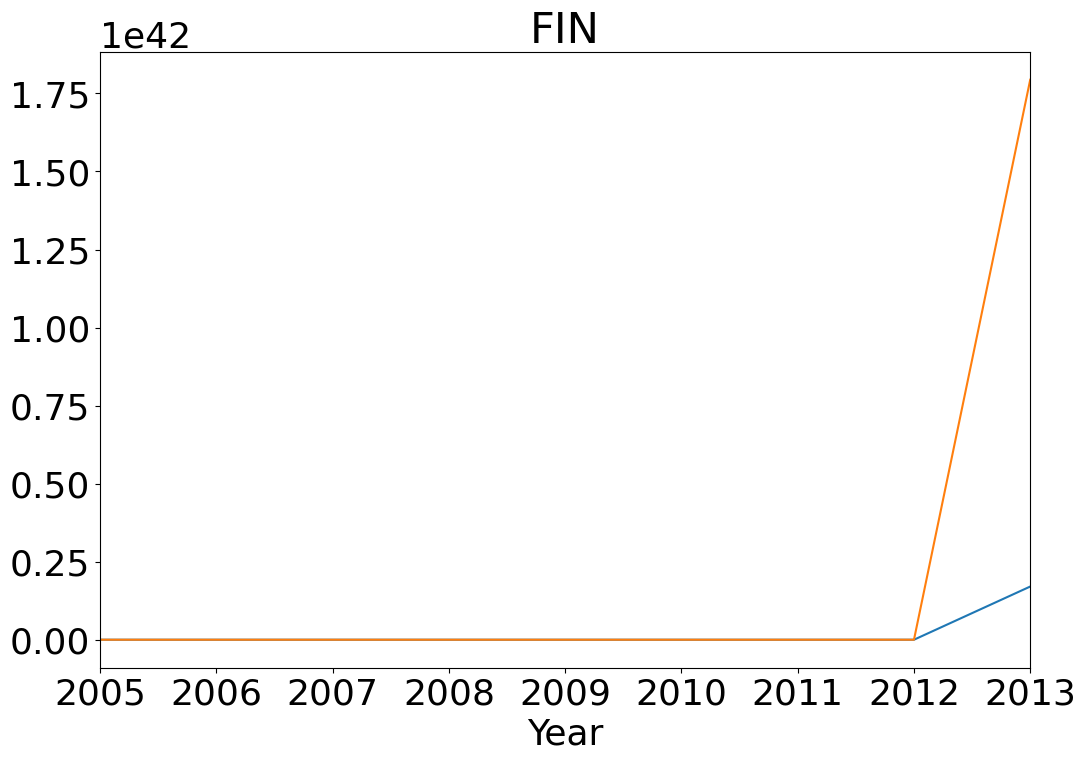

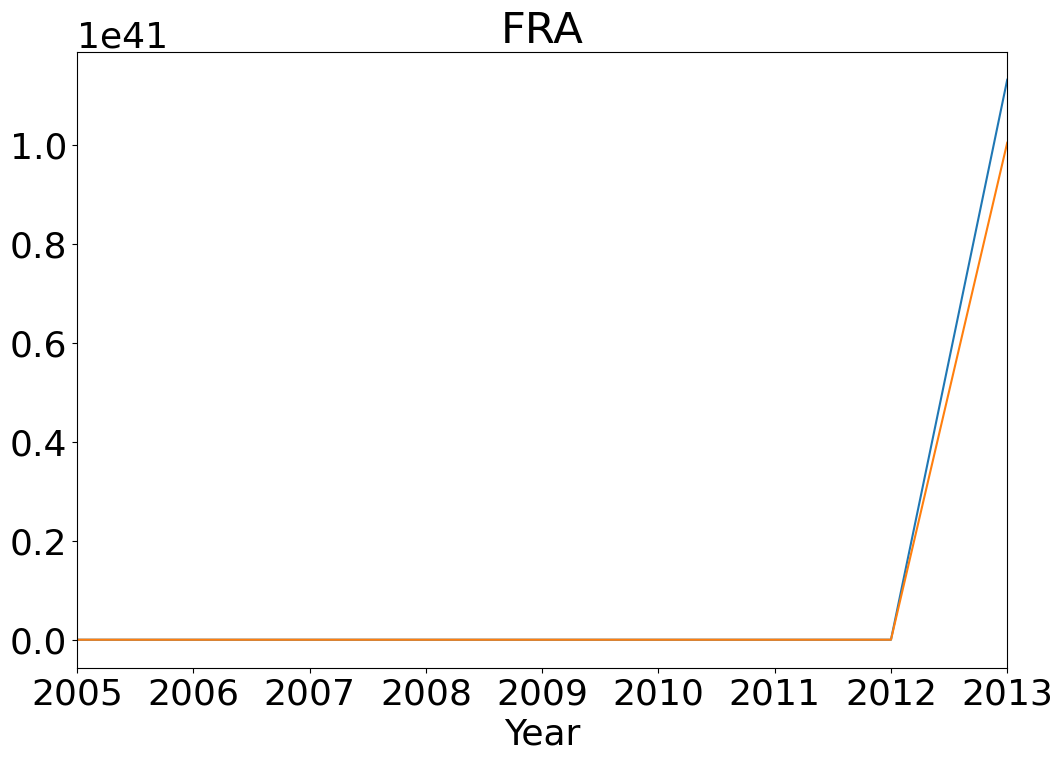

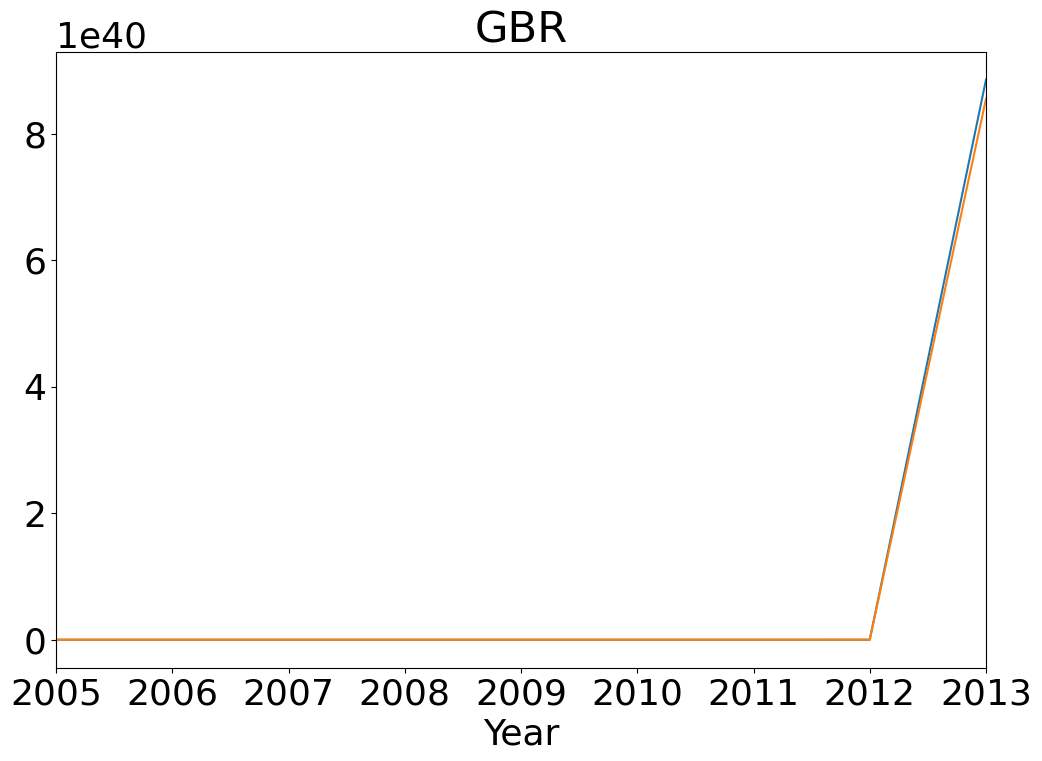

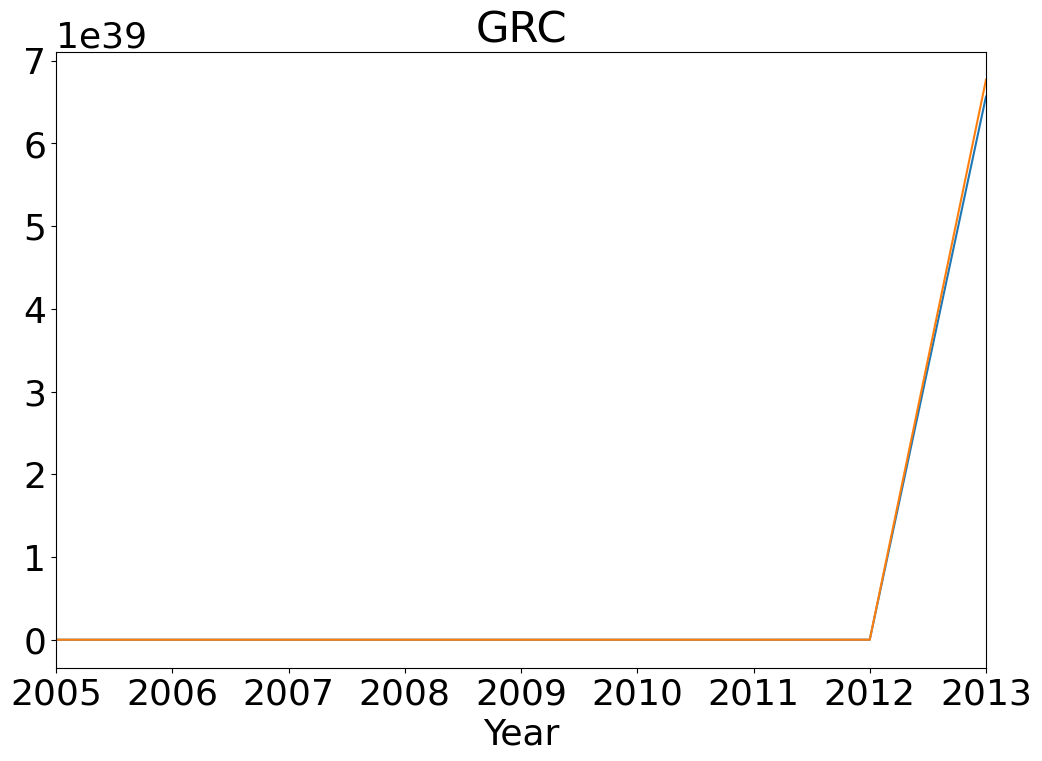

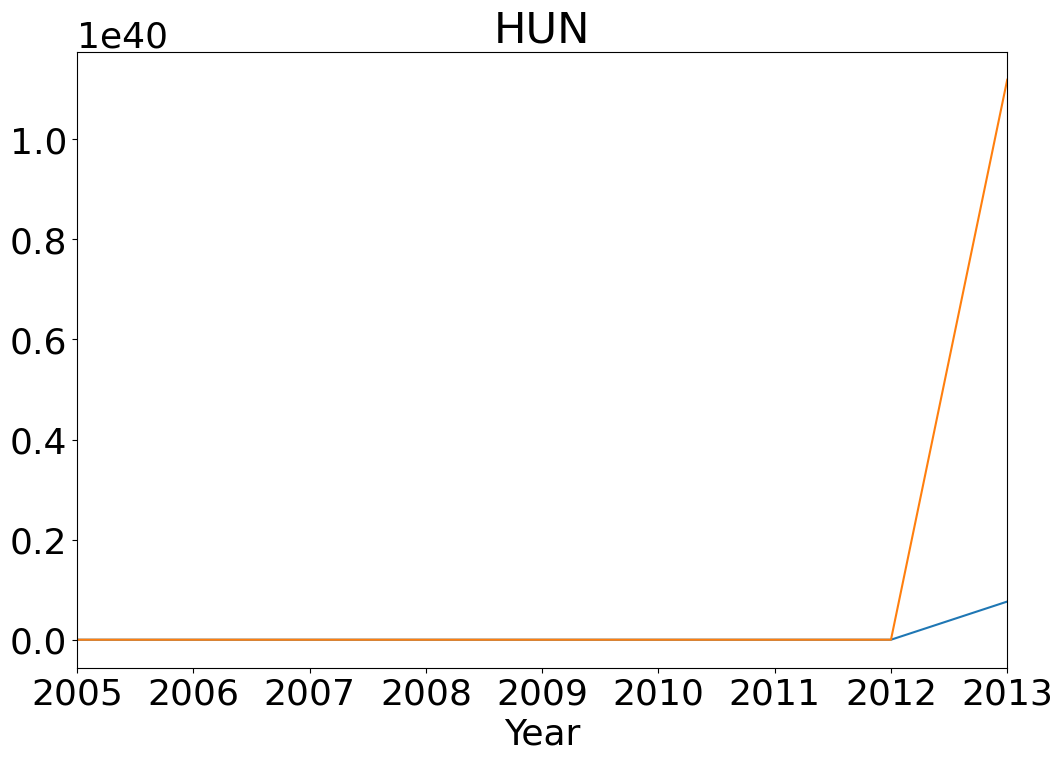

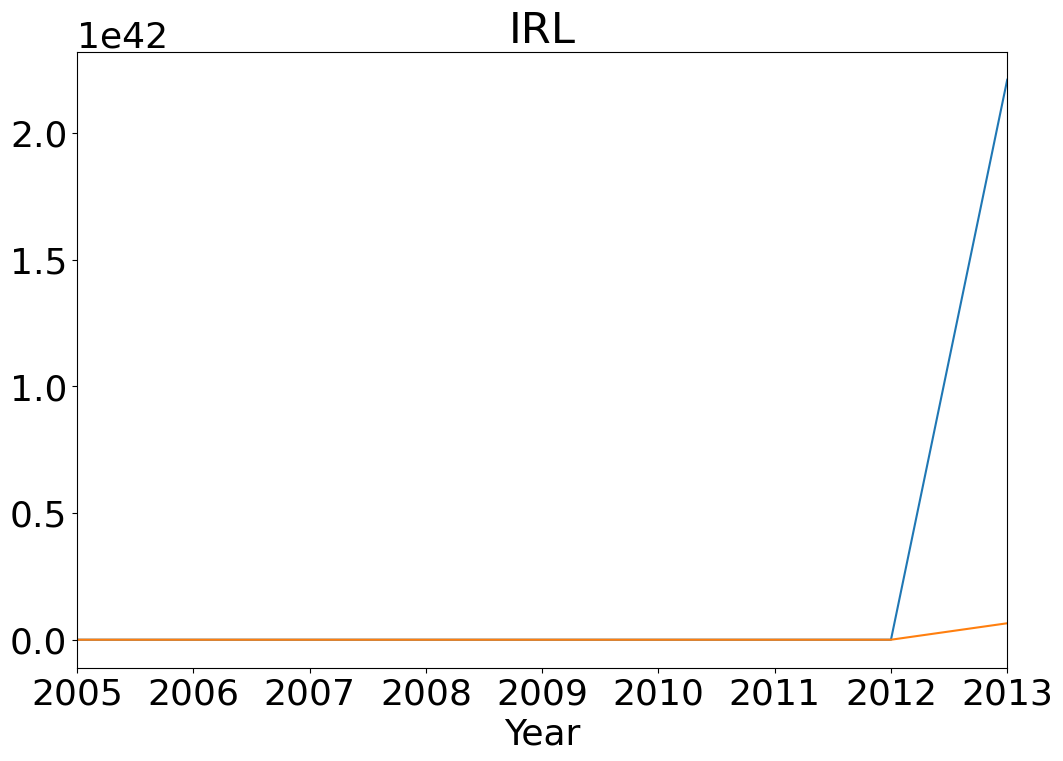

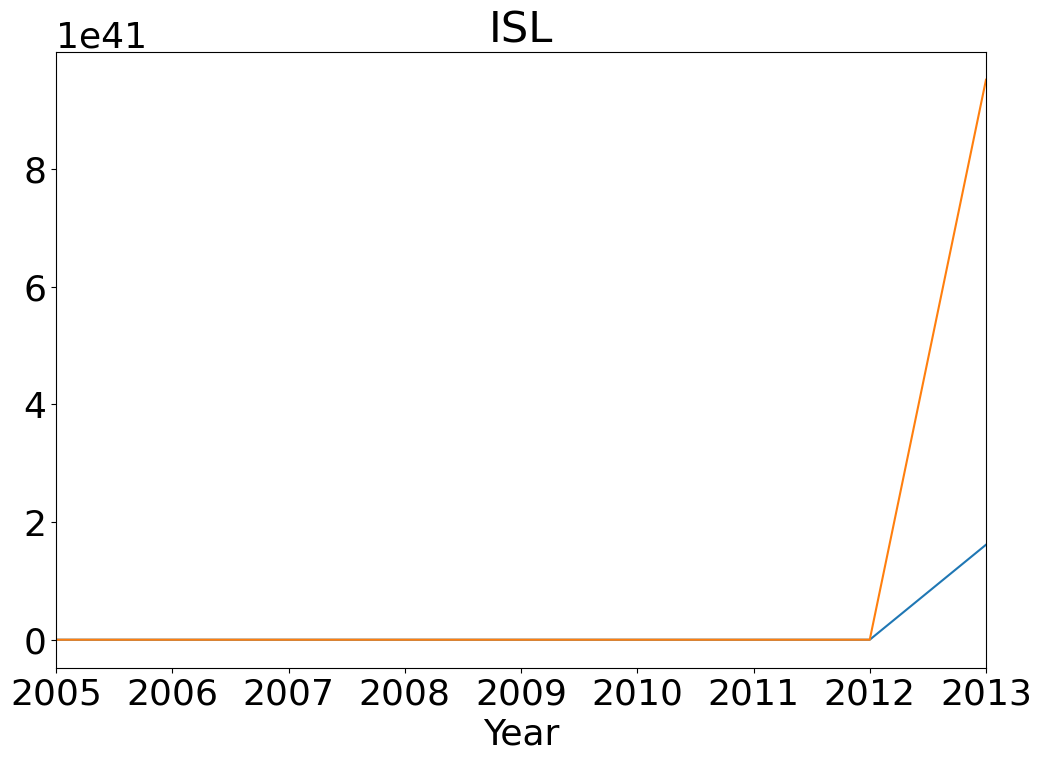

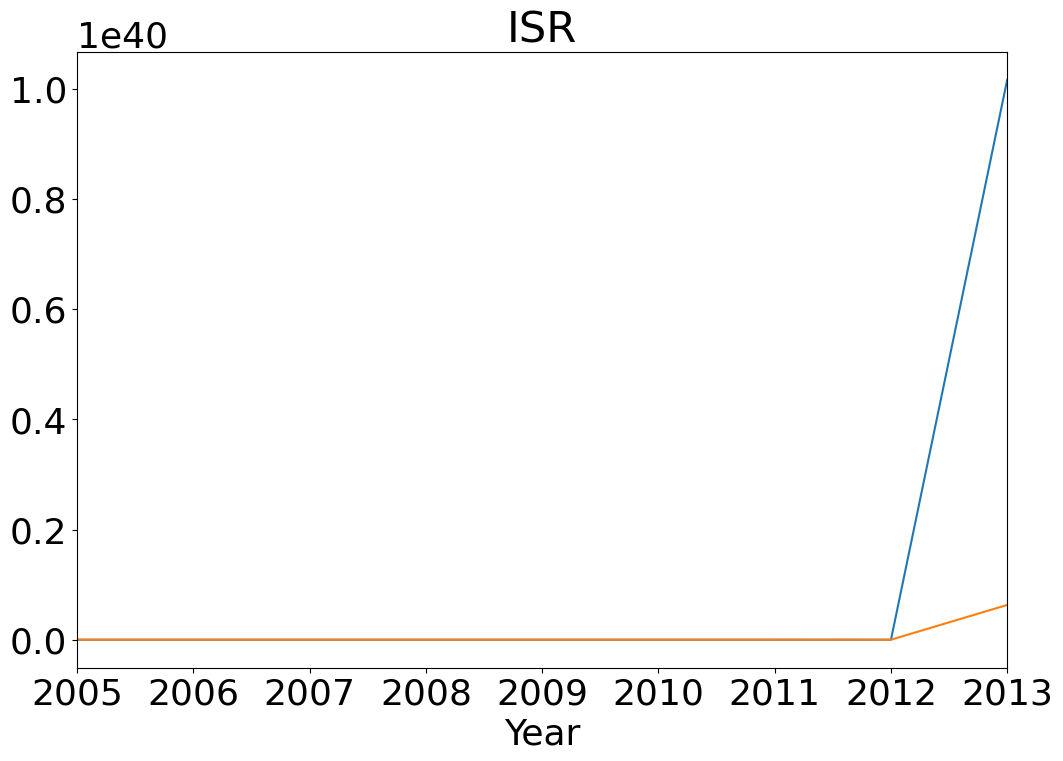

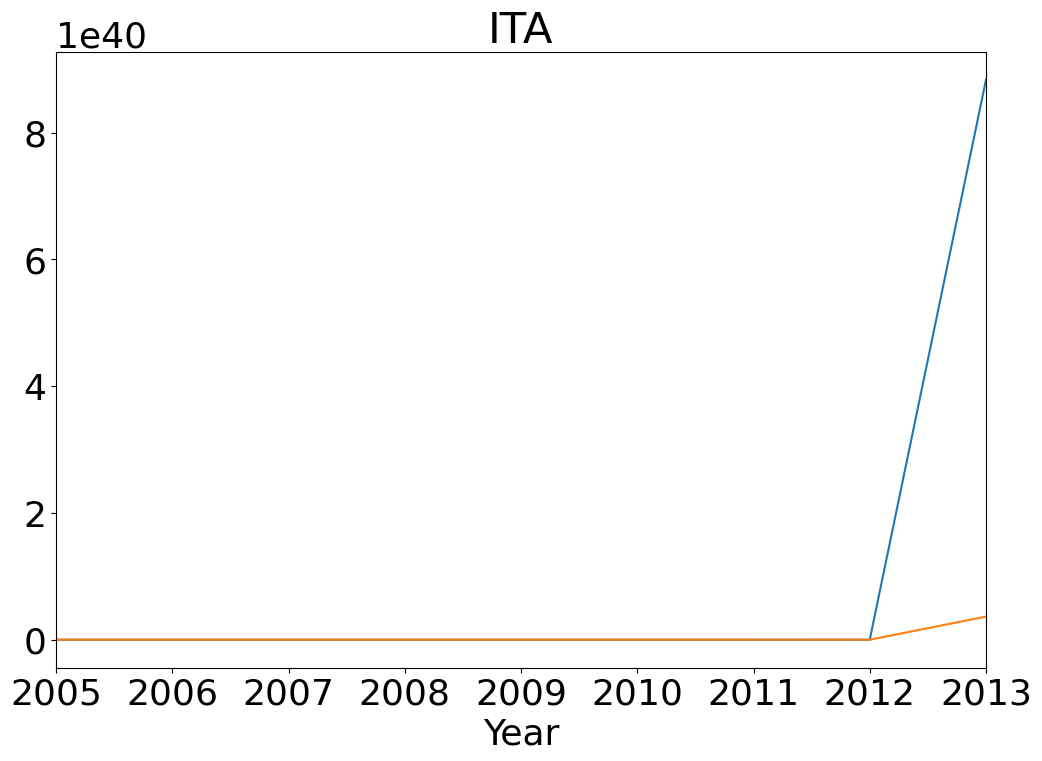

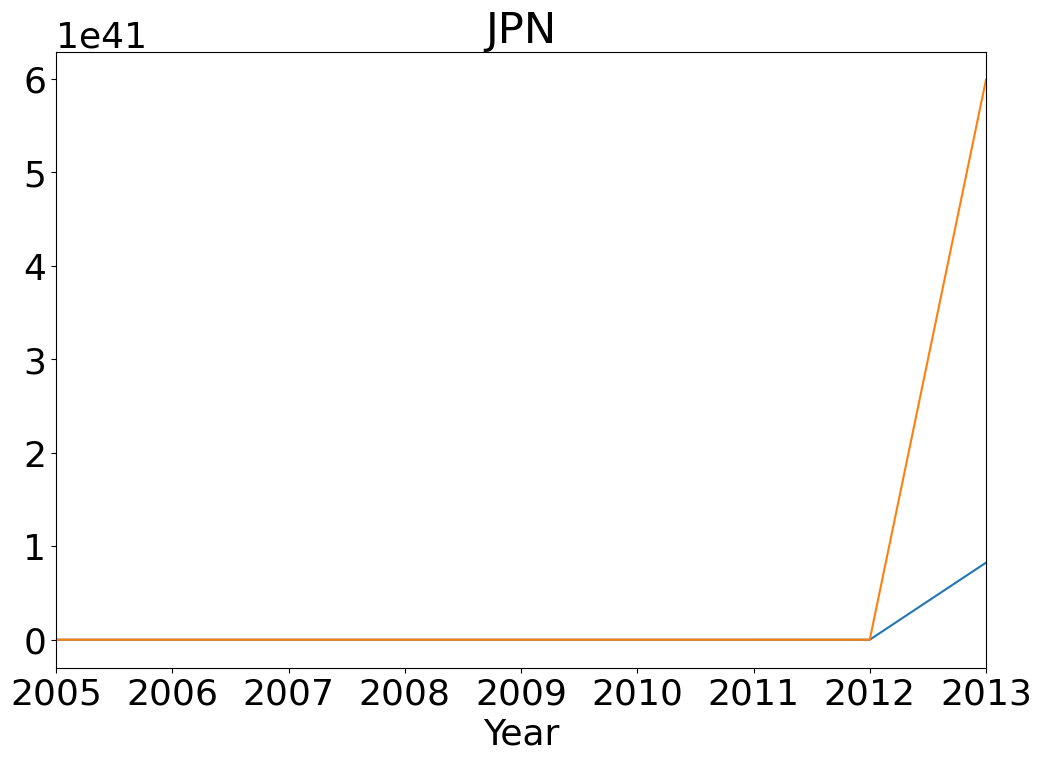

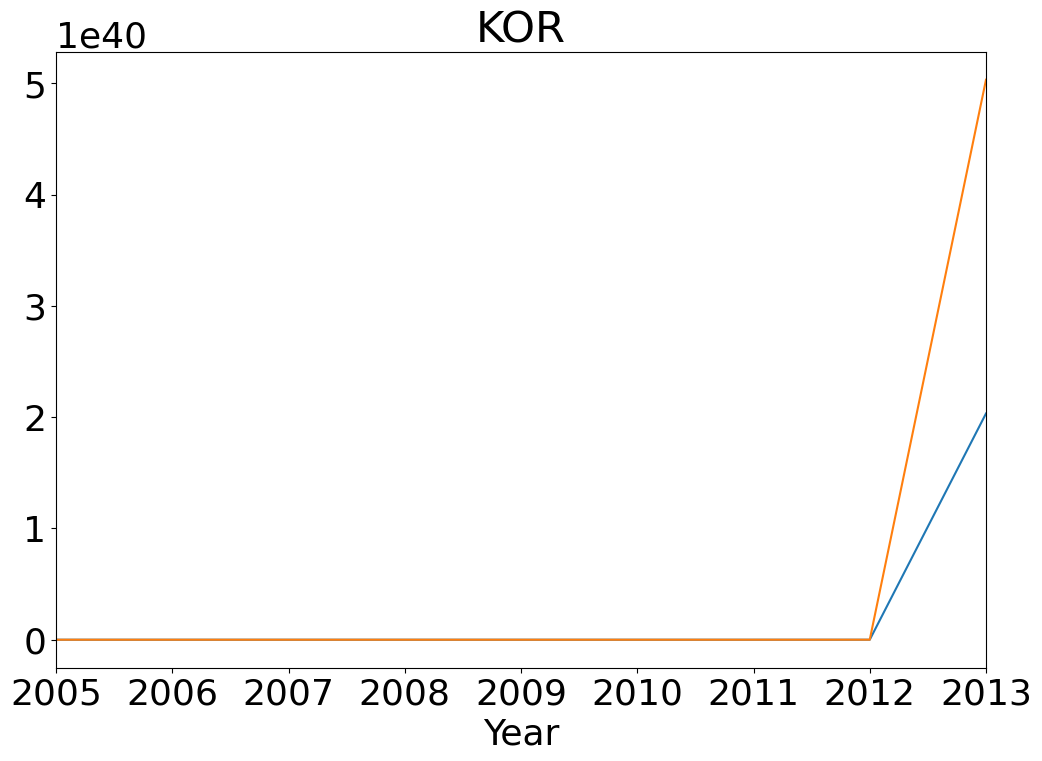

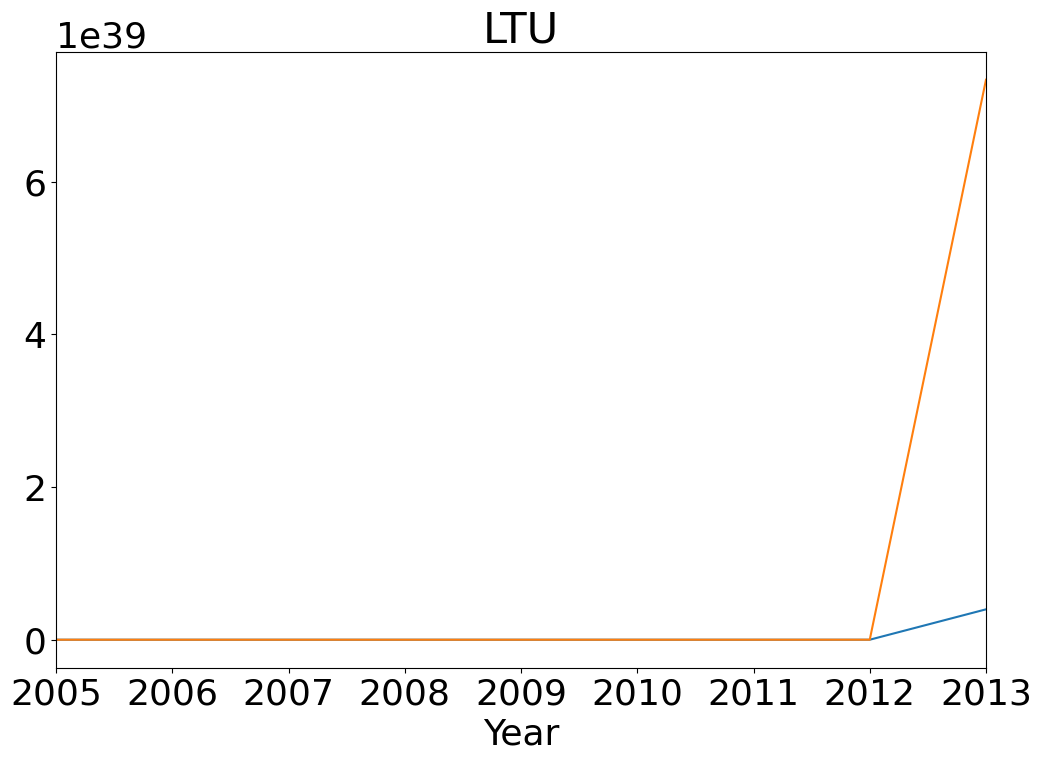

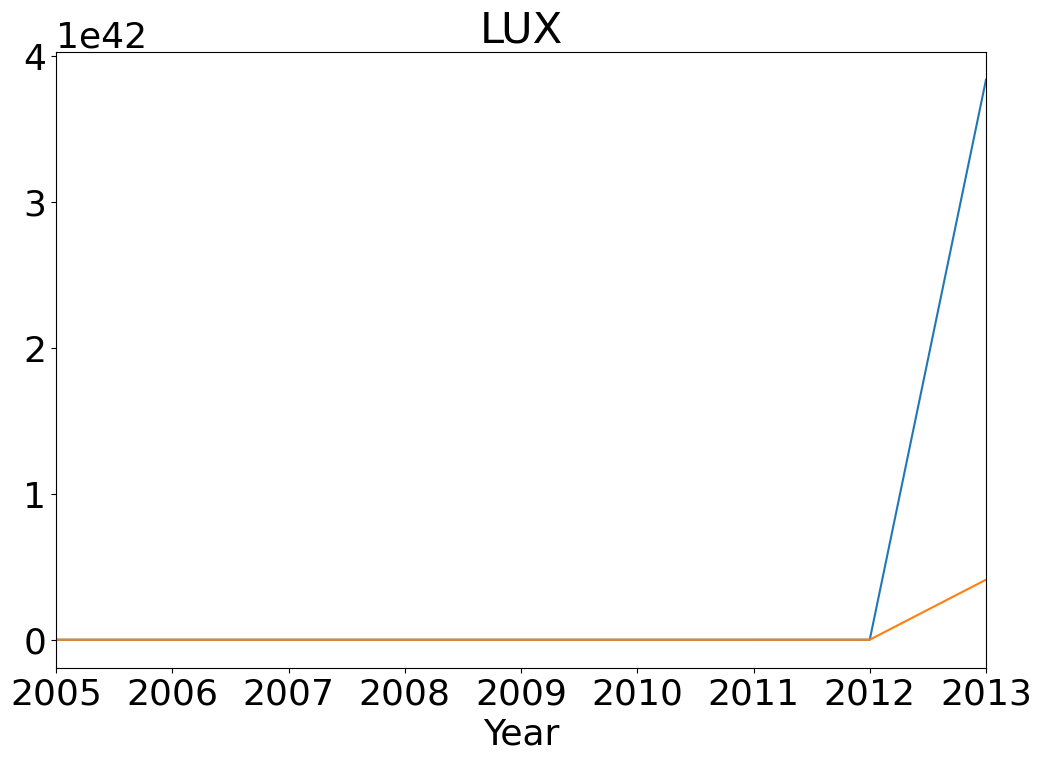

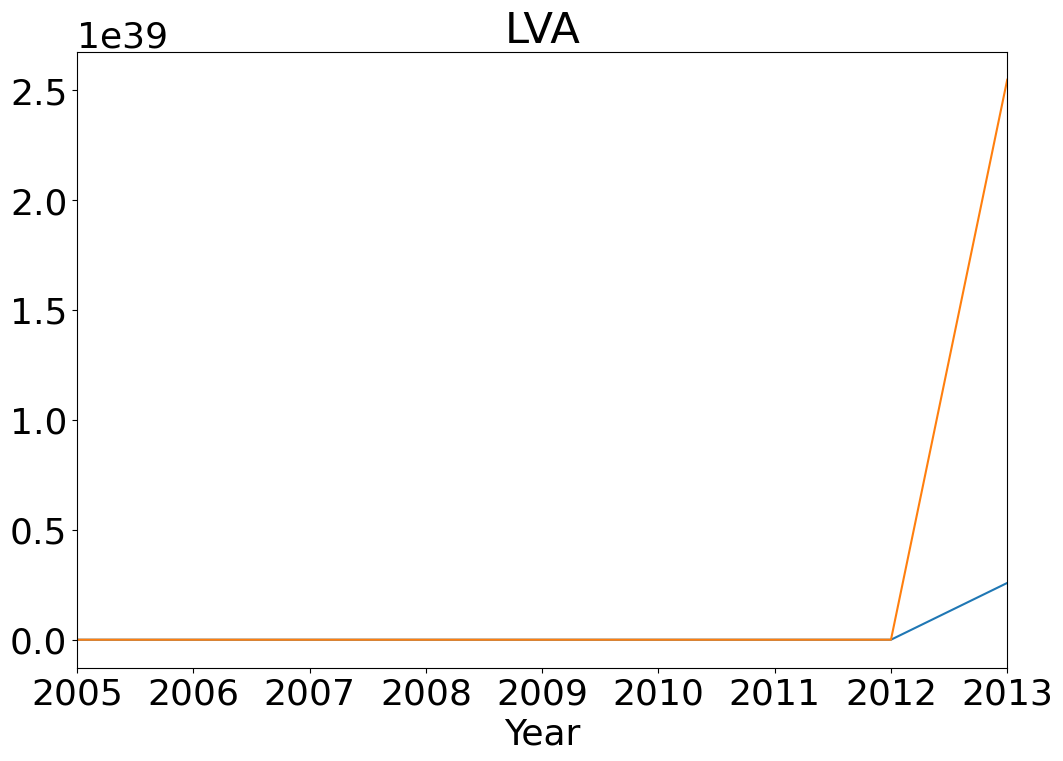

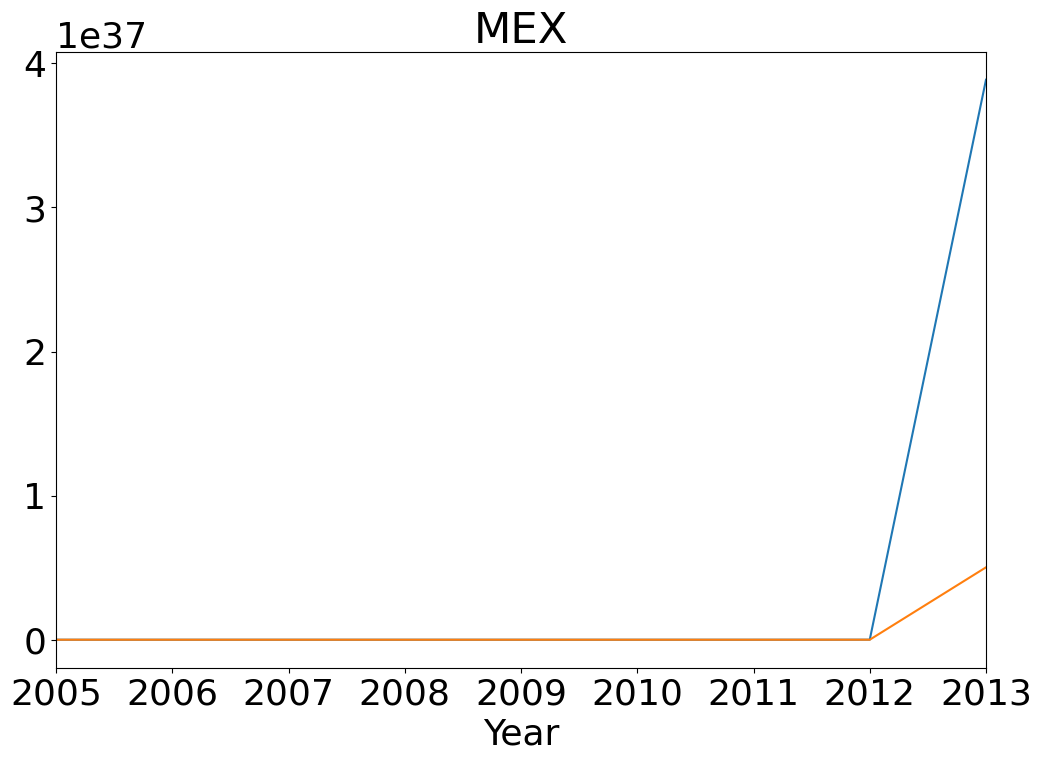

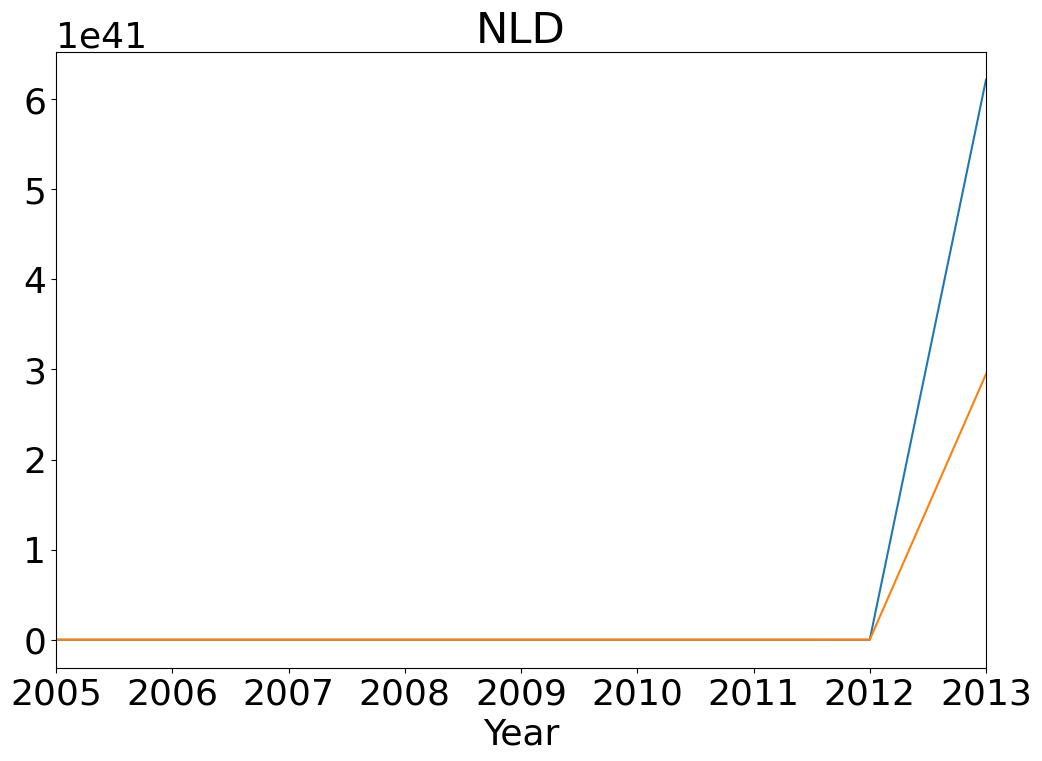

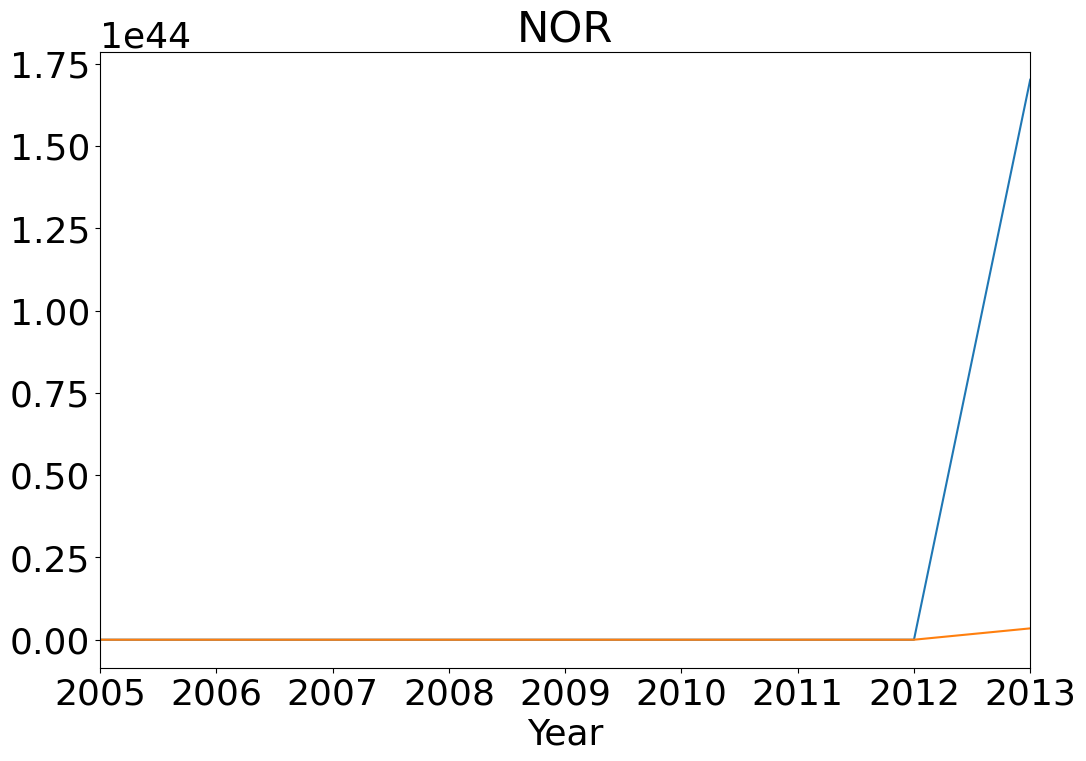

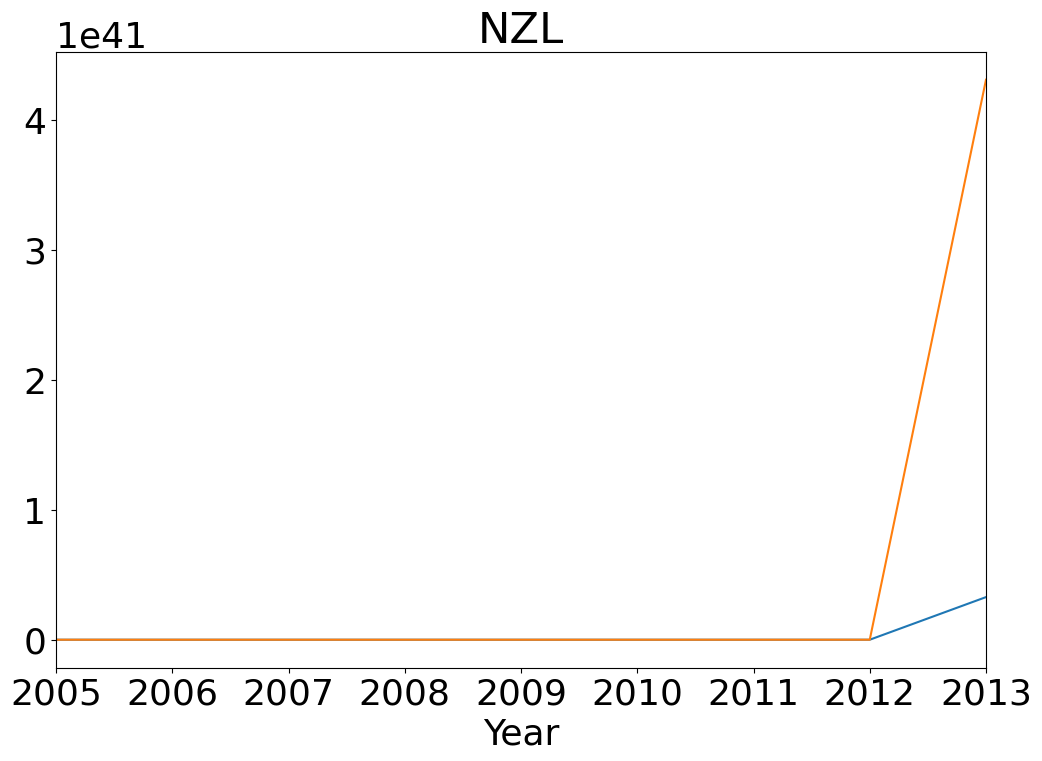

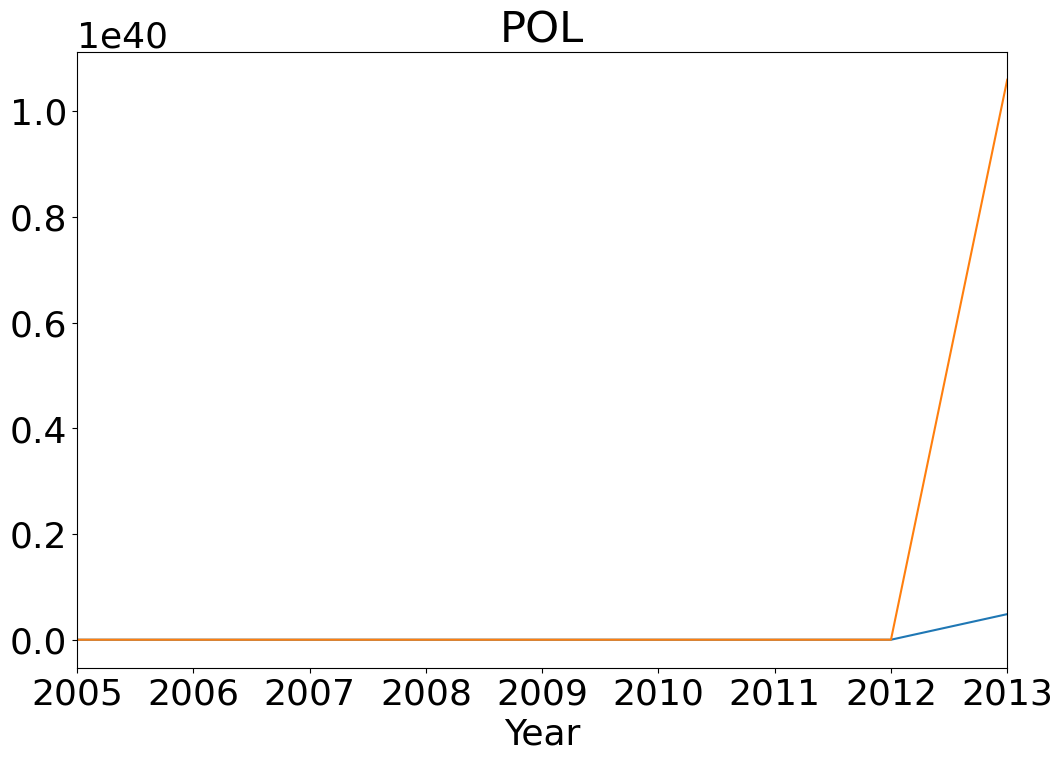

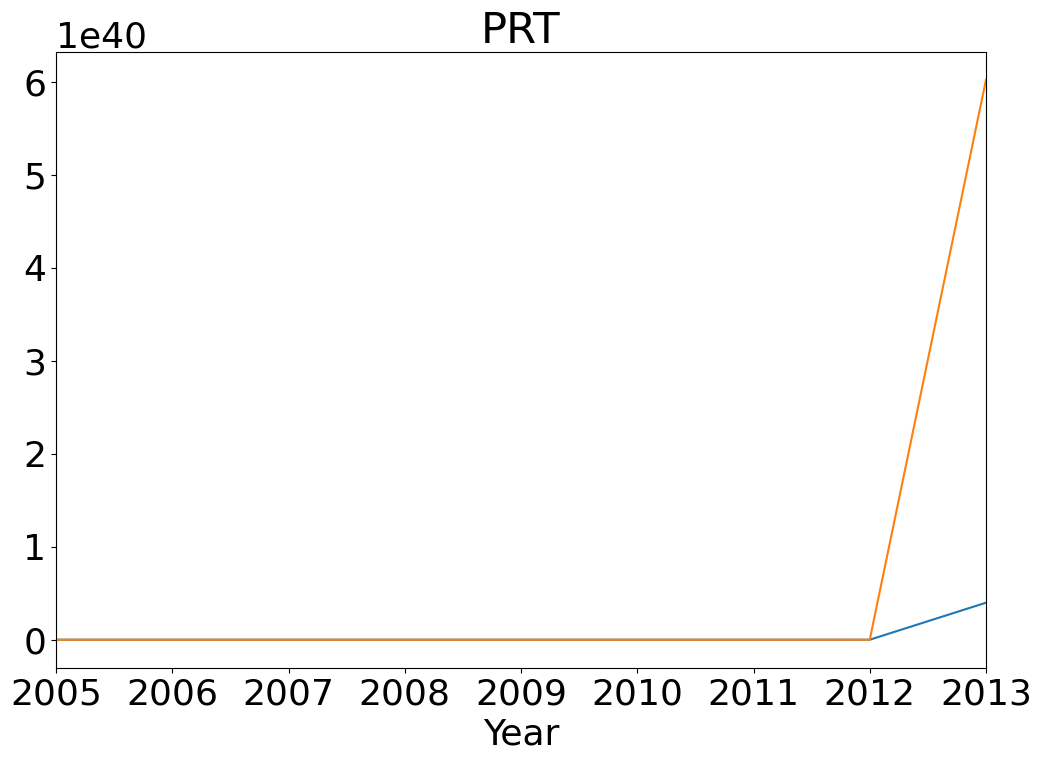

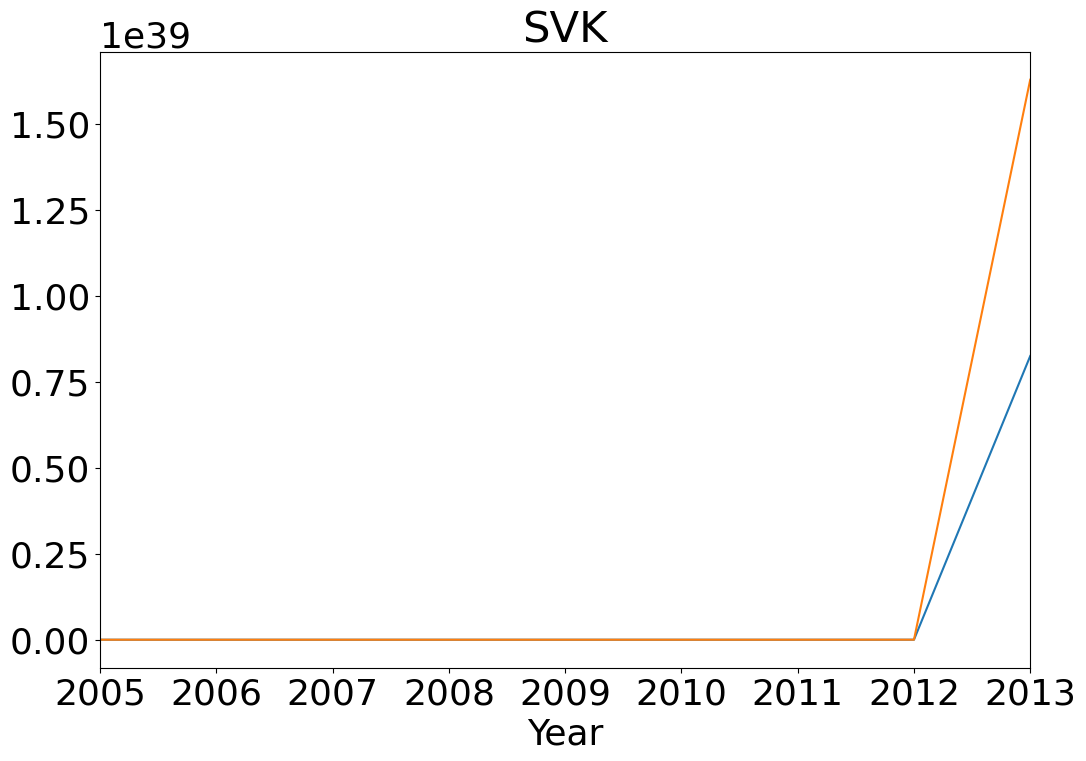

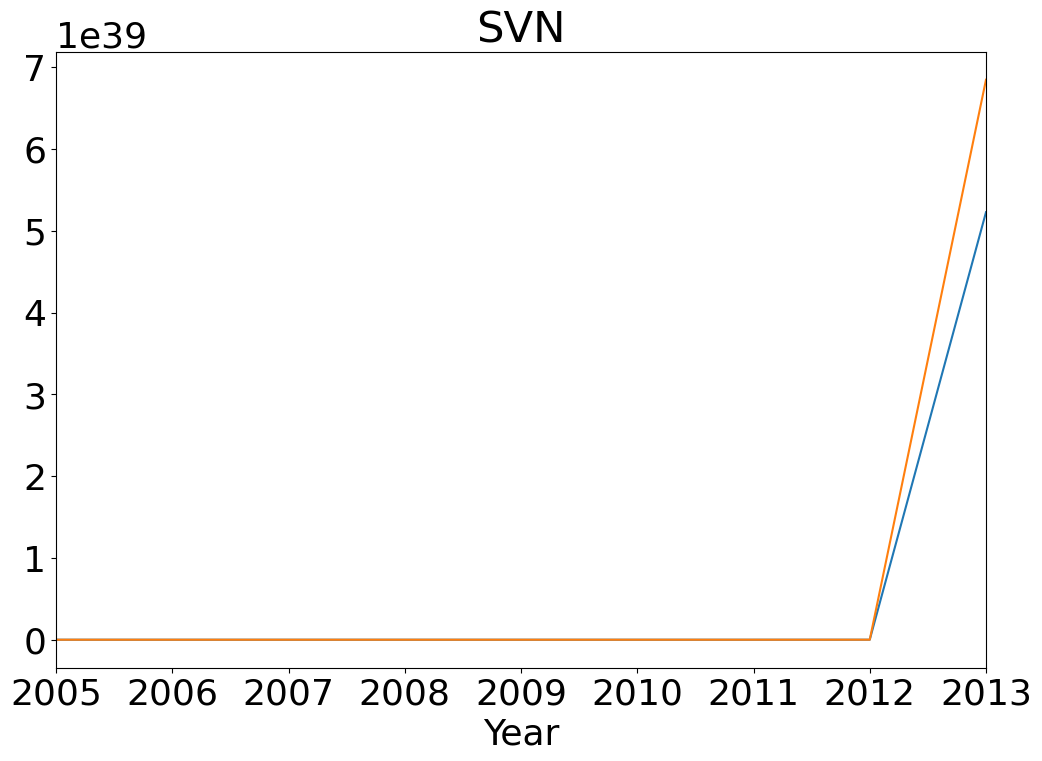

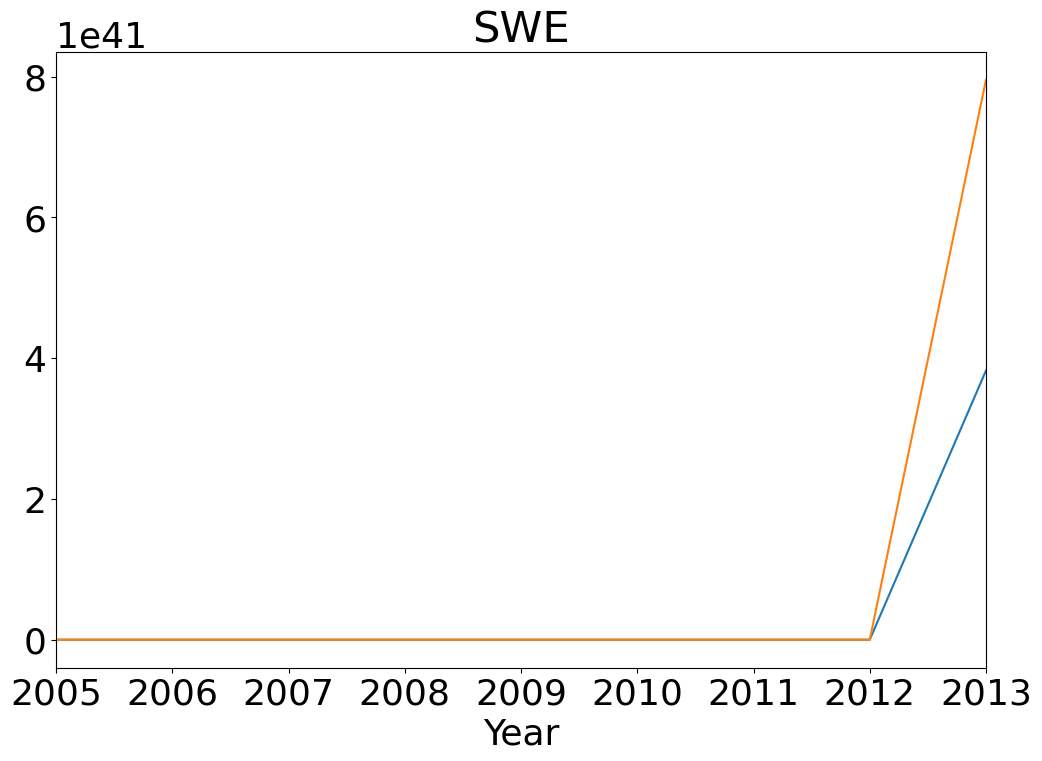

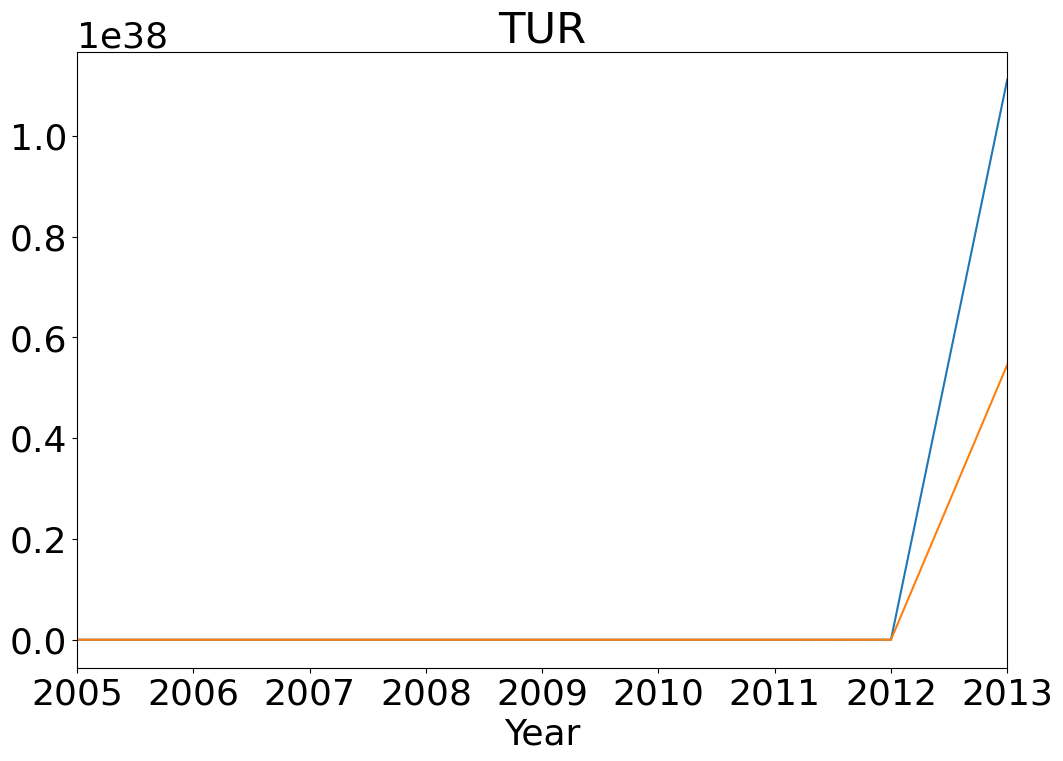

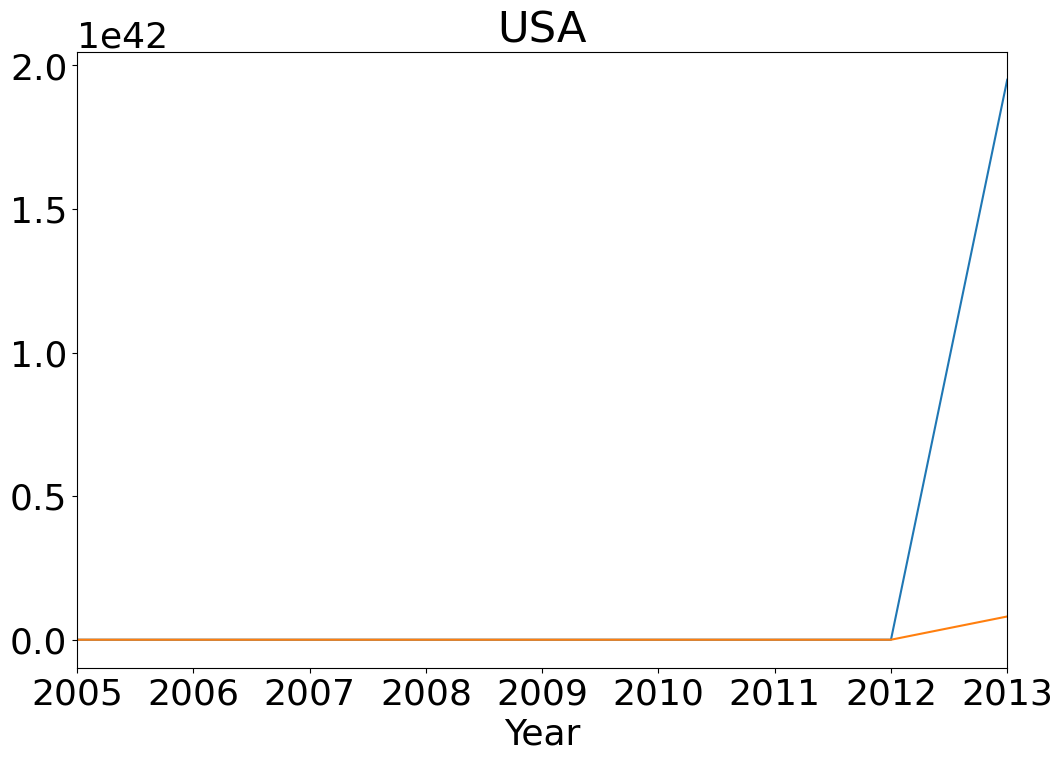

In [125]:
for country in countries:
    fig, ax = plt.subplots(figsize = (12,8))

    plot_data[y_var + ["Predictor"]].loc[country].cumprod().plot.line(ax = ax, legend = False)
    
    ax.set_title(country)
    plt.plot()
